# Ver4. 

## Categorical Data, Numeric Data Preprocessing
---
### 1. flavor에 대해 시각화
### 2. Categorical Variables LabelEncoding 진행
### 3. Numeric Variables Min-Max Normalization 진행 - data를 0~1로 표현하기 위함.
### 4. 저장하고 이후 model 학습에 사용합니다.

In [1]:
import pandas as pd
import numpy as  np
import random
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

## Normalization
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import os

from scipy.sparse import coo_matrix, csr_matrix
from tqdm.notebook import tqdm

In [2]:
rating = pd.read_csv("../dataset/rating.csv", index_col = 0, encoding="utf-8")
whisky = pd.read_csv("../dataset/whisky.csv", index_col=0 , encoding="UTF-8")
whisky_index = pd.read_csv("../dataset/whisky_index.csv", index_col=0 , encoding="UTF-8")
user_index = pd.read_csv("../dataset/user_index.csv", index_col=0 , encoding="UTF-8")

In [3]:
rating

user_id  whisky_id  rating
0             1          1     9.0
1             2          1     7.0
2             3          1     9.0
3             4          1    10.0
4             5          1     9.0
...         ...        ...     ...
908171     4829       3535     4.0
908172   119514       3535     2.0
908173   119515       3535     8.0
908174     3124       3535     4.0
908175    95649       3535     2.0

[908176 rows x 3 columns]

In [4]:
whisky

whisky_id                                               link  \
0             1                            /spirits/hibiki-21-year   
1             2                          /spirits/highland-park-18   
2             3  /spirits/michter-s-20-year-kentucky-straight-b...   
3             4          /spirits/george-t-stagg-bourbon-fall-2019   
4             5              /spirits/bowmore-mizunara-cask-finish   
...         ...                                                ...   
3530       3531                        /spirits/wild-turkey-spiced   
3531       3532  /spirits/seagram-s-seven-crown-american-blende...   
3532       3533              /spirits/11-wells-single-malt-whiskey   
3533       3534            /spirits/immortal-spirits-early-whiskey   
3534       3535              /spirits/triple-crown-blended-whiskey   

                                                  image  \
0     https://ip-distiller.imgix.net/images/spirits/...   
1     https://ip-distiller.imgix.net/images/spirits/...   
2     https://ip-distiller.imgix.net/images/spirits/...   
3     https://ip-distiller.imgix.net/images/spirits/...   
4     https://ip-distiller.imgix.net/images/spirits/...   
...                                                 ...   
3530  https://ip-distiller.imgix.net/images/spirits/...   
3531  https://ip-distiller.imgix.net/images/spirits/...   
3532  https://ip-distiller.imgix.net/images/spirits/...   
3533  https://ip-distiller.imgix.net/images/spirits/...   
3534  https://ip-distiller.imgix.net/images/spirits/...   

                                                   name  avr_rating  \
0                                        Hibiki 21 Year        9.01   
1                                 Highland Park 18 Year        8.89   
2     Michter's 20 Year Kentucky Straight Bourbon (2...        9.00   
3                   George T. Stagg Bourbon (Fall 2019)        9.06   
4                          Bowmore Mizunara Cask Finish        7.86   
...                                                 ...         ...   
3530                                 Wild Turkey Spiced        5.92   
3531         Seagram's 7 Crown American Blended Whiskey        4.31   
3532                       11 Wells Single Malt Whiskey        6.00   
3533                     Immortal Spirits Early Whiskey        2.00   
3534                       Triple Crown Blended Whiskey        4.88   

                      category           location  total_rating  price_tier  \
0                      Blended              Japan         861.0           5   
1           Peated Single Malt  Islands, Scotland        2988.0           4   
2                      Bourbon      Kentucky, USA          10.0           5   
3                      Bourbon      Kentucky, USA         629.0           4   
4           Peated Single Malt    Islay, Scotland          22.0           5   
...                        ...                ...           ...         ...   
3530          Flavored Whiskey      Kentucky, USA          13.0           1   
3531  Blended American Whiskey                USA         237.0           1   
3532      American Single Malt     Minnesota, USA           2.0           3   
3533             Other Whiskey        Oregon, USA           1.0           2   
3534  Blended American Whiskey      Missouri, USA          16.0           1   

        abv  ... herbal  oily  body  rich  sweet  salty  vanilla  tart  \
0     43.00  ...     30    20    80    80     85     15       20    25   
1     43.00  ...     20    40    70    80     70     40       50    50   
2     57.10  ...      0    15    80    90     85      5       30    25   
3     58.45  ...     50    20    60    60     45      0       60    60   
4     53.90  ...     30    10    75    75     60     20       30    20   
...     ...  ...    ...   ...   ...   ...    ...    ...      ...   ...   
3530  43.00  ...      0     0    40    55     85      0       25    10   
3531  40.00  ...     20     0    30     0    100      0      1

In [5]:
whisky_index

whisky_id                                               name
0             1                                     Hibiki 21 Year
1             2                              Highland Park 18 Year
2             3  Michter's 20 Year Kentucky Straight Bourbon (2...
3             4                George T. Stagg Bourbon (Fall 2019)
4             5                       Bowmore Mizunara Cask Finish
...         ...                                                ...
3530       3531                                 Wild Turkey Spiced
3531       3532         Seagram's 7 Crown American Blended Whiskey
3532       3533                       11 Wells Single Malt Whiskey
3533       3534                     Immortal Spirits Early Whiskey
3534       3535                       Triple Crown Blended Whiskey

[3535 rows x 2 columns]

In [6]:
user_index

user_id             username
0             1         AngusBennion
1             2   ANTHONY-DIGIROLAMO
2             3           Heejin-Lim
3             4         whisky_lover
4             5     WhiskeyThreePutt
...         ...                  ...
119510   119511  Hyppolite-Pierre-Jr
119511   119512        Vladim-r-apek
119512   119513            virglynn1
119513   119514       Will-Rosenfeld
119514   119515        Conrad-Hasper

[119515 rows x 2 columns]

## 1. Visualization

In [7]:
cols = whisky.columns.tolist()

In [8]:
cols = whisky.columns.tolist()
cols = [cols[5]] + cols[8:10] + cols[11:] 
cols

['category',
 'price_tier',
 'abv',
 'smoky',
 'peaty',
 'spicy',
 'herbal',
 'oily',
 'body',
 'rich',
 'sweet',
 'salty',
 'vanilla',
 'tart',
 'fruity',
 'floral']

In [9]:
numeric_cols = cols[2:]
categorical_cols = cols[:2]

In [10]:
cate_df = whisky[categorical_cols]
numeric_df = whisky[numeric_cols]

### categorical variable
---
- category
- const_rank

In [11]:
le_category = LabelEncoder()
le_cost_rank = LabelEncoder()

cate_df[categorical_cols[0]] = le_category.fit_transform(cate_df[categorical_cols[0]])
cate_df[categorical_cols[1]] = le_cost_rank.fit_transform(cate_df[categorical_cols[1]])

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_5620\3312375797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_df[categorical_cols[0]] = le_category.fit_transform(cate_df[categorical_cols[0]])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_5620\3312375797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_df[categorical_cols[1]] = le_cost_rank.fit_transform(cate_df[categorical_cols[1]])


In [12]:
cate_df

category  price_tier
0            1           4
1           12           3
2            5           4
3            5           3
4           12           4
...        ...         ...
3530         8           0
3531         2           0
3532         0           2
3533         9           1
3534         2           0

[3535 rows x 2 columns]

## Label index name file

In [13]:
whisky['category'].unique()

array(['Blended', 'Peated Single Malt', 'Bourbon', 'Single Malt', 'Rye',
       'Blended Grain', 'Blended American Whiskey', 'Tennessee',
       'Single Pot Still', 'Other Whiskey', 'Canadian', 'Blended Malt',
       'Peated Blended Malt', 'Single Grain', 'American Single Malt',
       'Peated Blend', 'Wheat Whiskey', 'Corn', 'Flavored Whiskey',
       'White', 'Spirit'], dtype=object)

In [14]:
cate_df['category'].unique()


array([ 1, 12,  5, 15, 13,  3,  2, 18, 16,  9,  6,  4, 11, 14,  0, 10, 19,
        7,  8, 20, 17])

In [15]:
category_label = pd.DataFrame({"category": whisky["category"].unique(), "index": cate_df["category"].unique()})
category_label = category_label.sort_values(by="index")

In [16]:
category_label

category  index
14      American Single Malt      0
0                    Blended      1
6   Blended American Whiskey      2
5              Blended Grain      3
11              Blended Malt      4
2                    Bourbon      5
10                  Canadian      6
17                      Corn      7
18          Flavored Whiskey      8
9              Other Whiskey      9
15              Peated Blend     10
12       Peated Blended Malt     11
1         Peated Single Malt     12
4                        Rye     13
13              Single Grain     14
3                Single Malt     15
8           Single Pot Still     16
20                    Spirit     17
7                  Tennessee     18
16             Wheat Whiskey     19
19                     White     20

## Label index file save

In [31]:
category_label.to_csv("dataset/label_index.csv", encoding="UTF-8")

### Numerical Variable Describe

In [17]:
whisky.loc[:, cols].describe()

price_tier          abv        smoky        peaty        spicy  \
count  3535.000000  3535.000000  3535.000000  3535.000000  3535.000000   
mean      3.141160    47.521700    22.308911     8.764356    45.916549   
std       1.137736     6.414416    20.543387    19.420631    20.427383   
min       1.000000    30.000000     0.000000     0.000000     0.000000   
25%       2.000000    43.000000     5.000000     0.000000    30.000000   
50%       3.000000    46.000000    20.000000     0.000000    45.000000   
75%       4.000000    50.000000    30.000000     0.000000    60.000000   
max       5.000000    80.000000   100.000000   100.000000   100.000000   

            herbal         oily         body         rich        sweet  \
count  3535.000000  3535.000000  3535.000000  3535.000000  3535.000000   
mean     26.206789    28.588119    54.667327    54.431966    54.382461   
std      19.450020    19.680687    18.616834    19.170765    18.389508   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      10.000000    15.000000    40.000000    40.000000    40.000000   
50%      20.000000    25.000000    55.000000    55.000000    60.000000   
75%      40.000000    40.000000    70.000000    70.000000    70.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

             salty      vanilla         tart       fruity       floral  
count  3535.000000  3535.000000  3535.000000  3535.000000  3535.000000  
mean      9.555304    42.981895    25.253748    44.203112    20.699010  
std      14.813603    21.096638    18.311131    22.691156    20.244514  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000    25.000000    10.000000    25.000000     4.000000  
50%       0.000000    40.000000    20.000000    40.000000    15.000000  
75%      15.000000    60.000000    40.000000    60.000000    30.000000  
max      90.000000   100.000000   100.000000   100.000000    95.000000

### Categorical Variable : category, price_tier
---
- 1 의 경우 sparse하기 때문에 주의 필요하다.
- 가능한 방법
    - SMOTE
    - lightfm's loss_weights
    - Regularization : L1, L2 norm
    
🥑 우선 적용해볼 방법은 loss_weights, Regularization L1, L2 norm 을 적용할 예정입니다.

<AxesSubplot: xlabel='price_tier', ylabel='Count'>

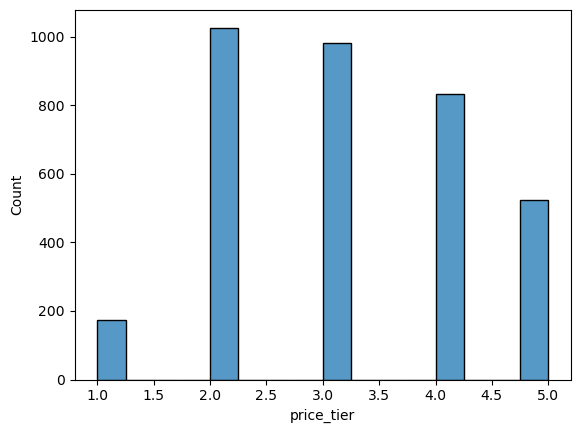

In [18]:
sns.histplot(whisky["price_tier"])

In [19]:
# Define the columns to scale
numeric_cols = cols[2:]

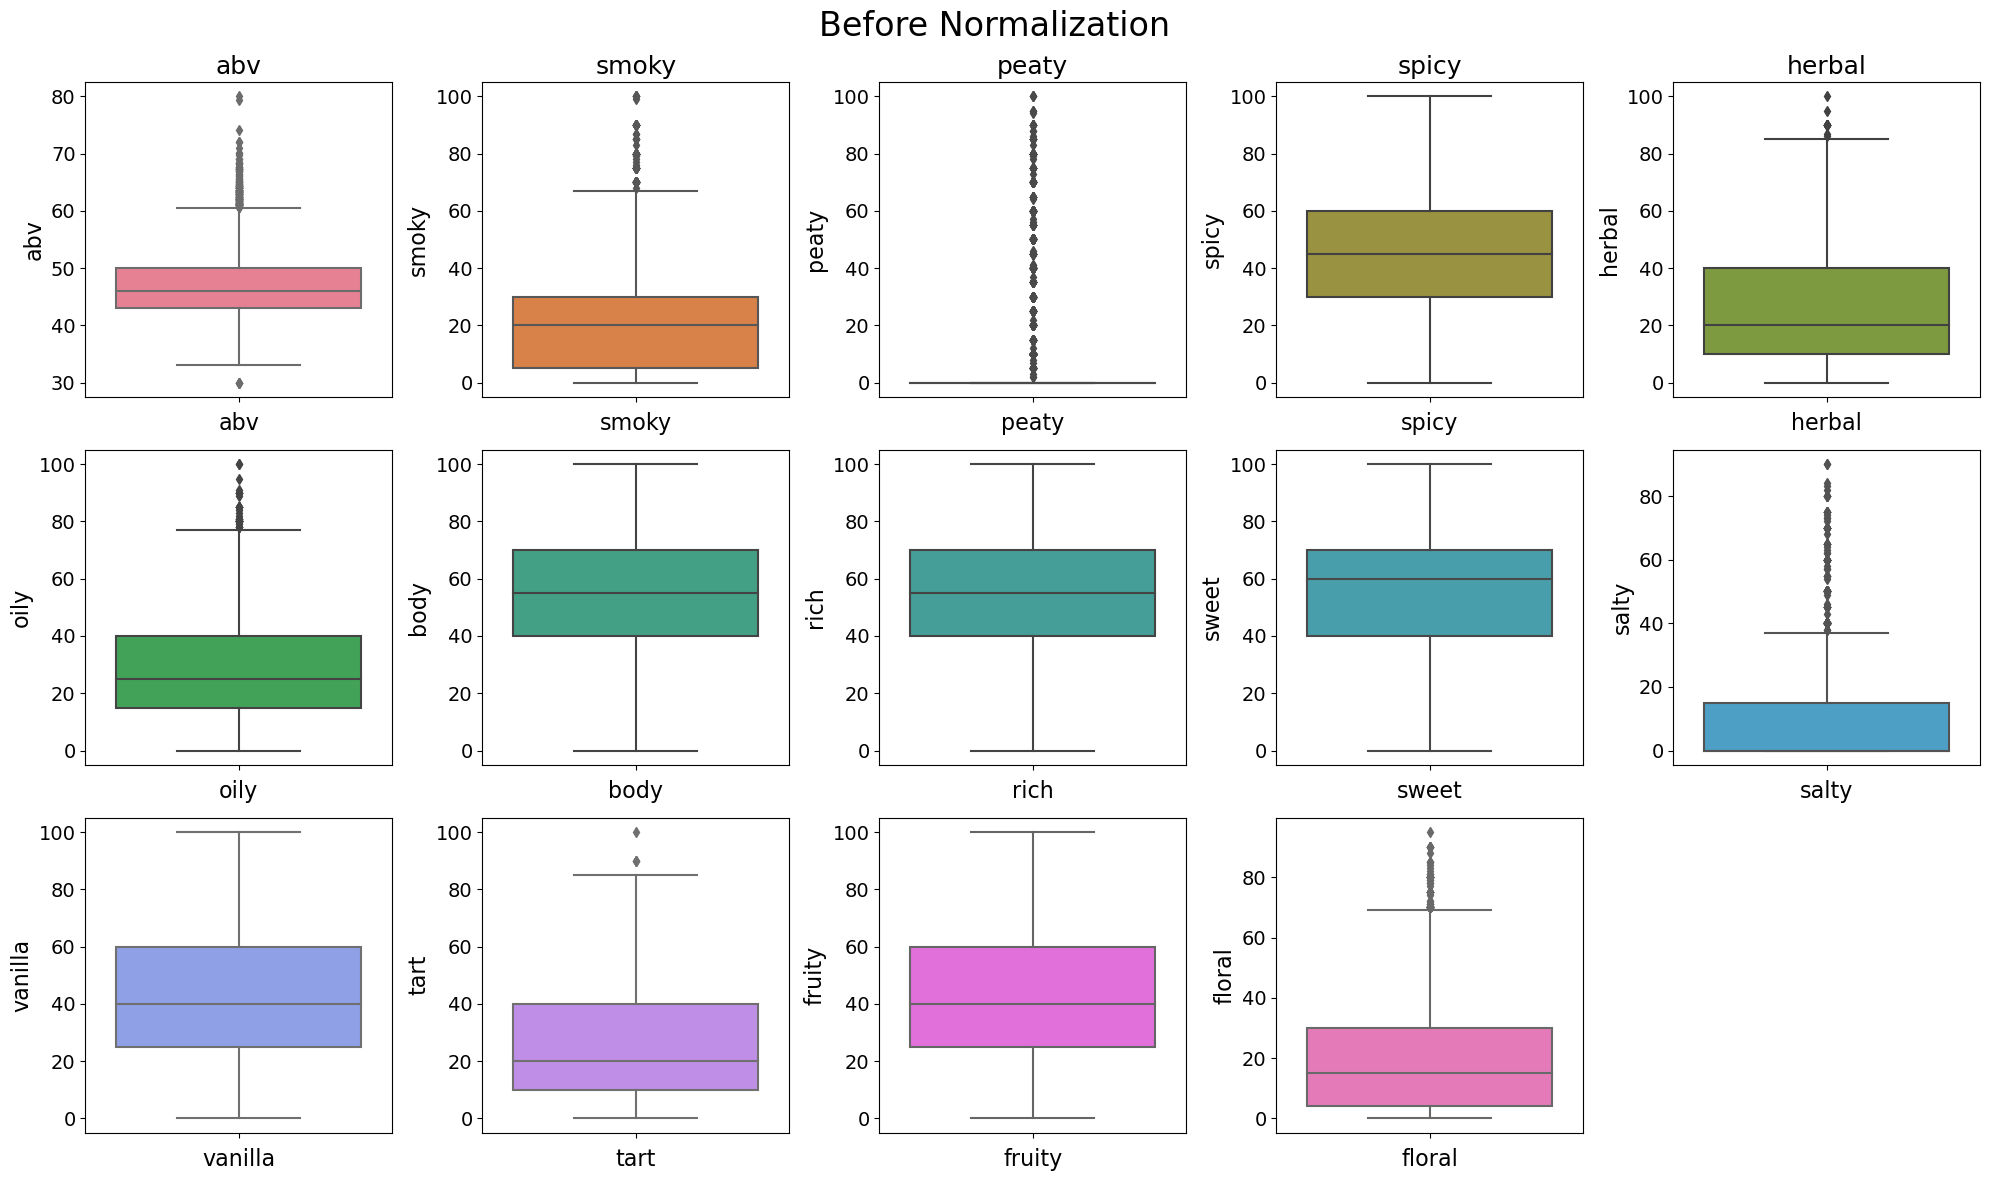

In [20]:
# Define colors for each boxplot
palette = sns.color_palette('husl', n_colors=len(numeric_cols))

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Plot each boxplot
for i, ax in enumerate(axes.flatten()):
    if i >= len(numeric_cols):
        # Remove unused subplot
        ax.remove()
        continue
    sns.boxplot(x='variable', y='value', data=whisky.melt(value_vars=numeric_cols[i]),
                ax=ax, palette=[palette[i]])
    ax.set_xlabel(numeric_cols[i], fontsize=16)
    ax.set_ylabel(numeric_cols[i], fontsize=16)
    ax.tick_params(labelsize=14)
    ax.set_xticklabels([''], fontsize=14)

# Add titles
fig.suptitle('Before Normalization', fontsize=24)
for ax, col in zip(axes[0], numeric_cols):
    ax.set_title(col, fontsize=18)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)

## 2.  Min-Max Normalization 적용한 item_features & user_features

In [21]:
# Define the scalers
min_max_scaler = MinMaxScaler()

# Apply Min-Max normalization
min_max_data = min_max_scaler.fit_transform(whisky[numeric_cols])

In [22]:
min_max_data = pd.DataFrame(min_max_data, columns=numeric_cols)
min_max_data

abv  smoky  peaty  spicy  herbal  oily  body  rich  sweet     salty  \
0     0.260   0.30   0.85   0.50    0.30  0.20  0.80  0.80   0.85  0.166667   
1     0.260   0.40   0.30   0.40    0.20  0.40  0.70  0.80   0.70  0.444444   
2     0.542   0.15   0.00   0.20    0.00  0.15  0.80  0.90   0.85  0.055556   
3     0.569   0.40   0.00   0.65    0.50  0.20  0.60  0.60   0.45  0.000000   
4     0.478   0.30   0.20   0.40    0.30  0.10  0.75  0.75   0.60  0.222222   
...     ...    ...    ...    ...     ...   ...   ...   ...    ...       ...   
3530  0.260   0.35   0.00   0.20    0.00  0.00  0.40  0.55   0.85  0.000000   
3531  0.200   0.00   0.00   0.40    0.20  0.00  0.30  0.00   1.00  0.000000   
3532  0.240   0.90   0.10   0.10    0.10  0.40  0.10  0.10   0.90  0.000000   
3533  0.290   0.00   0.00   0.10    1.00  0.80  0.00  0.00   0.40  0.000000   
3534  0.200   0.31   0.00   0.40    0.29  0.00  0.30  0.40   1.00  0.000000   

      vanilla  tart  fruity    floral  
0        0.20  0.25    0.85  0.526316  
1        0.50  0.50    0.70  0.210526  
2        0.30  0.25    0.35  0.000000  
3        0.60  0.60    0.45  0.000000  
4        0.30  0.20    0.50  0.052632  
...       ...   ...     ...       ...  
3530     0.25  0.10    0.10  0.000000  
3531     1.00  0.00    0.60  0.105263  
3532     0.50  0.20    0.30  0.105263  
3533     0.20  0.00    0.00  0.000000  
3534     0.55  0.00    0.30  0.105263  

[3535 rows x 14 columns]

In [23]:
min_max_data.describe()

abv        smoky        peaty        spicy       herbal  \
count  3535.000000  3535.000000  3535.000000  3535.000000  3535.000000   
mean      0.350434     0.223089     0.087644     0.459165     0.262068   
std       0.128288     0.205434     0.194206     0.204274     0.194500   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.260000     0.050000     0.000000     0.300000     0.100000   
50%       0.320000     0.200000     0.000000     0.450000     0.200000   
75%       0.400000     0.300000     0.000000     0.600000     0.400000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              oily         body         rich        sweet        salty  \
count  3535.000000  3535.000000  3535.000000  3535.000000  3535.000000   
mean      0.285881     0.546673     0.544320     0.543825     0.106170   
std       0.196807     0.186168     0.191708     0.183895     0.164596   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.150000     0.400000     0.400000     0.400000     0.000000   
50%       0.250000     0.550000     0.550000     0.600000     0.000000   
75%       0.400000     0.700000     0.700000     0.700000     0.166667   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           vanilla         tart       fruity       floral  
count  3535.000000  3535.000000  3535.000000  3535.000000  
mean      0.429819     0.252537     0.442031     0.217884  
std       0.210966     0.183111     0.226912     0.213100  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.250000     0.100000     0.250000     0.042105  
50%       0.400000     0.200000     0.400000     0.157895  
75%       0.600000     0.400000     0.600000     0.315789  
max       1.000000     1.000000     1.000000     1.000000

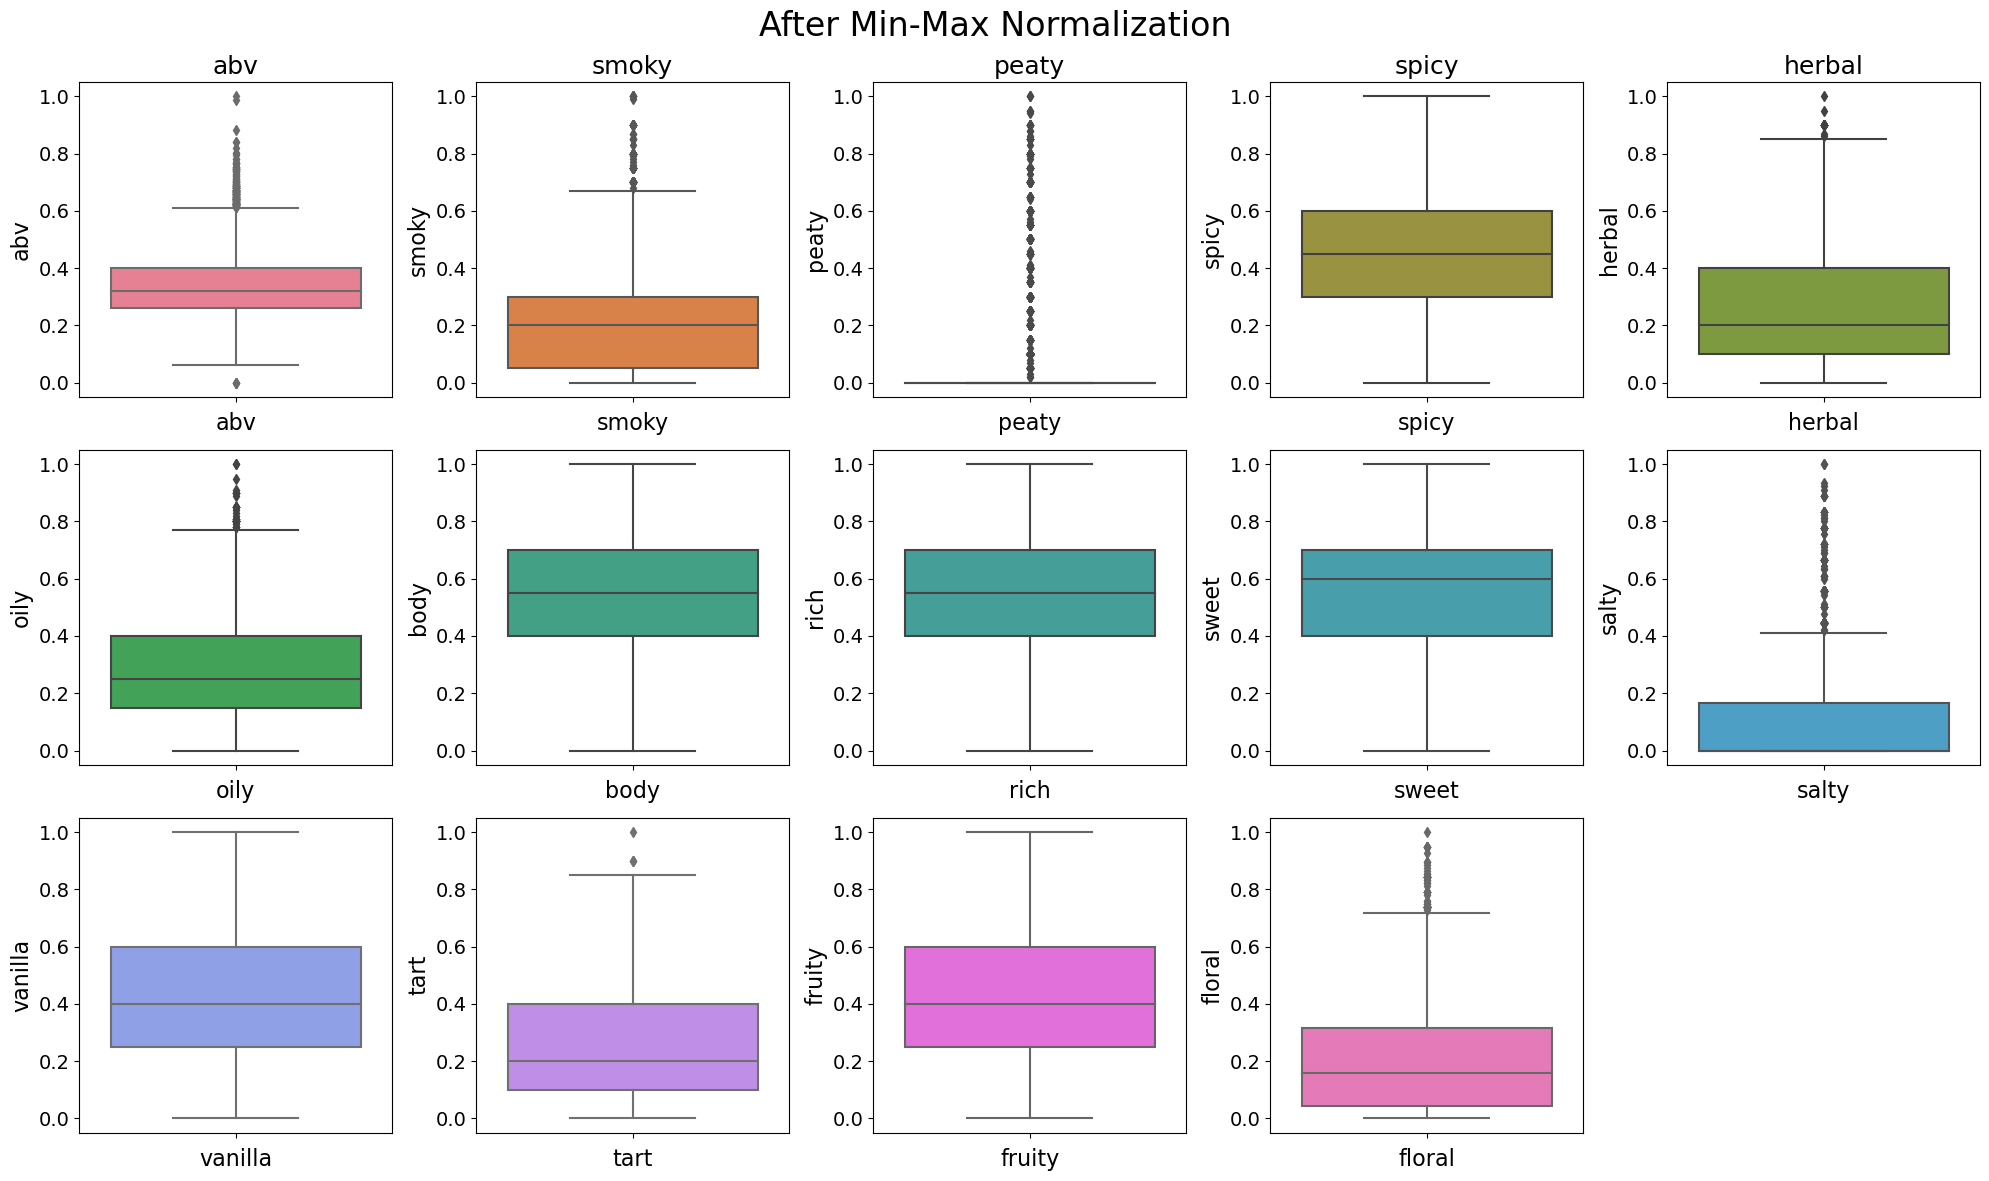

In [24]:
# Define colors for each boxplot
palette = sns.color_palette('husl', n_colors=len(numeric_cols))

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Plot each boxplot
for i, ax in enumerate(axes.flatten()):
    if i >= len(numeric_cols):
        # Remove unused subplot
        ax.remove()
        continue
    sns.boxplot(x='variable', y='value', data=min_max_data.melt(value_vars=numeric_cols[i]),
                ax=ax, palette=[palette[i]])
    ax.set_xlabel(numeric_cols[i], fontsize=16)
    ax.set_ylabel(numeric_cols[i], fontsize=16)
    ax.tick_params(labelsize=14)
    ax.set_xticklabels([''], fontsize=14)

# Add titles
fig.suptitle('After Min-Max Normalization', fontsize=24)
for ax, col in zip(axes[0], numeric_cols):
    ax.set_title(col, fontsize=18)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)


### 2-1. item_features 생성

In [25]:
## seed 고정
random.seed(42)

In [26]:
item_features = pd.concat([cate_df, min_max_data], axis=1)

In [28]:
# zero values
zeros_df = pd.DataFrame(0, index=[0], columns=item_features.columns)

In [29]:
item_features = pd.concat([zeros_df, item_features], ignore_index=True)
item_features

category  price_tier    abv  smoky  peaty  spicy  herbal  oily  body  \
0            0           0  0.000   0.00   0.00   0.00    0.00  0.00   0.0   
1            1           4  0.260   0.30   0.85   0.50    0.30  0.20   0.8   
2           12           3  0.260   0.40   0.30   0.40    0.20  0.40   0.7   
3            5           4  0.542   0.15   0.00   0.20    0.00  0.15   0.8   
4            5           3  0.569   0.40   0.00   0.65    0.50  0.20   0.6   
...        ...         ...    ...    ...    ...    ...     ...   ...   ...   
3531         8           0  0.260   0.35   0.00   0.20    0.00  0.00   0.4   
3532         2           0  0.200   0.00   0.00   0.40    0.20  0.00   0.3   
3533         0           2  0.240   0.90   0.10   0.10    0.10  0.40   0.1   
3534         9           1  0.290   0.00   0.00   0.10    1.00  0.80   0.0   
3535         2           0  0.200   0.31   0.00   0.40    0.29  0.00   0.3   

      rich  sweet     salty  vanilla  tart  fruity    floral  
0     0.00   0.00  0.000000     0.00  0.00    0.00  0.000000  
1     0.80   0.85  0.166667     0.20  0.25    0.85  0.526316  
2     0.80   0.70  0.444444     0.50  0.50    0.70  0.210526  
3     0.90   0.85  0.055556     0.30  0.25    0.35  0.000000  
4     0.60   0.45  0.000000     0.60  0.60    0.45  0.000000  
...    ...    ...       ...      ...   ...     ...       ...  
3531  0.55   0.85  0.000000     0.25  0.10    0.10  0.000000  
3532  0.00   1.00  0.000000     1.00  0.00    0.60  0.105263  
3533  0.10   0.90  0.000000     0.50  0.20    0.30  0.105263  
3534  0.00   0.40  0.000000     0.20  0.00    0.00  0.000000  
3535  0.40   1.00  0.000000     0.55  0.00    0.30  0.105263  

[3536 rows x 16 columns]

In [30]:
item_features.to_csv("dataset/item_features.csv", encoding="UTF-8")

### 2-2. user_features 만들기
---
- user_features 만들기 위해서 사용자의 입맛이란 데이터가 필요하다.
- user의 rating이 가장 높은 위스키 중 랜덤 샘플링을 통해 입맛을 선정한다.

In [32]:
## user 별로 max rating score 측정
max_rating = rating.groupby("user_id").max(lambda x: max(x))["rating"]

In [70]:
max_rating

user_id
1          9.0
2          9.0
3          9.0
4         10.0
5         10.0
          ... 
119511    10.0
119512     8.0
119513     6.0
119514     2.0
119515     8.0
Name: rating, Length: 119515, dtype: float64

In [71]:
user_feature_ids = []
for i in range(rating["user_id"].nunique() +1):
    user_feature_ids.append([])
    
    
for i, row in tqdm(rating.iterrows()):
    if int(row["rating"]) == max_rating[int(row["user_id"])]: user_feature_ids[int(row["user_id"])].append(int(row["whisky_id"]))

0it [00:00, ?it/s]

In [73]:
user_feature_ids

[[],
 [1, 812],
 [1082, 1094],
 [1, 451, 806],
 [1, 797],
 [1, 2, 13, 82, 139, 607, 709, 949],
 [1],
 [1],
 [71, 621],
 [1],
 [1],
 [557],
 [1, 467, 598, 598, 720, 853, 900, 1677],
 [1108],
 [594, 1341, 1342, 1343],
 [1],
 [1],
 [1],
 [410, 675, 1369],
 [38],
 [1],
 [1],
 [1, 660, 2855],
 [26],
 [1, 1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [95],
 [1],
 [38, 38, 745, 2658, 3102, 3386],
 [1, 598, 812],
 [1369],
 [1, 1],
 [1],
 [1, 40, 393, 585, 613, 812, 1082, 1094],
 [1, 1667],
 [1, 295, 433, 471],
 [1],
 [1, 558, 558],
 [1],
 [1],
 [1],
 [1, 585, 1360],
 [1],
 [1, 1],
 [1, 1, 38, 38, 38, 299, 299, 581, 1343],
 [1108, 1923],
 [13, 14, 38],
 [38, 1369, 1923],
 [95, 2887],
 [1, 1],
 [1, 1],
 [2],
 [1],
 [1, 61, 368, 395, 399, 862, 886, 886],
 [4, 1342],
 [44, 1342],
 [1],
 [1, 1, 191, 1085, 1833, 2789],
 [1, 1, 1, 41, 191, 350, 558, 958, 1617, 1851, 2618, 2855],
 [1,
  93,
  96,
  105,
  138,
  157,
  227,
  402,
  558,
  616,
  742,
  768,
  798,
  1048,
  1067,
  1086,
  1103,
  1231,
  1471,

In [41]:
min_max_data

abv  smoky  peaty  spicy  herbal  oily  body  rich  sweet     salty  \
0     0.260   0.30   0.85   0.50    0.30  0.20  0.80  0.80   0.85  0.166667   
1     0.260   0.40   0.30   0.40    0.20  0.40  0.70  0.80   0.70  0.444444   
2     0.542   0.15   0.00   0.20    0.00  0.15  0.80  0.90   0.85  0.055556   
3     0.569   0.40   0.00   0.65    0.50  0.20  0.60  0.60   0.45  0.000000   
4     0.478   0.30   0.20   0.40    0.30  0.10  0.75  0.75   0.60  0.222222   
...     ...    ...    ...    ...     ...   ...   ...   ...    ...       ...   
3530  0.260   0.35   0.00   0.20    0.00  0.00  0.40  0.55   0.85  0.000000   
3531  0.200   0.00   0.00   0.40    0.20  0.00  0.30  0.00   1.00  0.000000   
3532  0.240   0.90   0.10   0.10    0.10  0.40  0.10  0.10   0.90  0.000000   
3533  0.290   0.00   0.00   0.10    1.00  0.80  0.00  0.00   0.40  0.000000   
3534  0.200   0.31   0.00   0.40    0.29  0.00  0.30  0.40   1.00  0.000000   

      vanilla  tart  fruity    floral  
0        0.20  0.25    0.85  0.526316  
1        0.50  0.50    0.70  0.210526  
2        0.30  0.25    0.35  0.000000  
3        0.60  0.60    0.45  0.000000  
4        0.30  0.20    0.50  0.052632  
...       ...   ...     ...       ...  
3530     0.25  0.10    0.10  0.000000  
3531     1.00  0.00    0.60  0.105263  
3532     0.50  0.20    0.30  0.105263  
3533     0.20  0.00    0.00  0.000000  
3534     0.55  0.00    0.30  0.105263  

[3535 rows x 14 columns]

In [64]:
whisky

whisky_id                                               link  \
0             1                            /spirits/hibiki-21-year   
1             2                          /spirits/highland-park-18   
2             3  /spirits/michter-s-20-year-kentucky-straight-b...   
3             4          /spirits/george-t-stagg-bourbon-fall-2019   
4             5              /spirits/bowmore-mizunara-cask-finish   
...         ...                                                ...   
3530       3531                        /spirits/wild-turkey-spiced   
3531       3532  /spirits/seagram-s-seven-crown-american-blende...   
3532       3533              /spirits/11-wells-single-malt-whiskey   
3533       3534            /spirits/immortal-spirits-early-whiskey   
3534       3535              /spirits/triple-crown-blended-whiskey   

                                                  image  \
0     https://ip-distiller.imgix.net/images/spirits/...   
1     https://ip-distiller.imgix.net/images/spirits/...   
2     https://ip-distiller.imgix.net/images/spirits/...   
3     https://ip-distiller.imgix.net/images/spirits/...   
4     https://ip-distiller.imgix.net/images/spirits/...   
...                                                 ...   
3530  https://ip-distiller.imgix.net/images/spirits/...   
3531  https://ip-distiller.imgix.net/images/spirits/...   
3532  https://ip-distiller.imgix.net/images/spirits/...   
3533  https://ip-distiller.imgix.net/images/spirits/...   
3534  https://ip-distiller.imgix.net/images/spirits/...   

                                                   name  avr_rating  \
0                                        Hibiki 21 Year        9.01   
1                                 Highland Park 18 Year        8.89   
2     Michter's 20 Year Kentucky Straight Bourbon (2...        9.00   
3                   George T. Stagg Bourbon (Fall 2019)        9.06   
4                          Bowmore Mizunara Cask Finish        7.86   
...                                                 ...         ...   
3530                                 Wild Turkey Spiced        5.92   
3531         Seagram's 7 Crown American Blended Whiskey        4.31   
3532                       11 Wells Single Malt Whiskey        6.00   
3533                     Immortal Spirits Early Whiskey        2.00   
3534                       Triple Crown Blended Whiskey        4.88   

                      category           location  total_rating  price_tier  \
0                      Blended              Japan         861.0           5   
1           Peated Single Malt  Islands, Scotland        2988.0           4   
2                      Bourbon      Kentucky, USA          10.0           5   
3                      Bourbon      Kentucky, USA         629.0           4   
4           Peated Single Malt    Islay, Scotland          22.0           5   
...                        ...                ...           ...         ...   
3530          Flavored Whiskey      Kentucky, USA          13.0           1   
3531  Blended American Whiskey                USA         237.0           1   
3532      American Single Malt     Minnesota, USA           2.0           3   
3533             Other Whiskey        Oregon, USA           1.0           2   
3534  Blended American Whiskey      Missouri, USA          16.0           1   

        abv  ... herbal  oily  body  rich  sweet  salty  vanilla  tart  \
0     43.00  ...     30    20    80    80     85     15       20    25   
1     43.00  ...     20    40    70    80     70     40       50    50   
2     57.10  ...      0    15    80    90     85      5       30    25   
3     58.45  ...     50    20    60    60     45      0       60    60   
4     53.90  ...     30    10    75    75     60     20       30    20   
...     ...  ...    ...   ...   ...   ...    ...    ...      ...   ...   
3530  43.00  ...      0     0    40    55     85      0       25    10   
3531  40.00  ...     20     0    30     0    100      0      1

In [97]:
def make_minmax_user_features(user_feature_ids, data):
    user_features = []
    for i, info in enumerate(user_feature_ids):
        if(i == 0):
            user_features.append([0] * 14)
            continue
        whisky_id = info[random.randint(0, len(info)-1)]
        print(f"{i} user - {whisky_id}")
        whisky_info = whisky.loc[whisky["whisky_id"] == 1]["price_tier"].tolist() + min_max_data.iloc[whisky_id-1][1:].tolist()
        user_features.append(whisky_info)
    return user_features

In [98]:
user_features = make_minmax_user_features(user_feature_ids, whisky)

1 user - 1
2 user - 1082
3 user - 451
4 user - 1
5 user - 607
6 user - 1
7 user - 1
8 user - 621
9 user - 1
10 user - 1
11 user - 557
12 user - 900
13 user - 1108
14 user - 1343
15 user - 1
16 user - 1
17 user - 1
18 user - 410
19 user - 38
20 user - 1
21 user - 1
22 user - 2855
23 user - 26
24 user - 1
25 user - 1
26 user - 1
27 user - 1
28 user - 1
29 user - 1
30 user - 95
31 user - 1
32 user - 745
33 user - 812
34 user - 1369
35 user - 1
36 user - 1
37 user - 613
38 user - 1
39 user - 433
40 user - 1
41 user - 1
42 user - 1
43 user - 1
44 user - 1
45 user - 585
46 user - 1
47 user - 1
48 user - 299
49 user - 1923
50 user - 38
51 user - 1923
52 user - 95
53 user - 1
54 user - 1
55 user - 2
56 user - 1
57 user - 862
58 user - 4
59 user - 44
60 user - 1
61 user - 2789
62 user - 41
63 user - 558
64 user - 1
65 user - 1
66 user - 1
67 user - 1
68 user - 2833
69 user - 1
70 user - 2670
71 user - 1
72 user - 1
73 user - 1
74 user - 1
75 user - 1
76 user - 1
77 user - 1321
78 user - 95
79 u

607 user - 1079
608 user - 93
609 user - 26
610 user - 402
611 user - 1
612 user - 1
613 user - 1657
614 user - 1
615 user - 38
616 user - 26
617 user - 1
618 user - 1
619 user - 2798
620 user - 535
621 user - 2242
622 user - 38
623 user - 38
624 user - 1
625 user - 1
626 user - 1
627 user - 607
628 user - 1
629 user - 2242
630 user - 1096
631 user - 1108
632 user - 1
633 user - 2
634 user - 95
635 user - 610
636 user - 82
637 user - 1
638 user - 777
639 user - 1
640 user - 603
641 user - 374
642 user - 1
643 user - 1
644 user - 1
645 user - 802
646 user - 2
647 user - 80
648 user - 96
649 user - 1
650 user - 1
651 user - 607
652 user - 1
653 user - 1
654 user - 558
655 user - 812
656 user - 1
657 user - 70
658 user - 1
659 user - 406
660 user - 1933
661 user - 2652
662 user - 1
663 user - 38
664 user - 1
665 user - 368
666 user - 610
667 user - 1070
668 user - 368
669 user - 87
670 user - 1
671 user - 594
672 user - 234
673 user - 812
674 user - 753
675 user - 145
676 user - 87
677 us

1270 user - 1096
1271 user - 2
1272 user - 1451
1273 user - 1080
1274 user - 2
1275 user - 407
1276 user - 1343
1277 user - 1101
1278 user - 398
1279 user - 2
1280 user - 2
1281 user - 586
1282 user - 2
1283 user - 1098
1284 user - 150
1285 user - 1681
1286 user - 575
1287 user - 364
1288 user - 264
1289 user - 610
1290 user - 2
1291 user - 1481
1292 user - 2
1293 user - 95
1294 user - 2
1295 user - 94
1296 user - 900
1297 user - 2
1298 user - 1089
1299 user - 797
1300 user - 2
1301 user - 2
1302 user - 2
1303 user - 2
1304 user - 1336
1305 user - 3224
1306 user - 323
1307 user - 407
1308 user - 2350
1309 user - 815
1310 user - 2
1311 user - 2
1312 user - 2830
1313 user - 575
1314 user - 592
1315 user - 1496
1316 user - 3115
1317 user - 87
1318 user - 407
1319 user - 13
1320 user - 2
1321 user - 2
1322 user - 816
1323 user - 1656
1324 user - 2
1325 user - 2
1326 user - 1047
1327 user - 343
1328 user - 4
1329 user - 610
1330 user - 1947
1331 user - 1108
1332 user - 93
1333 user - 2
1334

1895 user - 1804
1896 user - 2
1897 user - 38
1898 user - 2
1899 user - 38
1900 user - 2202
1901 user - 2
1902 user - 2
1903 user - 165
1904 user - 2
1905 user - 2
1906 user - 1079
1907 user - 336
1908 user - 2254
1909 user - 1034
1910 user - 38
1911 user - 2
1912 user - 2
1913 user - 812
1914 user - 395
1915 user - 2
1916 user - 1105
1917 user - 1664
1918 user - 2
1919 user - 2
1920 user - 594
1921 user - 219
1922 user - 2
1923 user - 2
1924 user - 2
1925 user - 93
1926 user - 992
1927 user - 2
1928 user - 1092
1929 user - 93
1930 user - 2
1931 user - 227
1932 user - 1092
1933 user - 2
1934 user - 2
1935 user - 614
1936 user - 2
1937 user - 2
1938 user - 815
1939 user - 1599
1940 user - 1097
1941 user - 579
1942 user - 93
1943 user - 10
1944 user - 2
1945 user - 2
1946 user - 251
1947 user - 2134
1948 user - 1107
1949 user - 1664
1950 user - 93
1951 user - 95
1952 user - 7
1953 user - 808
1954 user - 1103
1955 user - 395
1956 user - 2
1957 user - 258
1958 user - 547
1959 user - 2130
1

2664 user - 2164
2665 user - 227
2666 user - 2
2667 user - 610
2668 user - 1350
2669 user - 2
2670 user - 258
2671 user - 239
2672 user - 1100
2673 user - 1007
2674 user - 2
2675 user - 1082
2676 user - 2618
2677 user - 11
2678 user - 2
2679 user - 1369
2680 user - 1105
2681 user - 750
2682 user - 1082
2683 user - 41
2684 user - 96
2685 user - 2
2686 user - 406
2687 user - 402
2688 user - 2
2689 user - 1313
2690 user - 2
2691 user - 2
2692 user - 151
2693 user - 2
2694 user - 1099
2695 user - 2
2696 user - 2
2697 user - 1336
2698 user - 2652
2699 user - 1883
2700 user - 407
2701 user - 571
2702 user - 2
2703 user - 95
2704 user - 1096
2705 user - 2
2706 user - 571
2707 user - 151
2708 user - 387
2709 user - 38
2710 user - 615
2711 user - 610
2712 user - 2166
2713 user - 1923
2714 user - 2
2715 user - 2895
2716 user - 2
2717 user - 1680
2718 user - 2
2719 user - 38
2720 user - 2004
2721 user - 85
2722 user - 2166
2723 user - 1634
2724 user - 2622
2725 user - 2
2726 user - 753
2727 user 

3288 user - 2
3289 user - 2612
3290 user - 1675
3291 user - 244
3292 user - 264
3293 user - 3368
3294 user - 599
3295 user - 2855
3296 user - 2
3297 user - 1082
3298 user - 2
3299 user - 3387
3300 user - 2
3301 user - 2
3302 user - 2
3303 user - 2
3304 user - 398
3305 user - 13
3306 user - 1975
3307 user - 1977
3308 user - 2477
3309 user - 2
3310 user - 407
3311 user - 1102
3312 user - 610
3313 user - 2830
3314 user - 1108
3315 user - 2
3316 user - 2
3317 user - 406
3318 user - 1977
3319 user - 2
3320 user - 2
3321 user - 73
3322 user - 1108
3323 user - 2
3324 user - 2
3325 user - 96
3326 user - 2251
3327 user - 1991
3328 user - 1371
3329 user - 606
3330 user - 83
3331 user - 1102
3332 user - 2
3333 user - 610
3334 user - 400
3335 user - 1977
3336 user - 2
3337 user - 610
3338 user - 38
3339 user - 2
3340 user - 610
3341 user - 1659
3342 user - 1348
3343 user - 2
3344 user - 96
3345 user - 1107
3346 user - 2
3347 user - 395
3348 user - 2
3349 user - 1098
3350 user - 2248
3351 user - 2


3865 user - 4
3866 user - 4
3867 user - 839
3868 user - 4
3869 user - 1107
3870 user - 594
3871 user - 4
3872 user - 2342
3873 user - 1090
3874 user - 1108
3875 user - 4
3876 user - 755
3877 user - 4
3878 user - 4
3879 user - 2255
3880 user - 2454
3881 user - 1368
3882 user - 787
3883 user - 802
3884 user - 4
3885 user - 3050
3886 user - 410
3887 user - 892
3888 user - 4
3889 user - 736
3890 user - 2730
3891 user - 4
3892 user - 1784
3893 user - 1343
3894 user - 57
3895 user - 818
3896 user - 381
3897 user - 1952
3898 user - 4
3899 user - 402
3900 user - 4
3901 user - 4
3902 user - 398
3903 user - 299
3904 user - 614
3905 user - 4
3906 user - 43
3907 user - 4
3908 user - 4
3909 user - 594
3910 user - 4
3911 user - 4
3912 user - 4
3913 user - 4
3914 user - 818
3915 user - 817
3916 user - 1369
3917 user - 4
3918 user - 1369
3919 user - 3089
3920 user - 4
3921 user - 4
3922 user - 323
3923 user - 4
3924 user - 505
3925 user - 41
3926 user - 4
3927 user - 982
3928 user - 89
3929 user - 4
3

4416 user - 2454
4417 user - 9
4418 user - 1368
4419 user - 1341
4420 user - 1050
4421 user - 9
4422 user - 591
4423 user - 1368
4424 user - 10
4425 user - 10
4426 user - 402
4427 user - 1045
4428 user - 10
4429 user - 1103
4430 user - 10
4431 user - 1673
4432 user - 897
4433 user - 2676
4434 user - 603
4435 user - 10
4436 user - 776
4437 user - 410
4438 user - 1106
4439 user - 737
4440 user - 36
4441 user - 10
4442 user - 10
4443 user - 1606
4444 user - 10
4445 user - 13
4446 user - 1108
4447 user - 10
4448 user - 10
4449 user - 96
4450 user - 598
4451 user - 10
4452 user - 610
4453 user - 10
4454 user - 10
4455 user - 33
4456 user - 2454
4457 user - 10
4458 user - 139
4459 user - 10
4460 user - 1363
4461 user - 150
4462 user - 1025
4463 user - 10
4464 user - 10
4465 user - 73
4466 user - 10
4467 user - 1045
4468 user - 808
4469 user - 11
4470 user - 940
4471 user - 1363
4472 user - 11
4473 user - 171
4474 user - 3210
4475 user - 610
4476 user - 378
4477 user - 817
4478 user - 11
4479

5144 user - 594
5145 user - 12
5146 user - 802
5147 user - 12
5148 user - 12
5149 user - 2662
5150 user - 13
5151 user - 1108
5152 user - 2351
5153 user - 1108
5154 user - 13
5155 user - 579
5156 user - 396
5157 user - 398
5158 user - 1108
5159 user - 103
5160 user - 361
5161 user - 1843
5162 user - 13
5163 user - 13
5164 user - 3199
5165 user - 1036
5166 user - 13
5167 user - 880
5168 user - 2487
5169 user - 410
5170 user - 558
5171 user - 2235
5172 user - 13
5173 user - 257
5174 user - 1103
5175 user - 15
5176 user - 1069
5177 user - 942
5178 user - 13
5179 user - 393
5180 user - 13
5181 user - 13
5182 user - 89
5183 user - 1108
5184 user - 1103
5185 user - 13
5186 user - 13
5187 user - 402
5188 user - 13
5189 user - 1525
5190 user - 656
5191 user - 1667
5192 user - 393
5193 user - 402
5194 user - 209
5195 user - 13
5196 user - 1090
5197 user - 615
5198 user - 2652
5199 user - 599
5200 user - 914
5201 user - 13
5202 user - 2855
5203 user - 13
5204 user - 387
5205 user - 468
5206 user

5760 user - 14
5761 user - 201
5762 user - 787
5763 user - 3401
5764 user - 1360
5765 user - 14
5766 user - 2561
5767 user - 2477
5768 user - 14
5769 user - 2662
5770 user - 803
5771 user - 14
5772 user - 575
5773 user - 14
5774 user - 206
5775 user - 14
5776 user - 585
5777 user - 1369
5778 user - 1977
5779 user - 1103
5780 user - 395
5781 user - 14
5782 user - 2680
5783 user - 818
5784 user - 673
5785 user - 14
5786 user - 36
5787 user - 1645
5788 user - 14
5789 user - 145
5790 user - 594
5791 user - 1369
5792 user - 14
5793 user - 504
5794 user - 14
5795 user - 14
5796 user - 2608
5797 user - 2182
5798 user - 1988
5799 user - 14
5800 user - 1369
5801 user - 36
5802 user - 1368
5803 user - 2416
5804 user - 2220
5805 user - 14
5806 user - 3289
5807 user - 818
5808 user - 610
5809 user - 14
5810 user - 14
5811 user - 585
5812 user - 1782
5813 user - 615
5814 user - 14
5815 user - 811
5816 user - 14
5817 user - 1097
5818 user - 145
5819 user - 14
5820 user - 1106
5821 user - 2240
5822 u

6340 user - 818
6341 user - 17
6342 user - 338
6343 user - 410
6344 user - 17
6345 user - 17
6346 user - 610
6347 user - 410
6348 user - 17
6349 user - 17
6350 user - 17
6351 user - 3375
6352 user - 1070
6353 user - 17
6354 user - 254
6355 user - 87
6356 user - 818
6357 user - 575
6358 user - 1036
6359 user - 17
6360 user - 17
6361 user - 1105
6362 user - 1353
6363 user - 17
6364 user - 395
6365 user - 145
6366 user - 17
6367 user - 807
6368 user - 808
6369 user - 96
6370 user - 1360
6371 user - 17
6372 user - 1368
6373 user - 36
6374 user - 395
6375 user - 90
6376 user - 41
6377 user - 2248
6378 user - 1342
6379 user - 1052
6380 user - 17
6381 user - 17
6382 user - 817
6383 user - 254
6384 user - 1103
6385 user - 1341
6386 user - 35
6387 user - 17
6388 user - 17
6389 user - 17
6390 user - 1092
6391 user - 17
6392 user - 1342
6393 user - 253
6394 user - 88
6395 user - 17
6396 user - 17
6397 user - 36
6398 user - 610
6399 user - 389
6400 user - 402
6401 user - 2669
6402 user - 410
6403 

6953 user - 802
6954 user - 35
6955 user - 1341
6956 user - 1370
6957 user - 3224
6958 user - 1343
6959 user - 35
6960 user - 35
6961 user - 817
6962 user - 90
6963 user - 36
6964 user - 3224
6965 user - 958
6966 user - 1343
6967 user - 36
6968 user - 1105
6969 user - 1083
6970 user - 2545
6971 user - 36
6972 user - 2789
6973 user - 36
6974 user - 885
6975 user - 36
6976 user - 585
6977 user - 36
6978 user - 36
6979 user - 1368
6980 user - 1369
6981 user - 1076
6982 user - 36
6983 user - 36
6984 user - 790
6985 user - 2454
6986 user - 1105
6987 user - 36
6988 user - 36
6989 user - 36
6990 user - 243
6991 user - 36
6992 user - 1343
6993 user - 36
6994 user - 36
6995 user - 787
6996 user - 1019
6997 user - 36
6998 user - 818
6999 user - 36
7000 user - 36
7001 user - 36
7002 user - 36
7003 user - 36
7004 user - 2454
7005 user - 36
7006 user - 98
7007 user - 341
7008 user - 36
7009 user - 1962
7010 user - 36
7011 user - 1610
7012 user - 96
7013 user - 610
7014 user - 196
7015 user - 36
701

7629 user - 38
7630 user - 38
7631 user - 610
7632 user - 38
7633 user - 38
7634 user - 1369
7635 user - 803
7636 user - 80
7637 user - 1318
7638 user - 38
7639 user - 812
7640 user - 812
7641 user - 38
7642 user - 38
7643 user - 1090
7644 user - 607
7645 user - 1646
7646 user - 594
7647 user - 38
7648 user - 1664
7649 user - 2248
7650 user - 38
7651 user - 38
7652 user - 1369
7653 user - 1058
7654 user - 38
7655 user - 406
7656 user - 610
7657 user - 396
7658 user - 610
7659 user - 38
7660 user - 38
7661 user - 38
7662 user - 1331
7663 user - 607
7664 user - 812
7665 user - 1367
7666 user - 38
7667 user - 1108
7668 user - 38
7669 user - 2473
7670 user - 2244
7671 user - 1081
7672 user - 38
7673 user - 38
7674 user - 38
7675 user - 38
7676 user - 38
7677 user - 38
7678 user - 98
7679 user - 1658
7680 user - 610
7681 user - 38
7682 user - 818
7683 user - 1036
7684 user - 38
7685 user - 1080
7686 user - 38
7687 user - 1645
7688 user - 38
7689 user - 38
7690 user - 38
7691 user - 38
7692 

8205 user - 264
8206 user - 41
8207 user - 227
8208 user - 396
8209 user - 41
8210 user - 617
8211 user - 368
8212 user - 2426
8213 user - 1096
8214 user - 41
8215 user - 603
8216 user - 41
8217 user - 911
8218 user - 41
8219 user - 2333
8220 user - 41
8221 user - 686
8222 user - 2360
8223 user - 58
8224 user - 41
8225 user - 1108
8226 user - 1098
8227 user - 95
8228 user - 2376
8229 user - 610
8230 user - 95
8231 user - 402
8232 user - 768
8233 user - 1978
8234 user - 41
8235 user - 264
8236 user - 558
8237 user - 1679
8238 user - 812
8239 user - 315
8240 user - 41
8241 user - 1202
8242 user - 1216
8243 user - 41
8244 user - 1108
8245 user - 41
8246 user - 97
8247 user - 815
8248 user - 753
8249 user - 1348
8250 user - 41
8251 user - 138
8252 user - 812
8253 user - 41
8254 user - 41
8255 user - 41
8256 user - 41
8257 user - 41
8258 user - 41
8259 user - 1077
8260 user - 41
8261 user - 323
8262 user - 41
8263 user - 41
8264 user - 1367
8265 user - 41
8266 user - 1369
8267 user - 41
826

8790 user - 52
8791 user - 2171
8792 user - 614
8793 user - 52
8794 user - 52
8795 user - 1954
8796 user - 853
8797 user - 52
8798 user - 52
8799 user - 52
8800 user - 52
8801 user - 1369
8802 user - 52
8803 user - 1103
8804 user - 1020
8805 user - 52
8806 user - 52
8807 user - 52
8808 user - 52
8809 user - 1620
8810 user - 89
8811 user - 544
8812 user - 52
8813 user - 402
8814 user - 71
8815 user - 52
8816 user - 53
8817 user - 1662
8818 user - 3287
8819 user - 1105
8820 user - 1036
8821 user - 2798
8822 user - 54
8823 user - 1988
8824 user - 1072
8825 user - 54
8826 user - 599
8827 user - 1095
8828 user - 1014
8829 user - 808
8830 user - 55
8831 user - 610
8832 user - 55
8833 user - 55
8834 user - 1082
8835 user - 406
8836 user - 122
8837 user - 393
8838 user - 55
8839 user - 302
8840 user - 1083
8841 user - 55
8842 user - 55
8843 user - 55
8844 user - 450
8845 user - 2171
8846 user - 1079
8847 user - 55
8848 user - 55
8849 user - 55
8850 user - 55
8851 user - 588
8852 user - 56
8853

9418 user - 68
9419 user - 1062
9420 user - 68
9421 user - 410
9422 user - 1670
9423 user - 68
9424 user - 1079
9425 user - 395
9426 user - 395
9427 user - 588
9428 user - 1076
9429 user - 3216
9430 user - 610
9431 user - 68
9432 user - 68
9433 user - 2855
9434 user - 68
9435 user - 808
9436 user - 69
9437 user - 69
9438 user - 341
9439 user - 1091
9440 user - 817
9441 user - 2380
9442 user - 2622
9443 user - 69
9444 user - 69
9445 user - 1105
9446 user - 1342
9447 user - 140
9448 user - 395
9449 user - 69
9450 user - 1369
9451 user - 407
9452 user - 196
9453 user - 3468
9454 user - 614
9455 user - 69
9456 user - 598
9457 user - 204
9458 user - 575
9459 user - 817
9460 user - 69
9461 user - 134
9462 user - 69
9463 user - 807
9464 user - 368
9465 user - 1369
9466 user - 402
9467 user - 1036
9468 user - 69
9469 user - 69
9470 user - 410
9471 user - 1368
9472 user - 69
9473 user - 69
9474 user - 69
9475 user - 69
9476 user - 69
9477 user - 558
9478 user - 69
9479 user - 787
9480 user - 21

9983 user - 1302
9984 user - 82
9985 user - 82
9986 user - 82
9987 user - 82
9988 user - 239
9989 user - 2671
9990 user - 1345
9991 user - 2673
9992 user - 139
9993 user - 95
9994 user - 82
9995 user - 1977
9996 user - 3347
9997 user - 2231
9998 user - 83
9999 user - 2255
10000 user - 83
10001 user - 2454
10002 user - 2489
10003 user - 3459
10004 user - 1369
10005 user - 1086
10006 user - 83
10007 user - 2193
10008 user - 83
10009 user - 581
10010 user - 2154
10011 user - 575
10012 user - 83
10013 user - 818
10014 user - 83
10015 user - 264
10016 user - 467
10017 user - 1360
10018 user - 2861
10019 user - 1612
10020 user - 395
10021 user - 790
10022 user - 83
10023 user - 2469
10024 user - 83
10025 user - 258
10026 user - 201
10027 user - 83
10028 user - 134
10029 user - 1920
10030 user - 205
10031 user - 610
10032 user - 2454
10033 user - 83
10034 user - 1501
10035 user - 1368
10036 user - 83
10037 user - 83
10038 user - 83
10039 user - 83
10040 user - 2848
10041 user - 98
10042 user 

10604 user - 396
10605 user - 87
10606 user - 396
10607 user - 344
10608 user - 396
10609 user - 396
10610 user - 93
10611 user - 87
10612 user - 87
10613 user - 87
10614 user - 503
10615 user - 1103
10616 user - 575
10617 user - 610
10618 user - 87
10619 user - 1227
10620 user - 89
10621 user - 87
10622 user - 2380
10623 user - 87
10624 user - 3013
10625 user - 87
10626 user - 2444
10627 user - 615
10628 user - 87
10629 user - 1664
10630 user - 89
10631 user - 1318
10632 user - 558
10633 user - 1103
10634 user - 87
10635 user - 1348
10636 user - 592
10637 user - 406
10638 user - 943
10639 user - 511
10640 user - 594
10641 user - 610
10642 user - 87
10643 user - 87
10644 user - 987
10645 user - 95
10646 user - 87
10647 user - 98
10648 user - 1103
10649 user - 2671
10650 user - 1108
10651 user - 1318
10652 user - 1036
10653 user - 147
10654 user - 3323
10655 user - 87
10656 user - 3007
10657 user - 1988
10658 user - 1825
10659 user - 1103
10660 user - 87
10661 user - 1105
10662 user - 6

11324 user - 598
11325 user - 390
11326 user - 407
11327 user - 812
11328 user - 411
11329 user - 806
11330 user - 154
11331 user - 1988
11332 user - 92
11333 user - 149
11334 user - 1043
11335 user - 575
11336 user - 92
11337 user - 92
11338 user - 3030
11339 user - 407
11340 user - 2861
11341 user - 2254
11342 user - 1360
11343 user - 405
11344 user - 1988
11345 user - 92
11346 user - 812
11347 user - 92
11348 user - 399
11349 user - 92
11350 user - 1983
11351 user - 487
11352 user - 92
11353 user - 92
11354 user - 1371
11355 user - 1976
11356 user - 92
11357 user - 818
11358 user - 1641
11359 user - 92
11360 user - 92
11361 user - 1098
11362 user - 399
11363 user - 92
11364 user - 1091
11365 user - 93
11366 user - 398
11367 user - 1081
11368 user - 3195
11369 user - 610
11370 user - 1977
11371 user - 364
11372 user - 2477
11373 user - 93
11374 user - 1990
11375 user - 696
11376 user - 1369
11377 user - 1990
11378 user - 93
11379 user - 407
11380 user - 93
11381 user - 93
11382 user 

11944 user - 93
11945 user - 93
11946 user - 610
11947 user - 93
11948 user - 93
11949 user - 2855
11950 user - 1990
11951 user - 1106
11952 user - 1172
11953 user - 610
11954 user - 95
11955 user - 157
11956 user - 882
11957 user - 93
11958 user - 2244
11959 user - 2673
11960 user - 93
11961 user - 1090
11962 user - 93
11963 user - 696
11964 user - 1108
11965 user - 1090
11966 user - 585
11967 user - 610
11968 user - 603
11969 user - 547
11970 user - 95
11971 user - 3087
11972 user - 3013
11973 user - 244
11974 user - 576
11975 user - 93
11976 user - 2054
11977 user - 93
11978 user - 610
11979 user - 93
11980 user - 2097
11981 user - 93
11982 user - 1360
11983 user - 753
11984 user - 93
11985 user - 157
11986 user - 93
11987 user - 406
11988 user - 93
11989 user - 1098
11990 user - 2251
11991 user - 1670
11992 user - 177
11993 user - 2855
11994 user - 1670
11995 user - 558
11996 user - 407
11997 user - 610
11998 user - 2243
11999 user - 95
12000 user - 398
12001 user - 610
12002 user 

12558 user - 1934
12559 user - 93
12560 user - 724
12561 user - 1977
12562 user - 1103
12563 user - 2855
12564 user - 157
12565 user - 124
12566 user - 93
12567 user - 1677
12568 user - 93
12569 user - 93
12570 user - 93
12571 user - 1077
12572 user - 93
12573 user - 816
12574 user - 812
12575 user - 500
12576 user - 610
12577 user - 1096
12578 user - 1090
12579 user - 93
12580 user - 1098
12581 user - 1340
12582 user - 708
12583 user - 93
12584 user - 93
12585 user - 1990
12586 user - 1348
12587 user - 2892
12588 user - 368
12589 user - 93
12590 user - 1369
12591 user - 1977
12592 user - 2251
12593 user - 93
12594 user - 93
12595 user - 610
12596 user - 2621
12597 user - 97
12598 user - 407
12599 user - 610
12600 user - 1098
12601 user - 93
12602 user - 797
12603 user - 1202
12604 user - 93
12605 user - 808
12606 user - 1679
12607 user - 1365
12608 user - 93
12609 user - 1098
12610 user - 93
12611 user - 1360
12612 user - 93
12613 user - 93
12614 user - 2351
12615 user - 258
12616 use

13123 user - 686
13124 user - 93
13125 user - 2484
13126 user - 95
13127 user - 535
13128 user - 93
13129 user - 393
13130 user - 1978
13131 user - 1656
13132 user - 610
13133 user - 3240
13134 user - 93
13135 user - 93
13136 user - 93
13137 user - 2611
13138 user - 588
13139 user - 227
13140 user - 1348
13141 user - 1108
13142 user - 406
13143 user - 324
13144 user - 93
13145 user - 1014
13146 user - 2244
13147 user - 93
13148 user - 93
13149 user - 1108
13150 user - 1108
13151 user - 1100
13152 user - 396
13153 user - 610
13154 user - 1108
13155 user - 1977
13156 user - 2244
13157 user - 93
13158 user - 323
13159 user - 610
13160 user - 802
13161 user - 93
13162 user - 918
13163 user - 2237
13164 user - 93
13165 user - 95
13166 user - 1988
13167 user - 1091
13168 user - 1096
13169 user - 2351
13170 user - 1493
13171 user - 1342
13172 user - 407
13173 user - 2855
13174 user - 93
13175 user - 93
13176 user - 1360
13177 user - 2830
13178 user - 3081
13179 user - 93
13180 user - 93
13181

13771 user - 1098
13772 user - 93
13773 user - 816
13774 user - 1019
13775 user - 1096
13776 user - 1988
13777 user - 93
13778 user - 2855
13779 user - 724
13780 user - 93
13781 user - 805
13782 user - 1673
13783 user - 1098
13784 user - 610
13785 user - 598
13786 user - 1525
13787 user - 610
13788 user - 395
13789 user - 93
13790 user - 1098
13791 user - 262
13792 user - 1635
13793 user - 610
13794 user - 93
13795 user - 610
13796 user - 518
13797 user - 802
13798 user - 149
13799 user - 610
13800 user - 266
13801 user - 2241
13802 user - 396
13803 user - 93
13804 user - 805
13805 user - 93
13806 user - 3460
13807 user - 2254
13808 user - 2244
13809 user - 407
13810 user - 1369
13811 user - 93
13812 user - 93
13813 user - 1098
13814 user - 1047
13815 user - 588
13816 user - 93
13817 user - 1923
13818 user - 157
13819 user - 607
13820 user - 93
13821 user - 406
13822 user - 95
13823 user - 93
13824 user - 93
13825 user - 395
13826 user - 518
13827 user - 610
13828 user - 610
13829 user

14399 user - 610
14400 user - 1664
14401 user - 93
14402 user - 802
14403 user - 1331
14404 user - 95
14405 user - 1599
14406 user - 818
14407 user - 96
14408 user - 610
14409 user - 1348
14410 user - 1947
14411 user - 1302
14412 user - 558
14413 user - 1318
14414 user - 1988
14415 user - 93
14416 user - 787
14417 user - 1076
14418 user - 599
14419 user - 577
14420 user - 810
14421 user - 610
14422 user - 598
14423 user - 796
14424 user - 2846
14425 user - 2664
14426 user - 2855
14427 user - 1108
14428 user - 753
14429 user - 93
14430 user - 258
14431 user - 818
14432 user - 610
14433 user - 1988
14434 user - 407
14435 user - 1082
14436 user - 1096
14437 user - 407
14438 user - 1098
14439 user - 616
14440 user - 93
14441 user - 93
14442 user - 2828
14443 user - 93
14444 user - 610
14445 user - 93
14446 user - 1676
14447 user - 93
14448 user - 2487
14449 user - 610
14450 user - 1675
14451 user - 93
14452 user - 610
14453 user - 1105
14454 user - 815
14455 user - 93
14456 user - 603
1445

15130 user - 95
15131 user - 2957
15132 user - 610
15133 user - 93
15134 user - 1990
15135 user - 1975
15136 user - 610
15137 user - 853
15138 user - 1656
15139 user - 1108
15140 user - 1988
15141 user - 93
15142 user - 610
15143 user - 1980
15144 user - 451
15145 user - 1360
15146 user - 93
15147 user - 579
15148 user - 2828
15149 user - 815
15150 user - 610
15151 user - 610
15152 user - 1346
15153 user - 2235
15154 user - 1980
15155 user - 263
15156 user - 818
15157 user - 1995
15158 user - 1673
15159 user - 1664
15160 user - 2487
15161 user - 93
15162 user - 2243
15163 user - 2611
15164 user - 610
15165 user - 93
15166 user - 95
15167 user - 610
15168 user - 93
15169 user - 1369
15170 user - 241
15171 user - 1079
15172 user - 2476
15173 user - 95
15174 user - 93
15175 user - 1360
15176 user - 93
15177 user - 1360
15178 user - 1990
15179 user - 1371
15180 user - 1656
15181 user - 2671
15182 user - 407
15183 user - 610
15184 user - 610
15185 user - 93
15186 user - 93
15187 user - 93
1

15804 user - 404
15805 user - 1098
15806 user - 95
15807 user - 93
15808 user - 93
15809 user - 2243
15810 user - 1677
15811 user - 610
15812 user - 806
15813 user - 1664
15814 user - 610
15815 user - 93
15816 user - 266
15817 user - 610
15818 user - 93
15819 user - 1676
15820 user - 93
15821 user - 610
15822 user - 594
15823 user - 1977
15824 user - 610
15825 user - 1108
15826 user - 1976
15827 user - 93
15828 user - 93
15829 user - 93
15830 user - 93
15831 user - 93
15832 user - 1077
15833 user - 610
15834 user - 610
15835 user - 1096
15836 user - 1349
15837 user - 610
15838 user - 610
15839 user - 93
15840 user - 2855
15841 user - 610
15842 user - 95
15843 user - 93
15844 user - 95
15845 user - 610
15846 user - 1988
15847 user - 1980
15848 user - 2244
15849 user - 1360
15850 user - 262
15851 user - 816
15852 user - 1992
15853 user - 95
15854 user - 95
15855 user - 93
15856 user - 262
15857 user - 395
15858 user - 806
15859 user - 1985
15860 user - 2473
15861 user - 1923
15862 user -

16484 user - 95
16485 user - 802
16486 user - 407
16487 user - 95
16488 user - 2859
16489 user - 2413
16490 user - 1471
16491 user - 1105
16492 user - 2531
16493 user - 95
16494 user - 96
16495 user - 395
16496 user - 95
16497 user - 95
16498 user - 1609
16499 user - 3130
16500 user - 1679
16501 user - 3224
16502 user - 95
16503 user - 917
16504 user - 97
16505 user - 95
16506 user - 1098
16507 user - 2861
16508 user - 407
16509 user - 1318
16510 user - 1562
16511 user - 433
16512 user - 818
16513 user - 284
16514 user - 1108
16515 user - 1336
16516 user - 95
16517 user - 900
16518 user - 2855
16519 user - 1103
16520 user - 610
16521 user - 3428
16522 user - 2680
16523 user - 95
16524 user - 1369
16525 user - 1797
16526 user - 1988
16527 user - 1990
16528 user - 853
16529 user - 95
16530 user - 95
16531 user - 95
16532 user - 95
16533 user - 95
16534 user - 95
16535 user - 95
16536 user - 610
16537 user - 853
16538 user - 2251
16539 user - 1984
16540 user - 2454
16541 user - 610
16542 

17138 user - 610
17139 user - 95
17140 user - 95
17141 user - 1102
17142 user - 1350
17143 user - 815
17144 user - 1990
17145 user - 610
17146 user - 1098
17147 user - 724
17148 user - 95
17149 user - 1360
17150 user - 746
17151 user - 95
17152 user - 1103
17153 user - 1947
17154 user - 95
17155 user - 95
17156 user - 609
17157 user - 757
17158 user - 95
17159 user - 610
17160 user - 469
17161 user - 95
17162 user - 816
17163 user - 95
17164 user - 2242
17165 user - 95
17166 user - 2855
17167 user - 258
17168 user - 1675
17169 user - 95
17170 user - 95
17171 user - 1343
17172 user - 2855
17173 user - 610
17174 user - 558
17175 user - 610
17176 user - 95
17177 user - 1318
17178 user - 3196
17179 user - 1098
17180 user - 95
17181 user - 1103
17182 user - 95
17183 user - 95
17184 user - 291
17185 user - 790
17186 user - 1103
17187 user - 579
17188 user - 95
17189 user - 1348
17190 user - 680
17191 user - 558
17192 user - 95
17193 user - 1095
17194 user - 95
17195 user - 95
17196 user - 95

17765 user - 95
17766 user - 2360
17767 user - 407
17768 user - 95
17769 user - 95
17770 user - 95
17771 user - 520
17772 user - 1108
17773 user - 805
17774 user - 768
17775 user - 1680
17776 user - 1988
17777 user - 610
17778 user - 95
17779 user - 402
17780 user - 95
17781 user - 95
17782 user - 610
17783 user - 95
17784 user - 2207
17785 user - 1549
17786 user - 95
17787 user - 95
17788 user - 95
17789 user - 753
17790 user - 2380
17791 user - 95
17792 user - 816
17793 user - 95
17794 user - 95
17795 user - 903
17796 user - 2895
17797 user - 1452
17798 user - 1088
17799 user - 1764
17800 user - 2463
17801 user - 610
17802 user - 95
17803 user - 1995
17804 user - 2652
17805 user - 802
17806 user - 1923
17807 user - 812
17808 user - 2673
17809 user - 1082
17810 user - 406
17811 user - 811
17812 user - 95
17813 user - 396
17814 user - 1103
17815 user - 406
17816 user - 1343
17817 user - 1083
17818 user - 1990
17819 user - 407
17820 user - 95
17821 user - 2851
17822 user - 95
17823 user

18382 user - 262
18383 user - 1988
18384 user - 95
18385 user - 95
18386 user - 1036
18387 user - 1029
18388 user - 803
18389 user - 1947
18390 user - 95
18391 user - 95
18392 user - 2652
18393 user - 615
18394 user - 2858
18395 user - 95
18396 user - 610
18397 user - 95
18398 user - 95
18399 user - 603
18400 user - 1028
18401 user - 610
18402 user - 406
18403 user - 1108
18404 user - 95
18405 user - 1702
18406 user - 610
18407 user - 95
18408 user - 95
18409 user - 1098
18410 user - 95
18411 user - 95
18412 user - 815
18413 user - 2855
18414 user - 3314
18415 user - 95
18416 user - 2621
18417 user - 95
18418 user - 95
18419 user - 818
18420 user - 1077
18421 user - 610
18422 user - 1365
18423 user - 396
18424 user - 610
18425 user - 610
18426 user - 95
18427 user - 1103
18428 user - 610
18429 user - 818
18430 user - 95
18431 user - 95
18432 user - 3350
18433 user - 797
18434 user - 900
18435 user - 1575
18436 user - 96
18437 user - 95
18438 user - 95
18439 user - 95
18440 user - 1988


18962 user - 406
18963 user - 407
18964 user - 2255
18965 user - 1522
18966 user - 1098
18967 user - 95
18968 user - 264
18969 user - 1990
18970 user - 2753
18971 user - 95
18972 user - 724
18973 user - 1977
18974 user - 2477
18975 user - 95
18976 user - 1985
18977 user - 410
18978 user - 95
18979 user - 95
18980 user - 402
18981 user - 1080
18982 user - 95
18983 user - 95
18984 user - 95
18985 user - 1098
18986 user - 3013
18987 user - 1091
18988 user - 818
18989 user - 610
18990 user - 95
18991 user - 1978
18992 user - 796
18993 user - 605
18994 user - 610
18995 user - 1670
18996 user - 95
18997 user - 596
18998 user - 585
18999 user - 610
19000 user - 1369
19001 user - 558
19002 user - 2746
19003 user - 2463
19004 user - 2680
19005 user - 610
19006 user - 95
19007 user - 95
19008 user - 2739
19009 user - 1098
19010 user - 2674
19011 user - 95
19012 user - 1955
19013 user - 2844
19014 user - 95
19015 user - 610
19016 user - 613
19017 user - 95
19018 user - 518
19019 user - 95
19020 u

19559 user - 1565
19560 user - 95
19561 user - 95
19562 user - 1086
19563 user - 610
19564 user - 1076
19565 user - 95
19566 user - 610
19567 user - 2473
19568 user - 610
19569 user - 95
19570 user - 1366
19571 user - 610
19572 user - 815
19573 user - 609
19574 user - 537
19575 user - 2473
19576 user - 95
19577 user - 95
19578 user - 96
19579 user - 1252
19580 user - 1098
19581 user - 95
19582 user - 610
19583 user - 2621
19584 user - 95
19585 user - 1348
19586 user - 2652
19587 user - 1977
19588 user - 95
19589 user - 95
19590 user - 1078
19591 user - 610
19592 user - 407
19593 user - 95
19594 user - 1989
19595 user - 95
19596 user - 1369
19597 user - 610
19598 user - 95
19599 user - 2968
19600 user - 2413
19601 user - 1043
19602 user - 95
19603 user - 1655
19604 user - 610
19605 user - 590
19606 user - 1988
19607 user - 2426
19608 user - 98
19609 user - 402
19610 user - 1108
19611 user - 1339
19612 user - 2248
19613 user - 1098
19614 user - 610
19615 user - 95
19616 user - 610
19617 

20162 user - 244
20163 user - 610
20164 user - 815
20165 user - 815
20166 user - 2463
20167 user - 95
20168 user - 98
20169 user - 95
20170 user - 1360
20171 user - 96
20172 user - 610
20173 user - 815
20174 user - 1098
20175 user - 95
20176 user - 1102
20177 user - 806
20178 user - 109
20179 user - 1090
20180 user - 407
20181 user - 1098
20182 user - 1098
20183 user - 2474
20184 user - 1090
20185 user - 576
20186 user - 3287
20187 user - 805
20188 user - 610
20189 user - 1108
20190 user - 2252
20191 user - 1105
20192 user - 95
20193 user - 594
20194 user - 610
20195 user - 95
20196 user - 610
20197 user - 1679
20198 user - 1321
20199 user - 95
20200 user - 95
20201 user - 95
20202 user - 266
20203 user - 95
20204 user - 812
20205 user - 95
20206 user - 2454
20207 user - 95
20208 user - 406
20209 user - 1090
20210 user - 95
20211 user - 1664
20212 user - 1090
20213 user - 95
20214 user - 2237
20215 user - 576
20216 user - 95
20217 user - 1035
20218 user - 95
20219 user - 610
20220 user

20753 user - 95
20754 user - 95
20755 user - 1980
20756 user - 610
20757 user - 95
20758 user - 95
20759 user - 1658
20760 user - 95
20761 user - 2477
20762 user - 95
20763 user - 2855
20764 user - 1096
20765 user - 3002
20766 user - 95
20767 user - 95
20768 user - 1992
20769 user - 95
20770 user - 610
20771 user - 610
20772 user - 812
20773 user - 816
20774 user - 610
20775 user - 406
20776 user - 803
20777 user - 406
20778 user - 95
20779 user - 407
20780 user - 2473
20781 user - 95
20782 user - 1366
20783 user - 95
20784 user - 95
20785 user - 610
20786 user - 813
20787 user - 95
20788 user - 98
20789 user - 95
20790 user - 1302
20791 user - 610
20792 user - 95
20793 user - 1098
20794 user - 95
20795 user - 406
20796 user - 97
20797 user - 95
20798 user - 1348
20799 user - 1988
20800 user - 2668
20801 user - 95
20802 user - 95
20803 user - 1096
20804 user - 610
20805 user - 1990
20806 user - 1108
20807 user - 95
20808 user - 95
20809 user - 2487
20810 user - 615
20811 user - 95
2081

21315 user - 95
21316 user - 2242
21317 user - 1098
21318 user - 1080
21319 user - 95
21320 user - 95
21321 user - 95
21322 user - 1082
21323 user - 407
21324 user - 2487
21325 user - 95
21326 user - 610
21327 user - 805
21328 user - 95
21329 user - 95
21330 user - 1102
21331 user - 2255
21332 user - 1102
21333 user - 803
21334 user - 810
21335 user - 610
21336 user - 1103
21337 user - 1664
21338 user - 1360
21339 user - 95
21340 user - 1102
21341 user - 599
21342 user - 2671
21343 user - 806
21344 user - 95
21345 user - 1990
21346 user - 1360
21347 user - 610
21348 user - 1343
21349 user - 95
21350 user - 95
21351 user - 1098
21352 user - 1988
21353 user - 95
21354 user - 2477
21355 user - 812
21356 user - 1082
21357 user - 1352
21358 user - 812
21359 user - 95
21360 user - 95
21361 user - 95
21362 user - 95
21363 user - 1108
21364 user - 95
21365 user - 613
21366 user - 95
21367 user - 1090
21368 user - 816
21369 user - 95
21370 user - 610
21371 user - 1103
21372 user - 95
21373 user

21912 user - 97
21913 user - 930
21914 user - 1679
21915 user - 1276
21916 user - 97
21917 user - 266
21918 user - 407
21919 user - 2254
21920 user - 2671
21921 user - 97
21922 user - 796
21923 user - 209
21924 user - 2351
21925 user - 1353
21926 user - 1988
21927 user - 610
21928 user - 97
21929 user - 201
21930 user - 97
21931 user - 2332
21932 user - 97
21933 user - 97
21934 user - 97
21935 user - 97
21936 user - 97
21937 user - 157
21938 user - 97
21939 user - 1082
21940 user - 1671
21941 user - 558
21942 user - 1100
21943 user - 816
21944 user - 97
21945 user - 1108
21946 user - 1664
21947 user - 1086
21948 user - 97
21949 user - 816
21950 user - 558
21951 user - 1085
21952 user - 97
21953 user - 606
21954 user - 97
21955 user - 818
21956 user - 1081
21957 user - 97
21958 user - 1977
21959 user - 586
21960 user - 97
21961 user - 148
21962 user - 610
21963 user - 579
21964 user - 1977
21965 user - 1360
21966 user - 1664
21967 user - 97
21968 user - 610
21969 user - 97
21970 user - 

22515 user - 1193
22516 user - 603
22517 user - 98
22518 user - 1995
22519 user - 98
22520 user - 790
22521 user - 98
22522 user - 98
22523 user - 2109
22524 user - 1090
22525 user - 790
22526 user - 2457
22527 user - 557
22528 user - 2477
22529 user - 1353
22530 user - 1656
22531 user - 98
22532 user - 98
22533 user - 1274
22534 user - 98
22535 user - 461
22536 user - 1675
22537 user - 790
22538 user - 3224
22539 user - 98
22540 user - 98
22541 user - 790
22542 user - 1356
22543 user - 98
22544 user - 1777
22545 user - 2380
22546 user - 410
22547 user - 1107
22548 user - 724
22549 user - 1062
22550 user - 98
22551 user - 2351
22552 user - 98
22553 user - 346
22554 user - 98
22555 user - 301
22556 user - 818
22557 user - 1076
22558 user - 2242
22559 user - 98
22560 user - 1558
22561 user - 1369
22562 user - 818
22563 user - 98
22564 user - 1369
22565 user - 98
22566 user - 3046
22567 user - 1449
22568 user - 808
22569 user - 1018
22570 user - 1369
22571 user - 346
22572 user - 808
2257

23150 user - 98
23151 user - 1076
23152 user - 98
23153 user - 98
23154 user - 817
23155 user - 2165
23156 user - 98
23157 user - 2235
23158 user - 1626
23159 user - 1362
23160 user - 2667
23161 user - 603
23162 user - 410
23163 user - 98
23164 user - 1369
23165 user - 410
23166 user - 98
23167 user - 1667
23168 user - 247
23169 user - 98
23170 user - 597
23171 user - 192
23172 user - 98
23173 user - 1369
23174 user - 98
23175 user - 817
23176 user - 610
23177 user - 610
23178 user - 98
23179 user - 2351
23180 user - 1219
23181 user - 3030
23182 user - 2454
23183 user - 2469
23184 user - 2666
23185 user - 98
23186 user - 348
23187 user - 2251
23188 user - 1662
23189 user - 818
23190 user - 1261
23191 user - 558
23192 user - 1995
23193 user - 1107
23194 user - 1369
23195 user - 98
23196 user - 615
23197 user - 98
23198 user - 213
23199 user - 98
23200 user - 808
23201 user - 615
23202 user - 818
23203 user - 1995
23204 user - 3199
23205 user - 1036
23206 user - 1108
23207 user - 615
232

23723 user - 818
23724 user - 1764
23725 user - 2831
23726 user - 561
23727 user - 3224
23728 user - 98
23729 user - 98
23730 user - 2849
23731 user - 98
23732 user - 1953
23733 user - 1105
23734 user - 98
23735 user - 356
23736 user - 790
23737 user - 98
23738 user - 1677
23739 user - 2673
23740 user - 1645
23741 user - 1107
23742 user - 1105
23743 user - 98
23744 user - 243
23745 user - 817
23746 user - 541
23747 user - 1629
23748 user - 1079
23749 user - 808
23750 user - 1062
23751 user - 410
23752 user - 98
23753 user - 98
23754 user - 575
23755 user - 2218
23756 user - 1105
23757 user - 98
23758 user - 98
23759 user - 410
23760 user - 2435
23761 user - 557
23762 user - 98
23763 user - 98
23764 user - 2214
23765 user - 585
23766 user - 98
23767 user - 603
23768 user - 514
23769 user - 603
23770 user - 736
23771 user - 1369
23772 user - 615
23773 user - 597
23774 user - 818
23775 user - 98
23776 user - 1369
23777 user - 408
23778 user - 585
23779 user - 818
23780 user - 598
23781 us

24273 user - 817
24274 user - 614
24275 user - 615
24276 user - 1681
24277 user - 1681
24278 user - 1105
24279 user - 98
24280 user - 1360
24281 user - 98
24282 user - 98
24283 user - 615
24284 user - 818
24285 user - 615
24286 user - 3030
24287 user - 98
24288 user - 1324
24289 user - 395
24290 user - 1673
24291 user - 1082
24292 user - 1369
24293 user - 1106
24294 user - 98
24295 user - 2846
24296 user - 1662
24297 user - 98
24298 user - 2244
24299 user - 1975
24300 user - 1360
24301 user - 3009
24302 user - 2846
24303 user - 2861
24304 user - 98
24305 user - 98
24306 user - 610
24307 user - 98
24308 user - 1051
24309 user - 1104
24310 user - 1369
24311 user - 1369
24312 user - 817
24313 user - 1106
24314 user - 98
24315 user - 1091
24316 user - 98
24317 user - 149
24318 user - 98
24319 user - 1105
24320 user - 541
24321 user - 398
24322 user - 98
24323 user - 1076
24324 user - 1076
24325 user - 818
24326 user - 411
24327 user - 1369
24328 user - 409
24329 user - 1345
24330 user - 16

24840 user - 860
24841 user - 113
24842 user - 113
24843 user - 113
24844 user - 113
24845 user - 1079
24846 user - 393
24847 user - 113
24848 user - 817
24849 user - 818
24850 user - 2351
24851 user - 2035
24852 user - 2351
24853 user - 1369
24854 user - 2380
24855 user - 196
24856 user - 176
24857 user - 113
24858 user - 1435
24859 user - 113
24860 user - 1369
24861 user - 113
24862 user - 113
24863 user - 113
24864 user - 113
24865 user - 1079
24866 user - 113
24867 user - 299
24868 user - 113
24869 user - 790
24870 user - 113
24871 user - 113
24872 user - 113
24873 user - 113
24874 user - 113
24875 user - 1342
24876 user - 113
24877 user - 1435
24878 user - 113
24879 user - 410
24880 user - 113
24881 user - 113
24882 user - 1079
24883 user - 113
24884 user - 113
24885 user - 113
24886 user - 113
24887 user - 113
24888 user - 1076
24889 user - 113
24890 user - 113
24891 user - 471
24892 user - 1433
24893 user - 594
24894 user - 1369
24895 user - 1036
24896 user - 1076
24897 user - 8

25378 user - 329
25379 user - 134
25380 user - 1350
25381 user - 222
25382 user - 546
25383 user - 1670
25384 user - 505
25385 user - 1645
25386 user - 134
25387 user - 1662
25388 user - 1076
25389 user - 208
25390 user - 1660
25391 user - 1567
25392 user - 134
25393 user - 241
25394 user - 134
25395 user - 134
25396 user - 1567
25397 user - 1107
25398 user - 2679
25399 user - 134
25400 user - 790
25401 user - 3350
25402 user - 410
25403 user - 196
25404 user - 368
25405 user - 134
25406 user - 134
25407 user - 3007
25408 user - 615
25409 user - 594
25410 user - 134
25411 user - 134
25412 user - 1343
25413 user - 610
25414 user - 1563
25415 user - 1108
25416 user - 546
25417 user - 941
25418 user - 136
25419 user - 136
25420 user - 1977
25421 user - 136
25422 user - 136
25423 user - 136
25424 user - 137
25425 user - 137
25426 user - 361
25427 user - 1990
25428 user - 137
25429 user - 1990
25430 user - 396
25431 user - 138
25432 user - 138
25433 user - 138
25434 user - 1034
25435 user -

25926 user - 142
25927 user - 1274
25928 user - 1105
25929 user - 142
25930 user - 786
25931 user - 2351
25932 user - 142
25933 user - 142
25934 user - 142
25935 user - 142
25936 user - 142
25937 user - 3342
25938 user - 1207
25939 user - 585
25940 user - 585
25941 user - 2235
25942 user - 291
25943 user - 790
25944 user - 585
25945 user - 1463
25946 user - 196
25947 user - 790
25948 user - 585
25949 user - 1105
25950 user - 142
25951 user - 142
25952 user - 2351
25953 user - 142
25954 user - 142
25955 user - 2234
25956 user - 1681
25957 user - 142
25958 user - 1076
25959 user - 142
25960 user - 1777
25961 user - 2454
25962 user - 1369
25963 user - 346
25964 user - 1076
25965 user - 2380
25966 user - 1362
25967 user - 1461
25968 user - 3302
25969 user - 456
25970 user - 585
25971 user - 2380
25972 user - 1368
25973 user - 818
25974 user - 1369
25975 user - 1369
25976 user - 142
25977 user - 142
25978 user - 1670
25979 user - 469
25980 user - 2235
25981 user - 1369
25982 user - 142
2598

26520 user - 2673
26521 user - 142
26522 user - 585
26523 user - 982
26524 user - 1076
26525 user - 142
26526 user - 2380
26527 user - 707
26528 user - 1049
26529 user - 1369
26530 user - 1369
26531 user - 410
26532 user - 2361
26533 user - 142
26534 user - 142
26535 user - 585
26536 user - 204
26537 user - 1662
26538 user - 3275
26539 user - 142
26540 user - 1079
26541 user - 2730
26542 user - 1098
26543 user - 142
26544 user - 142
26545 user - 2207
26546 user - 1274
26547 user - 1368
26548 user - 409
26549 user - 1094
26550 user - 3030
26551 user - 2235
26552 user - 395
26553 user - 142
26554 user - 1369
26555 user - 3137
26556 user - 142
26557 user - 410
26558 user - 557
26559 user - 1219
26560 user - 142
26561 user - 142
26562 user - 395
26563 user - 142
26564 user - 1642
26565 user - 142
26566 user - 149
26567 user - 1105
26568 user - 142
26569 user - 142
26570 user - 585
26571 user - 142
26572 user - 675
26573 user - 142
26574 user - 142
26575 user - 1369
26576 user - 142
26577 u

27056 user - 402
27057 user - 151
27058 user - 2094
27059 user - 1977
27060 user - 1995
27061 user - 152
27062 user - 558
27063 user - 615
27064 user - 152
27065 user - 808
27066 user - 1076
27067 user - 152
27068 user - 1090
27069 user - 919
27070 user - 152
27071 user - 325
27072 user - 152
27073 user - 1369
27074 user - 610
27075 user - 1369
27076 user - 152
27077 user - 1995
27078 user - 575
27079 user - 152
27080 user - 1641
27081 user - 2111
27082 user - 610
27083 user - 735
27084 user - 1103
27085 user - 152
27086 user - 152
27087 user - 152
27088 user - 152
27089 user - 2666
27090 user - 152
27091 user - 1970
27092 user - 152
27093 user - 1369
27094 user - 585
27095 user - 1023
27096 user - 2109
27097 user - 152
27098 user - 1098
27099 user - 1369
27100 user - 1343
27101 user - 152
27102 user - 3026
27103 user - 411
27104 user - 588
27105 user - 1642
27106 user - 152
27107 user - 2465
27108 user - 787
27109 user - 2827
27110 user - 152
27111 user - 262
27112 user - 1023
27113 u

27617 user - 2605
27618 user - 1108
27619 user - 730
27620 user - 1524
27621 user - 1082
27622 user - 1108
27623 user - 1977
27624 user - 1036
27625 user - 2677
27626 user - 1090
27627 user - 2109
27628 user - 368
27629 user - 2451
27630 user - 1082
27631 user - 157
27632 user - 2231
27633 user - 2653
27634 user - 1108
27635 user - 157
27636 user - 398
27637 user - 157
27638 user - 818
27639 user - 2005
27640 user - 157
27641 user - 2605
27642 user - 1108
27643 user - 227
27644 user - 157
27645 user - 1360
27646 user - 1019
27647 user - 2454
27648 user - 2230
27649 user - 157
27650 user - 2680
27651 user - 157
27652 user - 610
27653 user - 157
27654 user - 157
27655 user - 157
27656 user - 790
27657 user - 2463
27658 user - 157
27659 user - 1627
27660 user - 157
27661 user - 818
27662 user - 2600
27663 user - 189
27664 user - 2108
27665 user - 157
27666 user - 157
27667 user - 407
27668 user - 2244
27669 user - 157
27670 user - 346
27671 user - 2243
27672 user - 1525
27673 user - 1861


28146 user - 422
28147 user - 808
28148 user - 1076
28149 user - 1369
28150 user - 802
28151 user - 1761
28152 user - 159
28153 user - 159
28154 user - 2861
28155 user - 159
28156 user - 159
28157 user - 1923
28158 user - 159
28159 user - 159
28160 user - 160
28161 user - 160
28162 user - 3423
28163 user - 1761
28164 user - 818
28165 user - 2454
28166 user - 2817
28167 user - 603
28168 user - 1348
28169 user - 161
28170 user - 422
28171 user - 411
28172 user - 1369
28173 user - 346
28174 user - 1369
28175 user - 2329
28176 user - 3342
28177 user - 606
28178 user - 1369
28179 user - 2454
28180 user - 162
28181 user - 3002
28182 user - 1369
28183 user - 2012
28184 user - 1735
28185 user - 163
28186 user - 395
28187 user - 2683
28188 user - 624
28189 user - 1386
28190 user - 869
28191 user - 2287
28192 user - 1369
28193 user - 395
28194 user - 585
28195 user - 165
28196 user - 446
28197 user - 165
28198 user - 165
28199 user - 1180
28200 user - 165
28201 user - 868
28202 user - 410
28203 

28769 user - 596
28770 user - 2351
28771 user - 1662
28772 user - 1342
28773 user - 1662
28774 user - 196
28775 user - 940
28776 user - 940
28777 user - 196
28778 user - 229
28779 user - 196
28780 user - 196
28781 user - 940
28782 user - 2351
28783 user - 410
28784 user - 1104
28785 user - 196
28786 user - 603
28787 user - 196
28788 user - 204
28789 user - 197
28790 user - 1079
28791 user - 1683
28792 user - 196
28793 user - 196
28794 user - 402
28795 user - 594
28796 user - 1662
28797 user - 2351
28798 user - 323
28799 user - 1342
28800 user - 197
28801 user - 3308
28802 user - 2219
28803 user - 3224
28804 user - 197
28805 user - 197
28806 user - 197
28807 user - 197
28808 user - 1368
28809 user - 197
28810 user - 787
28811 user - 197
28812 user - 1369
28813 user - 197
28814 user - 790
28815 user - 604
28816 user - 368
28817 user - 350
28818 user - 1105
28819 user - 498
28820 user - 197
28821 user - 197
28822 user - 505
28823 user - 197
28824 user - 197
28825 user - 214
28826 user - 1

29367 user - 227
29368 user - 407
29369 user - 227
29370 user - 1923
29371 user - 227
29372 user - 609
29373 user - 3217
29374 user - 1790
29375 user - 227
29376 user - 1085
29377 user - 227
29378 user - 614
29379 user - 1096
29380 user - 558
29381 user - 227
29382 user - 520
29383 user - 227
29384 user - 227
29385 user - 227
29386 user - 227
29387 user - 239
29388 user - 227
29389 user - 1497
29390 user - 1923
29391 user - 1108
29392 user - 815
29393 user - 610
29394 user - 580
29395 user - 537
29396 user - 227
29397 user - 227
29398 user - 407
29399 user - 227
29400 user - 818
29401 user - 227
29402 user - 227
29403 user - 406
29404 user - 1243
29405 user - 227
29406 user - 227
29407 user - 1323
29408 user - 393
29409 user - 610
29410 user - 227
29411 user - 1561
29412 user - 578
29413 user - 382
29414 user - 227
29415 user - 227
29416 user - 227
29417 user - 257
29418 user - 2667
29419 user - 1679
29420 user - 808
29421 user - 1516
29422 user - 1092
29423 user - 402
29424 user - 227

29841 user - 1082
29842 user - 239
29843 user - 239
29844 user - 1348
29845 user - 239
29846 user - 239
29847 user - 571
29848 user - 239
29849 user - 239
29850 user - 239
29851 user - 240
29852 user - 240
29853 user - 1667
29854 user - 387
29855 user - 1318
29856 user - 240
29857 user - 387
29858 user - 240
29859 user - 240
29860 user - 240
29861 user - 240
29862 user - 2255
29863 user - 2673
29864 user - 1036
29865 user - 399
29866 user - 241
29867 user - 241
29868 user - 1662
29869 user - 597
29870 user - 1076
29871 user - 2481
29872 user - 1369
29873 user - 241
29874 user - 707
29875 user - 2487
29876 user - 2241
29877 user - 808
29878 user - 2653
29879 user - 2454
29880 user - 241
29881 user - 575
29882 user - 2861
29883 user - 1106
29884 user - 808
29885 user - 575
29886 user - 1475
29887 user - 2730
29888 user - 679
29889 user - 815
29890 user - 2351
29891 user - 2184
29892 user - 1108
29893 user - 291
29894 user - 614
29895 user - 2487
29896 user - 802
29897 user - 3322
29898 u

30404 user - 243
30405 user - 243
30406 user - 1369
30407 user - 575
30408 user - 243
30409 user - 243
30410 user - 243
30411 user - 2391
30412 user - 596
30413 user - 1655
30414 user - 810
30415 user - 243
30416 user - 243
30417 user - 243
30418 user - 560
30419 user - 1953
30420 user - 243
30421 user - 243
30422 user - 1662
30423 user - 2380
30424 user - 243
30425 user - 812
30426 user - 243
30427 user - 243
30428 user - 243
30429 user - 243
30430 user - 2662
30431 user - 407
30432 user - 244
30433 user - 244
30434 user - 806
30435 user - 3528
30436 user - 802
30437 user - 1020
30438 user - 1348
30439 user - 1664
30440 user - 244
30441 user - 244
30442 user - 244
30443 user - 244
30444 user - 1020
30445 user - 245
30446 user - 1094
30447 user - 2463
30448 user - 1897
30449 user - 2255
30450 user - 1667
30451 user - 1278
30452 user - 610
30453 user - 610
30454 user - 245
30455 user - 245
30456 user - 2473
30457 user - 1977
30458 user - 247
30459 user - 245
30460 user - 245
30461 user 

30993 user - 1371
30994 user - 247
30995 user - 1076
30996 user - 606
30997 user - 482
30998 user - 2351
30999 user - 1343
31000 user - 1036
31001 user - 2351
31002 user - 1369
31003 user - 2679
31004 user - 1342
31005 user - 2243
31006 user - 247
31007 user - 247
31008 user - 729
31009 user - 247
31010 user - 247
31011 user - 1328
31012 user - 247
31013 user - 1923
31014 user - 585
31015 user - 1343
31016 user - 3121
31017 user - 247
31018 user - 1987
31019 user - 790
31020 user - 387
31021 user - 1082
31022 user - 1369
31023 user - 247
31024 user - 1673
31025 user - 247
31026 user - 247
31027 user - 1923
31028 user - 1369
31029 user - 818
31030 user - 1091
31031 user - 247
31032 user - 585
31033 user - 1369
31034 user - 615
31035 user - 2674
31036 user - 944
31037 user - 1345
31038 user - 1103
31039 user - 247
31040 user - 808
31041 user - 585
31042 user - 247
31043 user - 247
31044 user - 1645
31045 user - 1984
31046 user - 615
31047 user - 409
31048 user - 1995
31049 user - 247
310

31650 user - 258
31651 user - 610
31652 user - 258
31653 user - 258
31654 user - 1664
31655 user - 1525
31656 user - 258
31657 user - 258
31658 user - 2811
31659 user - 258
31660 user - 1096
31661 user - 797
31662 user - 258
31663 user - 258
31664 user - 610
31665 user - 3009
31666 user - 258
31667 user - 258
31668 user - 583
31669 user - 1861
31670 user - 812
31671 user - 802
31672 user - 258
31673 user - 1977
31674 user - 258
31675 user - 3528
31676 user - 1069
31677 user - 399
31678 user - 396
31679 user - 258
31680 user - 258
31681 user - 258
31682 user - 2999
31683 user - 258
31684 user - 411
31685 user - 1098
31686 user - 610
31687 user - 258
31688 user - 2673
31689 user - 258
31690 user - 402
31691 user - 734
31692 user - 1098
31693 user - 258
31694 user - 610
31695 user - 258
31696 user - 1988
31697 user - 1108
31698 user - 258
31699 user - 2248
31700 user - 817
31701 user - 594
31702 user - 1094
31703 user - 258
31704 user - 1990
31705 user - 258
31706 user - 1586
31707 user -

32258 user - 610
32259 user - 2214
32260 user - 610
32261 user - 2613
32262 user - 1108
32263 user - 266
32264 user - 266
32265 user - 1108
32266 user - 1108
32267 user - 1035
32268 user - 607
32269 user - 1098
32270 user - 266
32271 user - 266
32272 user - 266
32273 user - 610
32274 user - 387
32275 user - 609
32276 user - 2474
32277 user - 1098
32278 user - 590
32279 user - 266
32280 user - 406
32281 user - 2680
32282 user - 2638
32283 user - 610
32284 user - 2862
32285 user - 1108
32286 user - 607
32287 user - 266
32288 user - 3224
32289 user - 266
32290 user - 1082
32291 user - 1108
32292 user - 1972
32293 user - 558
32294 user - 1337
32295 user - 1302
32296 user - 1082
32297 user - 1356
32298 user - 610
32299 user - 266
32300 user - 1090
32301 user - 266
32302 user - 3223
32303 user - 815
32304 user - 266
32305 user - 565
32306 user - 266
32307 user - 1108
32308 user - 1677
32309 user - 2463
32310 user - 1108
32311 user - 2487
32312 user - 610
32313 user - 1349
32314 user - 1108
3

32795 user - 293
32796 user - 471
32797 user - 294
32798 user - 294
32799 user - 2140
32800 user - 294
32801 user - 1679
32802 user - 520
32803 user - 294
32804 user - 294
32805 user - 900
32806 user - 294
32807 user - 1318
32808 user - 294
32809 user - 294
32810 user - 584
32811 user - 295
32812 user - 818
32813 user - 790
32814 user - 295
32815 user - 1050
32816 user - 295
32817 user - 445
32818 user - 295
32819 user - 295
32820 user - 1079
32821 user - 1369
32822 user - 296
32823 user - 296
32824 user - 296
32825 user - 296
32826 user - 296
32827 user - 296
32828 user - 296
32829 user - 296
32830 user - 3224
32831 user - 1342
32832 user - 297
32833 user - 575
32834 user - 1342
32835 user - 585
32836 user - 1348
32837 user - 297
32838 user - 1452
32839 user - 2426
32840 user - 327
32841 user - 297
32842 user - 609
32843 user - 297
32844 user - 298
32845 user - 299
32846 user - 817
32847 user - 395
32848 user - 1369
32849 user - 1369
32850 user - 299
32851 user - 299
32852 user - 433


33399 user - 1601
33400 user - 808
33401 user - 313
33402 user - 313
33403 user - 313
33404 user - 1092
33405 user - 1341
33406 user - 410
33407 user - 314
33408 user - 314
33409 user - 1727
33410 user - 753
33411 user - 314
33412 user - 2861
33413 user - 314
33414 user - 314
33415 user - 696
33416 user - 344
33417 user - 1372
33418 user - 314
33419 user - 314
33420 user - 407
33421 user - 482
33422 user - 315
33423 user - 315
33424 user - 315
33425 user - 1330
33426 user - 315
33427 user - 315
33428 user - 315
33429 user - 679
33430 user - 315
33431 user - 315
33432 user - 3224
33433 user - 1342
33434 user - 315
33435 user - 395
33436 user - 315
33437 user - 1923
33438 user - 315
33439 user - 315
33440 user - 315
33441 user - 315
33442 user - 315
33443 user - 3423
33444 user - 315
33445 user - 410
33446 user - 315
33447 user - 315
33448 user - 315
33449 user - 315
33450 user - 1100
33451 user - 2856
33452 user - 918
33453 user - 317
33454 user - 318
33455 user - 318
33456 user - 319
3

34030 user - 1274
34031 user - 1369
34032 user - 819
34033 user - 346
34034 user - 346
34035 user - 346
34036 user - 1014
34037 user - 346
34038 user - 346
34039 user - 410
34040 user - 346
34041 user - 3120
34042 user - 1673
34043 user - 395
34044 user - 1369
34045 user - 346
34046 user - 1369
34047 user - 1091
34048 user - 1644
34049 user - 1076
34050 user - 346
34051 user - 346
34052 user - 585
34053 user - 346
34054 user - 1502
34055 user - 346
34056 user - 585
34057 user - 346
34058 user - 808
34059 user - 1784
34060 user - 3423
34061 user - 346
34062 user - 346
34063 user - 610
34064 user - 396
34065 user - 2889
34066 user - 346
34067 user - 2889
34068 user - 614
34069 user - 346
34070 user - 346
34071 user - 1179
34072 user - 407
34073 user - 346
34074 user - 610
34075 user - 346
34076 user - 1369
34077 user - 1681
34078 user - 346
34079 user - 2865
34080 user - 346
34081 user - 346
34082 user - 346
34083 user - 346
34084 user - 2678
34085 user - 603
34086 user - 818
34087 user 

34676 user - 410
34677 user - 346
34678 user - 1207
34679 user - 346
34680 user - 818
34681 user - 346
34682 user - 610
34683 user - 610
34684 user - 585
34685 user - 1079
34686 user - 346
34687 user - 2312
34688 user - 808
34689 user - 808
34690 user - 346
34691 user - 610
34692 user - 1054
34693 user - 2487
34694 user - 1076
34695 user - 2520
34696 user - 346
34697 user - 346
34698 user - 471
34699 user - 802
34700 user - 610
34701 user - 585
34702 user - 2351
34703 user - 1629
34704 user - 1105
34705 user - 346
34706 user - 1108
34707 user - 817
34708 user - 346
34709 user - 346
34710 user - 1076
34711 user - 346
34712 user - 558
34713 user - 2457
34714 user - 2235
34715 user - 346
34716 user - 346
34717 user - 346
34718 user - 1369
34719 user - 790
34720 user - 818
34721 user - 346
34722 user - 346
34723 user - 346
34724 user - 1670
34725 user - 396
34726 user - 346
34727 user - 346
34728 user - 1681
34729 user - 2300
34730 user - 346
34731 user - 802
34732 user - 346
34733 user - 

35350 user - 361
35351 user - 3081
35352 user - 520
35353 user - 1680
35354 user - 361
35355 user - 1598
35356 user - 361
35357 user - 1098
35358 user - 407
35359 user - 900
35360 user - 361
35361 user - 1248
35362 user - 2166
35363 user - 361
35364 user - 816
35365 user - 1677
35366 user - 361
35367 user - 594
35368 user - 1098
35369 user - 576
35370 user - 1263
35371 user - 2235
35372 user - 411
35373 user - 754
35374 user - 558
35375 user - 576
35376 user - 959
35377 user - 2827
35378 user - 361
35379 user - 361
35380 user - 361
35381 user - 361
35382 user - 1082
35383 user - 2487
35384 user - 363
35385 user - 363
35386 user - 2244
35387 user - 1091
35388 user - 2242
35389 user - 398
35390 user - 558
35391 user - 364
35392 user - 1102
35393 user - 3386
35394 user - 1372
35395 user - 364
35396 user - 3460
35397 user - 364
35398 user - 364
35399 user - 364
35400 user - 364
35401 user - 364
35402 user - 365
35403 user - 365
35404 user - 796
35405 user - 365
35406 user - 365
35407 user 

35891 user - 1020
35892 user - 1336
35893 user - 383
35894 user - 383
35895 user - 383
35896 user - 383
35897 user - 384
35898 user - 384
35899 user - 384
35900 user - 385
35901 user - 1302
35902 user - 1082
35903 user - 385
35904 user - 385
35905 user - 1048
35906 user - 385
35907 user - 386
35908 user - 1103
35909 user - 386
35910 user - 386
35911 user - 2426
35912 user - 386
35913 user - 386
35914 user - 790
35915 user - 2334
35916 user - 386
35917 user - 471
35918 user - 386
35919 user - 1977
35920 user - 386
35921 user - 386
35922 user - 386
35923 user - 386
35924 user - 1341
35925 user - 386
35926 user - 2252
35927 user - 910
35928 user - 386
35929 user - 386
35930 user - 575
35931 user - 386
35932 user - 1103
35933 user - 1356
35934 user - 503
35935 user - 386
35936 user - 386
35937 user - 386
35938 user - 386
35939 user - 386
35940 user - 1369
35941 user - 386
35942 user - 1336
35943 user - 585
35944 user - 386
35945 user - 386
35946 user - 1089
35947 user - 386
35948 user - 15

36498 user - 395
36499 user - 2674
36500 user - 579
36501 user - 777
36502 user - 395
36503 user - 395
36504 user - 410
36505 user - 471
36506 user - 395
36507 user - 395
36508 user - 1079
36509 user - 817
36510 user - 395
36511 user - 395
36512 user - 1076
36513 user - 395
36514 user - 409
36515 user - 1105
36516 user - 817
36517 user - 395
36518 user - 395
36519 user - 1920
36520 user - 395
36521 user - 395
36522 user - 447
36523 user - 395
36524 user - 1662
36525 user - 395
36526 user - 395
36527 user - 395
36528 user - 2638
36529 user - 1761
36530 user - 395
36531 user - 1076
36532 user - 512
36533 user - 594
36534 user - 395
36535 user - 1343
36536 user - 790
36537 user - 2169
36538 user - 395
36539 user - 1082
36540 user - 2298
36541 user - 395
36542 user - 395
36543 user - 395
36544 user - 395
36545 user - 395
36546 user - 395
36547 user - 395
36548 user - 395
36549 user - 1076
36550 user - 818
36551 user - 1071
36552 user - 395
36553 user - 395
36554 user - 1449
36555 user - 39

37140 user - 575
37141 user - 395
37142 user - 1546
37143 user - 1662
37144 user - 395
37145 user - 1645
37146 user - 575
37147 user - 395
37148 user - 807
37149 user - 395
37150 user - 395
37151 user - 2454
37152 user - 818
37153 user - 395
37154 user - 808
37155 user - 982
37156 user - 603
37157 user - 395
37158 user - 738
37159 user - 395
37160 user - 1105
37161 user - 1343
37162 user - 395
37163 user - 2861
37164 user - 786
37165 user - 557
37166 user - 2666
37167 user - 1681
37168 user - 395
37169 user - 395
37170 user - 395
37171 user - 395
37172 user - 395
37173 user - 1834
37174 user - 1369
37175 user - 817
37176 user - 1076
37177 user - 1106
37178 user - 395
37179 user - 740
37180 user - 395
37181 user - 2234
37182 user - 411
37183 user - 395
37184 user - 808
37185 user - 395
37186 user - 395
37187 user - 395
37188 user - 409
37189 user - 2214
37190 user - 395
37191 user - 395
37192 user - 395
37193 user - 610
37194 user - 1664
37195 user - 597
37196 user - 395
37197 user - 39

37797 user - 396
37798 user - 486
37799 user - 818
37800 user - 1090
37801 user - 396
37802 user - 817
37803 user - 610
37804 user - 2210
37805 user - 396
37806 user - 2454
37807 user - 860
37808 user - 2242
37809 user - 1923
37810 user - 396
37811 user - 396
37812 user - 396
37813 user - 397
37814 user - 1679
37815 user - 396
37816 user - 396
37817 user - 396
37818 user - 396
37819 user - 396
37820 user - 754
37821 user - 1108
37822 user - 1369
37823 user - 396
37824 user - 396
37825 user - 1103
37826 user - 1330
37827 user - 396
37828 user - 396
37829 user - 610
37830 user - 1302
37831 user - 396
37832 user - 396
37833 user - 2667
37834 user - 1977
37835 user - 396
37836 user - 396
37837 user - 396
37838 user - 396
37839 user - 396
37840 user - 396
37841 user - 1086
37842 user - 1077
37843 user - 3350
37844 user - 1107
37845 user - 1368
37846 user - 1091
37847 user - 2237
37848 user - 748
37849 user - 2193
37850 user - 788
37851 user - 604
37852 user - 396
37853 user - 396
37854 user

38431 user - 398
38432 user - 398
38433 user - 817
38434 user - 398
38435 user - 610
38436 user - 398
38437 user - 398
38438 user - 2248
38439 user - 398
38440 user - 1667
38441 user - 2861
38442 user - 398
38443 user - 2473
38444 user - 610
38445 user - 2477
38446 user - 398
38447 user - 1082
38448 user - 1369
38449 user - 2401
38450 user - 398
38451 user - 1108
38452 user - 1108
38453 user - 398
38454 user - 398
38455 user - 398
38456 user - 398
38457 user - 398
38458 user - 398
38459 user - 1090
38460 user - 2242
38461 user - 607
38462 user - 398
38463 user - 398
38464 user - 398
38465 user - 607
38466 user - 398
38467 user - 1369
38468 user - 398
38469 user - 398
38470 user - 2652
38471 user - 1673
38472 user - 398
38473 user - 398
38474 user - 930
38475 user - 398
38476 user - 1022
38477 user - 2241
38478 user - 398
38479 user - 1360
38480 user - 398
38481 user - 585
38482 user - 3224
38483 user - 398
38484 user - 2473
38485 user - 398
38486 user - 2214
38487 user - 1106
38488 use

39096 user - 404
39097 user - 406
39098 user - 610
39099 user - 407
39100 user - 404
39101 user - 2454
39102 user - 610
39103 user - 404
39104 user - 610
39105 user - 1877
39106 user - 1641
39107 user - 404
39108 user - 815
39109 user - 1093
39110 user - 3052
39111 user - 1019
39112 user - 610
39113 user - 404
39114 user - 404
39115 user - 404
39116 user - 3004
39117 user - 404
39118 user - 2849
39119 user - 607
39120 user - 404
39121 user - 610
39122 user - 404
39123 user - 404
39124 user - 2183
39125 user - 404
39126 user - 404
39127 user - 404
39128 user - 1664
39129 user - 404
39130 user - 404
39131 user - 599
39132 user - 818
39133 user - 1348
39134 user - 1098
39135 user - 404
39136 user - 815
39137 user - 404
39138 user - 1088
39139 user - 3349
39140 user - 1102
39141 user - 1981
39142 user - 2861
39143 user - 404
39144 user - 1098
39145 user - 1614
39146 user - 1103
39147 user - 404
39148 user - 579
39149 user - 610
39150 user - 1644
39151 user - 1109
39152 user - 404
39153 use

39743 user - 1108
39744 user - 407
39745 user - 610
39746 user - 407
39747 user - 407
39748 user - 1080
39749 user - 407
39750 user - 407
39751 user - 724
39752 user - 407
39753 user - 2861
39754 user - 407
39755 user - 407
39756 user - 2855
39757 user - 407
39758 user - 407
39759 user - 407
39760 user - 3510
39761 user - 407
39762 user - 1098
39763 user - 949
39764 user - 407
39765 user - 407
39766 user - 2652
39767 user - 1730
39768 user - 1369
39769 user - 407
39770 user - 1664
39771 user - 407
39772 user - 407
39773 user - 2188
39774 user - 407
39775 user - 1098
39776 user - 407
39777 user - 1730
39778 user - 1677
39779 user - 407
39780 user - 407
39781 user - 407
39782 user - 1081
39783 user - 407
39784 user - 407
39785 user - 546
39786 user - 947
39787 user - 407
39788 user - 407
39789 user - 407
39790 user - 407
39791 user - 753
39792 user - 2611
39793 user - 407
39794 user - 407
39795 user - 741
39796 user - 592
39797 user - 407
39798 user - 407
39799 user - 1098
39800 user - 1

40375 user - 1923
40376 user - 1369
40377 user - 1369
40378 user - 1369
40379 user - 615
40380 user - 2488
40381 user - 818
40382 user - 505
40383 user - 408
40384 user - 2454
40385 user - 1362
40386 user - 408
40387 user - 546
40388 user - 408
40389 user - 1369
40390 user - 408
40391 user - 2351
40392 user - 1798
40393 user - 3350
40394 user - 1368
40395 user - 408
40396 user - 1610
40397 user - 408
40398 user - 408
40399 user - 408
40400 user - 2666
40401 user - 603
40402 user - 408
40403 user - 408
40404 user - 2849
40405 user - 2246
40406 user - 408
40407 user - 1076
40408 user - 2679
40409 user - 2459
40410 user - 818
40411 user - 982
40412 user - 408
40413 user - 1662
40414 user - 2664
40415 user - 3154
40416 user - 1105
40417 user - 940
40418 user - 808
40419 user - 1369
40420 user - 2861
40421 user - 1076
40422 user - 3350
40423 user - 408
40424 user - 610
40425 user - 1302
40426 user - 408
40427 user - 2505
40428 user - 2224
40429 user - 1870
40430 user - 408
40431 user - 408


41013 user - 2861
41014 user - 1348
41015 user - 409
41016 user - 409
41017 user - 597
41018 user - 2666
41019 user - 790
41020 user - 409
41021 user - 2351
41022 user - 409
41023 user - 409
41024 user - 409
41025 user - 409
41026 user - 1076
41027 user - 409
41028 user - 409
41029 user - 1106
41030 user - 409
41031 user - 409
41032 user - 409
41033 user - 409
41034 user - 2892
41035 user - 409
41036 user - 409
41037 user - 409
41038 user - 409
41039 user - 1076
41040 user - 409
41041 user - 409
41042 user - 409
41043 user - 409
41044 user - 410
41045 user - 1076
41046 user - 409
41047 user - 1079
41048 user - 1369
41049 user - 409
41050 user - 818
41051 user - 818
41052 user - 2438
41053 user - 1091
41054 user - 1105
41055 user - 410
41056 user - 409
41057 user - 1662
41058 user - 409
41059 user - 409
41060 user - 1342
41061 user - 2328
41062 user - 409
41063 user - 3195
41064 user - 901
41065 user - 1204
41066 user - 615
41067 user - 808
41068 user - 409
41069 user - 409
41070 user -

41647 user - 585
41648 user - 1369
41649 user - 410
41650 user - 2666
41651 user - 410
41652 user - 2680
41653 user - 410
41654 user - 410
41655 user - 557
41656 user - 2469
41657 user - 1369
41658 user - 410
41659 user - 1677
41660 user - 410
41661 user - 410
41662 user - 410
41663 user - 410
41664 user - 631
41665 user - 410
41666 user - 410
41667 user - 410
41668 user - 2454
41669 user - 410
41670 user - 3308
41671 user - 410
41672 user - 546
41673 user - 1362
41674 user - 410
41675 user - 1076
41676 user - 787
41677 user - 1870
41678 user - 410
41679 user - 588
41680 user - 1079
41681 user - 410
41682 user - 410
41683 user - 410
41684 user - 808
41685 user - 410
41686 user - 818
41687 user - 410
41688 user - 410
41689 user - 1076
41690 user - 2474
41691 user - 2454
41692 user - 410
41693 user - 410
41694 user - 410
41695 user - 585
41696 user - 3302
41697 user - 901
41698 user - 585
41699 user - 579
41700 user - 2506
41701 user - 603
41702 user - 410
41703 user - 603
41704 user - 2

42367 user - 1076
42368 user - 790
42369 user - 1090
42370 user - 1011
42371 user - 411
42372 user - 2205
42373 user - 411
42374 user - 411
42375 user - 411
42376 user - 411
42377 user - 1988
42378 user - 1988
42379 user - 411
42380 user - 411
42381 user - 1105
42382 user - 411
42383 user - 411
42384 user - 1369
42385 user - 411
42386 user - 1098
42387 user - 411
42388 user - 610
42389 user - 815
42390 user - 2454
42391 user - 411
42392 user - 411
42393 user - 411
42394 user - 2666
42395 user - 594
42396 user - 818
42397 user - 411
42398 user - 806
42399 user - 1612
42400 user - 887
42401 user - 411
42402 user - 411
42403 user - 3007
42404 user - 1369
42405 user - 1106
42406 user - 3026
42407 user - 597
42408 user - 1062
42409 user - 1923
42410 user - 411
42411 user - 1662
42412 user - 1328
42413 user - 2487
42414 user - 2666
42415 user - 411
42416 user - 2241
42417 user - 1977
42418 user - 1086
42419 user - 603
42420 user - 2454
42421 user - 411
42422 user - 1106
42423 user - 411
4242

42965 user - 412
42966 user - 2463
42967 user - 1108
42968 user - 1995
42969 user - 1108
42970 user - 413
42971 user - 414
42972 user - 414
42973 user - 3223
42974 user - 417
42975 user - 418
42976 user - 647
42977 user - 419
42978 user - 1381
42979 user - 1381
42980 user - 760
42981 user - 419
42982 user - 1386
42983 user - 558
42984 user - 624
42985 user - 419
42986 user - 624
42987 user - 1381
42988 user - 420
42989 user - 2363
42990 user - 610
42991 user - 557
42992 user - 2683
42993 user - 422
42994 user - 422
42995 user - 823
42996 user - 422
42997 user - 422
42998 user - 422
42999 user - 3221
43000 user - 423
43001 user - 2380
43002 user - 424
43003 user - 424
43004 user - 424
43005 user - 900
43006 user - 425
43007 user - 818
43008 user - 425
43009 user - 636
43010 user - 1369
43011 user - 425
43012 user - 425
43013 user - 817
43014 user - 425
43015 user - 1212
43016 user - 425
43017 user - 1369
43018 user - 425
43019 user - 425
43020 user - 426
43021 user - 2393
43022 user - 2

43605 user - 467
43606 user - 2800
43607 user - 2473
43608 user - 467
43609 user - 467
43610 user - 1076
43611 user - 818
43612 user - 467
43613 user - 2012
43614 user - 1610
43615 user - 1977
43616 user - 467
43617 user - 467
43618 user - 467
43619 user - 3224
43620 user - 467
43621 user - 2454
43622 user - 1076
43623 user - 467
43624 user - 467
43625 user - 467
43626 user - 2454
43627 user - 696
43628 user - 1323
43629 user - 467
43630 user - 2454
43631 user - 467
43632 user - 2454
43633 user - 963
43634 user - 467
43635 user - 3308
43636 user - 1475
43637 user - 467
43638 user - 467
43639 user - 893
43640 user - 1018
43641 user - 2861
43642 user - 467
43643 user - 467
43644 user - 817
43645 user - 1225
43646 user - 817
43647 user - 2861
43648 user - 1369
43649 user - 790
43650 user - 1103
43651 user - 2127
43652 user - 1612
43653 user - 1474
43654 user - 2989
43655 user - 467
43656 user - 467
43657 user - 467
43658 user - 467
43659 user - 467
43660 user - 467
43661 user - 2109
43662

44193 user - 1086
44194 user - 1669
44195 user - 817
44196 user - 1082
44197 user - 495
44198 user - 495
44199 user - 796
44200 user - 805
44201 user - 495
44202 user - 495
44203 user - 1987
44204 user - 512
44205 user - 1369
44206 user - 495
44207 user - 2657
44208 user - 1784
44209 user - 2652
44210 user - 495
44211 user - 495
44212 user - 495
44213 user - 495
44214 user - 1670
44215 user - 495
44216 user - 2351
44217 user - 3308
44218 user - 495
44219 user - 495
44220 user - 495
44221 user - 2252
44222 user - 796
44223 user - 496
44224 user - 496
44225 user - 1471
44226 user - 497
44227 user - 2454
44228 user - 497
44229 user - 1054
44230 user - 1977
44231 user - 1097
44232 user - 1957
44233 user - 497
44234 user - 497
44235 user - 497
44236 user - 2244
44237 user - 812
44238 user - 615
44239 user - 498
44240 user - 610
44241 user - 2680
44242 user - 2469
44243 user - 498
44244 user - 2861
44245 user - 498
44246 user - 2224
44247 user - 498
44248 user - 2861
44249 user - 498
44250 u

44813 user - 1984
44814 user - 531
44815 user - 2243
44816 user - 531
44817 user - 531
44818 user - 531
44819 user - 531
44820 user - 2243
44821 user - 531
44822 user - 2350
44823 user - 531
44824 user - 531
44825 user - 531
44826 user - 759
44827 user - 1664
44828 user - 531
44829 user - 1090
44830 user - 600
44831 user - 531
44832 user - 3123
44833 user - 531
44834 user - 1095
44835 user - 2234
44836 user - 531
44837 user - 1673
44838 user - 531
44839 user - 1977
44840 user - 1977
44841 user - 2477
44842 user - 558
44843 user - 531
44844 user - 531
44845 user - 531
44846 user - 533
44847 user - 534
44848 user - 1741
44849 user - 796
44850 user - 534
44851 user - 534
44852 user - 534
44853 user - 2666
44854 user - 534
44855 user - 753
44856 user - 1035
44857 user - 1923
44858 user - 534
44859 user - 534
44860 user - 535
44861 user - 535
44862 user - 535
44863 user - 535
44864 user - 535
44865 user - 1667
44866 user - 1020
44867 user - 535
44868 user - 535
44869 user - 535
44870 user -

45356 user - 547
45357 user - 547
45358 user - 1939
45359 user - 2426
45360 user - 1641
45361 user - 547
45362 user - 548
45363 user - 549
45364 user - 549
45365 user - 2230
45366 user - 551
45367 user - 551
45368 user - 551
45369 user - 552
45370 user - 552
45371 user - 552
45372 user - 1674
45373 user - 1610
45374 user - 553
45375 user - 553
45376 user - 2199
45377 user - 555
45378 user - 812
45379 user - 557
45380 user - 603
45381 user - 1105
45382 user - 557
45383 user - 557
45384 user - 557
45385 user - 2242
45386 user - 557
45387 user - 818
45388 user - 2012
45389 user - 1369
45390 user - 1348
45391 user - 3308
45392 user - 557
45393 user - 2094
45394 user - 613
45395 user - 557
45396 user - 2674
45397 user - 1369
45398 user - 1784
45399 user - 2380
45400 user - 2746
45401 user - 736
45402 user - 1076
45403 user - 2563
45404 user - 557
45405 user - 3195
45406 user - 2525
45407 user - 2711
45408 user - 557
45409 user - 808
45410 user - 557
45411 user - 811
45412 user - 1036
45413 

46007 user - 558
46008 user - 610
46009 user - 2351
46010 user - 1103
46011 user - 3107
46012 user - 558
46013 user - 558
46014 user - 610
46015 user - 558
46016 user - 802
46017 user - 2251
46018 user - 2160
46019 user - 558
46020 user - 558
46021 user - 558
46022 user - 1679
46023 user - 558
46024 user - 558
46025 user - 558
46026 user - 558
46027 user - 558
46028 user - 610
46029 user - 951
46030 user - 1369
46031 user - 1079
46032 user - 558
46033 user - 1086
46034 user - 558
46035 user - 607
46036 user - 816
46037 user - 1549
46038 user - 558
46039 user - 558
46040 user - 1909
46041 user - 598
46042 user - 808
46043 user - 817
46044 user - 558
46045 user - 558
46046 user - 558
46047 user - 558
46048 user - 558
46049 user - 2243
46050 user - 558
46051 user - 558
46052 user - 558
46053 user - 558
46054 user - 558
46055 user - 558
46056 user - 754
46057 user - 558
46058 user - 697
46059 user - 558
46060 user - 558
46061 user - 1041
46062 user - 588
46063 user - 558
46064 user - 1353


46610 user - 574
46611 user - 574
46612 user - 3163
46613 user - 1088
46614 user - 574
46615 user - 574
46616 user - 574
46617 user - 574
46618 user - 604
46619 user - 610
46620 user - 2778
46621 user - 1082
46622 user - 574
46623 user - 2629
46624 user - 2666
46625 user - 815
46626 user - 1105
46627 user - 574
46628 user - 574
46629 user - 574
46630 user - 574
46631 user - 3212
46632 user - 1090
46633 user - 574
46634 user - 574
46635 user - 804
46636 user - 1096
46637 user - 574
46638 user - 980
46639 user - 1362
46640 user - 1336
46641 user - 1984
46642 user - 1096
46643 user - 574
46644 user - 1670
46645 user - 574
46646 user - 585
46647 user - 2653
46648 user - 574
46649 user - 574
46650 user - 1336
46651 user - 2666
46652 user - 1969
46653 user - 958
46654 user - 1098
46655 user - 818
46656 user - 1336
46657 user - 806
46658 user - 802
46659 user - 2243
46660 user - 1995
46661 user - 1056
46662 user - 575
46663 user - 575
46664 user - 1369
46665 user - 575
46666 user - 575
46667 

47226 user - 1664
47227 user - 579
47228 user - 2618
47229 user - 579
47230 user - 1645
47231 user - 579
47232 user - 1082
47233 user - 579
47234 user - 594
47235 user - 1076
47236 user - 579
47237 user - 1087
47238 user - 1995
47239 user - 594
47240 user - 579
47241 user - 579
47242 user - 607
47243 user - 2207
47244 user - 580
47245 user - 580
47246 user - 580
47247 user - 610
47248 user - 610
47249 user - 1369
47250 user - 581
47251 user - 1076
47252 user - 2861
47253 user - 1076
47254 user - 581
47255 user - 581
47256 user - 817
47257 user - 581
47258 user - 581
47259 user - 1662
47260 user - 1345
47261 user - 581
47262 user - 581
47263 user - 1343
47264 user - 595
47265 user - 581
47266 user - 581
47267 user - 1968
47268 user - 1977
47269 user - 813
47270 user - 1478
47271 user - 1077
47272 user - 582
47273 user - 582
47274 user - 890
47275 user - 2359
47276 user - 1814
47277 user - 610
47278 user - 787
47279 user - 2477
47280 user - 610
47281 user - 2671
47282 user - 582
47283 us

47803 user - 610
47804 user - 585
47805 user - 585
47806 user - 585
47807 user - 585
47808 user - 1103
47809 user - 585
47810 user - 3422
47811 user - 585
47812 user - 585
47813 user - 817
47814 user - 585
47815 user - 585
47816 user - 585
47817 user - 585
47818 user - 585
47819 user - 585
47820 user - 2454
47821 user - 818
47822 user - 585
47823 user - 1987
47824 user - 585
47825 user - 1995
47826 user - 585
47827 user - 2861
47828 user - 585
47829 user - 2666
47830 user - 585
47831 user - 585
47832 user - 585
47833 user - 585
47834 user - 642
47835 user - 585
47836 user - 585
47837 user - 585
47838 user - 1642
47839 user - 610
47840 user - 679
47841 user - 1086
47842 user - 585
47843 user - 801
47844 user - 1369
47845 user - 585
47846 user - 585
47847 user - 1076
47848 user - 585
47849 user - 1360
47850 user - 585
47851 user - 585
47852 user - 585
47853 user - 585
47854 user - 1103
47855 user - 1681
47856 user - 585
47857 user - 585
47858 user - 585
47859 user - 2656
47860 user - 818

48450 user - 585
48451 user - 585
48452 user - 1345
48453 user - 808
48454 user - 2861
48455 user - 585
48456 user - 585
48457 user - 1207
48458 user - 2861
48459 user - 1612
48460 user - 1088
48461 user - 1369
48462 user - 1105
48463 user - 1369
48464 user - 3170
48465 user - 585
48466 user - 1343
48467 user - 585
48468 user - 1035
48469 user - 2487
48470 user - 585
48471 user - 585
48472 user - 585
48473 user - 585
48474 user - 585
48475 user - 585
48476 user - 585
48477 user - 585
48478 user - 585
48479 user - 585
48480 user - 818
48481 user - 2674
48482 user - 585
48483 user - 1369
48484 user - 585
48485 user - 585
48486 user - 585
48487 user - 585
48488 user - 1923
48489 user - 585
48490 user - 1207
48491 user - 585
48492 user - 1475
48493 user - 585
48494 user - 585
48495 user - 585
48496 user - 2244
48497 user - 2351
48498 user - 1923
48499 user - 2652
48500 user - 585
48501 user - 585
48502 user - 585
48503 user - 585
48504 user - 585
48505 user - 585
48506 user - 585
48507 use

49193 user - 3089
49194 user - 585
49195 user - 585
49196 user - 1923
49197 user - 2622
49198 user - 1080
49199 user - 3350
49200 user - 1369
49201 user - 585
49202 user - 2487
49203 user - 2855
49204 user - 585
49205 user - 585
49206 user - 1977
49207 user - 585
49208 user - 585
49209 user - 1104
49210 user - 1995
49211 user - 1103
49212 user - 1062
49213 user - 585
49214 user - 2237
49215 user - 585
49216 user - 2391
49217 user - 1600
49218 user - 585
49219 user - 2255
49220 user - 996
49221 user - 1369
49222 user - 1369
49223 user - 607
49224 user - 3224
49225 user - 585
49226 user - 1670
49227 user - 585
49228 user - 812
49229 user - 585
49230 user - 1341
49231 user - 2487
49232 user - 1988
49233 user - 1670
49234 user - 585
49235 user - 2487
49236 user - 1995
49237 user - 1105
49238 user - 1058
49239 user - 2120
49240 user - 585
49241 user - 1076
49242 user - 818
49243 user - 3218
49244 user - 585
49245 user - 1645
49246 user - 585
49247 user - 1104
49248 user - 1987
49249 user - 

49819 user - 1369
49820 user - 810
49821 user - 818
49822 user - 589
49823 user - 1677
49824 user - 589
49825 user - 589
49826 user - 589
49827 user - 2109
49828 user - 589
49829 user - 923
49830 user - 589
49831 user - 589
49832 user - 589
49833 user - 589
49834 user - 603
49835 user - 589
49836 user - 1099
49837 user - 796
49838 user - 1105
49839 user - 589
49840 user - 1567
49841 user - 2678
49842 user - 2861
49843 user - 589
49844 user - 735
49845 user - 1343
49846 user - 589
49847 user - 3375
49848 user - 1826
49849 user - 812
49850 user - 589
49851 user - 1104
49852 user - 589
49853 user - 1360
49854 user - 2234
49855 user - 2391
49856 user - 589
49857 user - 2678
49858 user - 1106
49859 user - 589
49860 user - 1369
49861 user - 777
49862 user - 1330
49863 user - 2666
49864 user - 589
49865 user - 589
49866 user - 2861
49867 user - 589
49868 user - 589
49869 user - 818
49870 user - 1626
49871 user - 2474
49872 user - 1369
49873 user - 1988
49874 user - 807
49875 user - 589
49876 

50416 user - 596
50417 user - 596
50418 user - 596
50419 user - 3350
50420 user - 596
50421 user - 1343
50422 user - 1678
50423 user - 596
50424 user - 1076
50425 user - 818
50426 user - 3139
50427 user - 597
50428 user - 597
50429 user - 597
50430 user - 2889
50431 user - 597
50432 user - 597
50433 user - 1018
50434 user - 1420
50435 user - 597
50436 user - 2333
50437 user - 597
50438 user - 817
50439 user - 597
50440 user - 2214
50441 user - 597
50442 user - 597
50443 user - 1103
50444 user - 1105
50445 user - 597
50446 user - 597
50447 user - 597
50448 user - 2889
50449 user - 2380
50450 user - 597
50451 user - 1076
50452 user - 597
50453 user - 2311
50454 user - 597
50455 user - 597
50456 user - 797
50457 user - 3195
50458 user - 597
50459 user - 2474
50460 user - 3224
50461 user - 3224
50462 user - 2068
50463 user - 808
50464 user - 597
50465 user - 1105
50466 user - 1079
50467 user - 1341
50468 user - 1091
50469 user - 1861
50470 user - 2861
50471 user - 2053
50472 user - 2874
50

51023 user - 597
51024 user - 597
51025 user - 1369
51026 user - 597
51027 user - 1036
51028 user - 1035
51029 user - 1369
51030 user - 1369
51031 user - 2242
51032 user - 597
51033 user - 818
51034 user - 895
51035 user - 597
51036 user - 3007
51037 user - 597
51038 user - 597
51039 user - 2109
51040 user - 1978
51041 user - 2242
51042 user - 790
51043 user - 603
51044 user - 2666
51045 user - 597
51046 user - 1369
51047 user - 2680
51048 user - 597
51049 user - 2255
51050 user - 3359
51051 user - 1600
51052 user - 808
51053 user - 610
51054 user - 1076
51055 user - 790
51056 user - 597
51057 user - 3007
51058 user - 1362
51059 user - 1274
51060 user - 1902
51061 user - 3224
51062 user - 2185
51063 user - 2242
51064 user - 2666
51065 user - 597
51066 user - 818
51067 user - 818
51068 user - 597
51069 user - 597
51070 user - 597
51071 user - 597
51072 user - 1105
51073 user - 597
51074 user - 597
51075 user - 615
51076 user - 1103
51077 user - 1575
51078 user - 707
51079 user - 597
510

51691 user - 599
51692 user - 599
51693 user - 959
51694 user - 599
51695 user - 610
51696 user - 599
51697 user - 599
51698 user - 599
51699 user - 1977
51700 user - 599
51701 user - 599
51702 user - 1990
51703 user - 2861
51704 user - 599
51705 user - 599
51706 user - 599
51707 user - 599
51708 user - 3359
51709 user - 2255
51710 user - 610
51711 user - 599
51712 user - 599
51713 user - 1810
51714 user - 1656
51715 user - 599
51716 user - 610
51717 user - 599
51718 user - 599
51719 user - 610
51720 user - 2251
51721 user - 599
51722 user - 1098
51723 user - 599
51724 user - 599
51725 user - 1990
51726 user - 599
51727 user - 599
51728 user - 599
51729 user - 2653
51730 user - 1977
51731 user - 599
51732 user - 599
51733 user - 599
51734 user - 802
51735 user - 599
51736 user - 599
51737 user - 599
51738 user - 804
51739 user - 1923
51740 user - 2253
51741 user - 2248
51742 user - 599
51743 user - 2237
51744 user - 599
51745 user - 599
51746 user - 599
51747 user - 1991
51748 user - 6

52407 user - 2080
52408 user - 603
52409 user - 603
52410 user - 1108
52411 user - 603
52412 user - 603
52413 user - 1342
52414 user - 3262
52415 user - 2484
52416 user - 603
52417 user - 2855
52418 user - 603
52419 user - 603
52420 user - 1323
52421 user - 603
52422 user - 603
52423 user - 1670
52424 user - 603
52425 user - 818
52426 user - 603
52427 user - 603
52428 user - 818
52429 user - 603
52430 user - 603
52431 user - 603
52432 user - 603
52433 user - 2481
52434 user - 603
52435 user - 603
52436 user - 603
52437 user - 1079
52438 user - 603
52439 user - 603
52440 user - 2255
52441 user - 810
52442 user - 1107
52443 user - 603
52444 user - 603
52445 user - 1079
52446 user - 610
52447 user - 603
52448 user - 603
52449 user - 2328
52450 user - 1482
52451 user - 1076
52452 user - 603
52453 user - 603
52454 user - 3002
52455 user - 603
52456 user - 603
52457 user - 603
52458 user - 2445
52459 user - 808
52460 user - 603
52461 user - 818
52462 user - 1870
52463 user - 695
52464 user -

53061 user - 1225
53062 user - 606
53063 user - 812
53064 user - 606
53065 user - 606
53066 user - 818
53067 user - 606
53068 user - 606
53069 user - 606
53070 user - 2674
53071 user - 1784
53072 user - 1923
53073 user - 1322
53074 user - 2618
53075 user - 606
53076 user - 606
53077 user - 3030
53078 user - 1105
53079 user - 3026
53080 user - 3308
53081 user - 1987
53082 user - 606
53083 user - 1659
53084 user - 1363
53085 user - 3246
53086 user - 1669
53087 user - 1818
53088 user - 606
53089 user - 606
53090 user - 606
53091 user - 606
53092 user - 2859
53093 user - 3246
53094 user - 606
53095 user - 1099
53096 user - 606
53097 user - 1054
53098 user - 1611
53099 user - 812
53100 user - 2255
53101 user - 1562
53102 user - 610
53103 user - 3007
53104 user - 3348
53105 user - 739
53106 user - 790
53107 user - 606
53108 user - 606
53109 user - 2545
53110 user - 606
53111 user - 606
53112 user - 2861
53113 user - 1562
53114 user - 1082
53115 user - 606
53116 user - 2652
53117 user - 1356


53667 user - 609
53668 user - 609
53669 user - 2673
53670 user - 1360
53671 user - 2473
53672 user - 2473
53673 user - 609
53674 user - 1321
53675 user - 609
53676 user - 609
53677 user - 610
53678 user - 816
53679 user - 609
53680 user - 609
53681 user - 1667
53682 user - 609
53683 user - 805
53684 user - 610
53685 user - 609
53686 user - 1082
53687 user - 609
53688 user - 1082
53689 user - 609
53690 user - 609
53691 user - 1537
53692 user - 1370
53693 user - 610
53694 user - 609
53695 user - 1656
53696 user - 609
53697 user - 609
53698 user - 805
53699 user - 609
53700 user - 610
53701 user - 1664
53702 user - 609
53703 user - 1086
53704 user - 1020
53705 user - 1083
53706 user - 609
53707 user - 609
53708 user - 802
53709 user - 609
53710 user - 1859
53711 user - 610
53712 user - 610
53713 user - 2828
53714 user - 610
53715 user - 610
53716 user - 610
53717 user - 610
53718 user - 610
53719 user - 610
53720 user - 610
53721 user - 610
53722 user - 610
53723 user - 610
53724 user - 2

54309 user - 1673
54310 user - 610
54311 user - 610
54312 user - 1076
54313 user - 753
54314 user - 1990
54315 user - 610
54316 user - 610
54317 user - 610
54318 user - 610
54319 user - 610
54320 user - 610
54321 user - 610
54322 user - 610
54323 user - 610
54324 user - 610
54325 user - 610
54326 user - 2885
54327 user - 610
54328 user - 610
54329 user - 610
54330 user - 610
54331 user - 1562
54332 user - 610
54333 user - 610
54334 user - 610
54335 user - 610
54336 user - 610
54337 user - 610
54338 user - 610
54339 user - 610
54340 user - 610
54341 user - 610
54342 user - 610
54343 user - 610
54344 user - 610
54345 user - 1360
54346 user - 610
54347 user - 610
54348 user - 610
54349 user - 610
54350 user - 610
54351 user - 610
54352 user - 2477
54353 user - 2895
54354 user - 610
54355 user - 610
54356 user - 610
54357 user - 610
54358 user - 610
54359 user - 894
54360 user - 610
54361 user - 610
54362 user - 2477
54363 user - 610
54364 user - 1976
54365 user - 610
54366 user - 610
5436

54912 user - 806
54913 user - 1861
54914 user - 610
54915 user - 1664
54916 user - 1348
54917 user - 610
54918 user - 610
54919 user - 610
54920 user - 610
54921 user - 610
54922 user - 610
54923 user - 3013
54924 user - 1988
54925 user - 1091
54926 user - 610
54927 user - 610
54928 user - 610
54929 user - 610
54930 user - 1977
54931 user - 610
54932 user - 610
54933 user - 724
54934 user - 610
54935 user - 610
54936 user - 1351
54937 user - 610
54938 user - 610
54939 user - 2351
54940 user - 610
54941 user - 799
54942 user - 610
54943 user - 610
54944 user - 610
54945 user - 1098
54946 user - 1105
54947 user - 2855
54948 user - 610
54949 user - 610
54950 user - 3008
54951 user - 610
54952 user - 610
54953 user - 2251
54954 user - 610
54955 user - 610
54956 user - 610
54957 user - 610
54958 user - 610
54959 user - 610
54960 user - 815
54961 user - 610
54962 user - 610
54963 user - 2850
54964 user - 1947
54965 user - 610
54966 user - 610
54967 user - 610
54968 user - 2469
54969 user - 6

55558 user - 1474
55559 user - 610
55560 user - 610
55561 user - 610
55562 user - 610
55563 user - 610
55564 user - 610
55565 user - 2571
55566 user - 1098
55567 user - 2855
55568 user - 1602
55569 user - 1048
55570 user - 610
55571 user - 3004
55572 user - 610
55573 user - 610
55574 user - 610
55575 user - 610
55576 user - 610
55577 user - 1369
55578 user - 610
55579 user - 610
55580 user - 610
55581 user - 610
55582 user - 1096
55583 user - 610
55584 user - 610
55585 user - 610
55586 user - 610
55587 user - 610
55588 user - 610
55589 user - 610
55590 user - 610
55591 user - 2461
55592 user - 1090
55593 user - 2254
55594 user - 610
55595 user - 1369
55596 user - 610
55597 user - 610
55598 user - 610
55599 user - 610
55600 user - 610
55601 user - 610
55602 user - 610
55603 user - 610
55604 user - 610
55605 user - 610
55606 user - 1036
55607 user - 610
55608 user - 1098
55609 user - 610
55610 user - 610
55611 user - 1090
55612 user - 610
55613 user - 815
55614 user - 610
55615 user - 26

56217 user - 610
56218 user - 1037
56219 user - 610
56220 user - 610
56221 user - 610
56222 user - 610
56223 user - 2671
56224 user - 1988
56225 user - 610
56226 user - 610
56227 user - 2997
56228 user - 610
56229 user - 610
56230 user - 610
56231 user - 610
56232 user - 610
56233 user - 1323
56234 user - 1371
56235 user - 2680
56236 user - 1102
56237 user - 1675
56238 user - 610
56239 user - 610
56240 user - 610
56241 user - 812
56242 user - 610
56243 user - 2680
56244 user - 610
56245 user - 1108
56246 user - 1323
56247 user - 1664
56248 user - 610
56249 user - 1348
56250 user - 610
56251 user - 1097
56252 user - 610
56253 user - 610
56254 user - 610
56255 user - 610
56256 user - 805
56257 user - 1108
56258 user - 815
56259 user - 2671
56260 user - 610
56261 user - 3005
56262 user - 610
56263 user - 610
56264 user - 2612
56265 user - 610
56266 user - 610
56267 user - 610
56268 user - 610
56269 user - 610
56270 user - 610
56271 user - 610
56272 user - 610
56273 user - 610
56274 user -

56815 user - 816
56816 user - 612
56817 user - 1074
56818 user - 753
56819 user - 612
56820 user - 2613
56821 user - 612
56822 user - 612
56823 user - 612
56824 user - 2861
56825 user - 612
56826 user - 612
56827 user - 613
56828 user - 613
56829 user - 613
56830 user - 1360
56831 user - 613
56832 user - 613
56833 user - 613
56834 user - 613
56835 user - 613
56836 user - 613
56837 user - 1279
56838 user - 1086
56839 user - 1096
56840 user - 1103
56841 user - 1098
56842 user - 2484
56843 user - 613
56844 user - 613
56845 user - 613
56846 user - 808
56847 user - 613
56848 user - 2254
56849 user - 613
56850 user - 613
56851 user - 613
56852 user - 3497
56853 user - 613
56854 user - 613
56855 user - 613
56856 user - 1076
56857 user - 613
56858 user - 613
56859 user - 1816
56860 user - 613
56861 user - 613
56862 user - 1664
56863 user - 613
56864 user - 1351
56865 user - 613
56866 user - 1569
56867 user - 613
56868 user - 1107
56869 user - 613
56870 user - 812
56871 user - 2929
56872 user -

57424 user - 3171
57425 user - 3053
57426 user - 615
57427 user - 2861
57428 user - 615
57429 user - 615
57430 user - 1105
57431 user - 615
57432 user - 2679
57433 user - 802
57434 user - 1369
57435 user - 1107
57436 user - 1362
57437 user - 1071
57438 user - 615
57439 user - 615
57440 user - 3224
57441 user - 2094
57442 user - 615
57443 user - 2861
57444 user - 615
57445 user - 1765
57446 user - 2679
57447 user - 2653
57448 user - 2487
57449 user - 2235
57450 user - 615
57451 user - 615
57452 user - 615
57453 user - 615
57454 user - 1362
57455 user - 1645
57456 user - 615
57457 user - 1103
57458 user - 615
57459 user - 3045
57460 user - 1369
57461 user - 1105
57462 user - 2861
57463 user - 615
57464 user - 615
57465 user - 615
57466 user - 1105
57467 user - 958
57468 user - 615
57469 user - 812
57470 user - 2380
57471 user - 615
57472 user - 615
57473 user - 615
57474 user - 2861
57475 user - 1353
57476 user - 615
57477 user - 1670
57478 user - 615
57479 user - 615
57480 user - 2235
5

58047 user - 615
58048 user - 615
58049 user - 615
58050 user - 1975
58051 user - 2666
58052 user - 1105
58053 user - 818
58054 user - 1972
58055 user - 615
58056 user - 615
58057 user - 790
58058 user - 615
58059 user - 1079
58060 user - 803
58061 user - 1645
58062 user - 2235
58063 user - 1345
58064 user - 1106
58065 user - 1082
58066 user - 747
58067 user - 615
58068 user - 615
58069 user - 1977
58070 user - 615
58071 user - 615
58072 user - 1017
58073 user - 1369
58074 user - 615
58075 user - 615
58076 user - 1076
58077 user - 1977
58078 user - 2846
58079 user - 2238
58080 user - 2214
58081 user - 615
58082 user - 2809
58083 user - 2679
58084 user - 615
58085 user - 615
58086 user - 818
58087 user - 1995
58088 user - 615
58089 user - 615
58090 user - 615
58091 user - 2861
58092 user - 1337
58093 user - 1617
58094 user - 615
58095 user - 615
58096 user - 615
58097 user - 615
58098 user - 1369
58099 user - 1369
58100 user - 1645
58101 user - 615
58102 user - 615
58103 user - 817
5810

58668 user - 679
58669 user - 2664
58670 user - 679
58671 user - 719
58672 user - 680
58673 user - 1870
58674 user - 680
58675 user - 680
58676 user - 1968
58677 user - 2365
58678 user - 2850
58679 user - 816
58680 user - 813
58681 user - 684
58682 user - 684
58683 user - 684
58684 user - 684
58685 user - 684
58686 user - 684
58687 user - 684
58688 user - 684
58689 user - 684
58690 user - 684
58691 user - 684
58692 user - 684
58693 user - 1092
58694 user - 684
58695 user - 684
58696 user - 684
58697 user - 684
58698 user - 686
58699 user - 686
58700 user - 1369
58701 user - 687
58702 user - 688
58703 user - 688
58704 user - 1984
58705 user - 948
58706 user - 688
58707 user - 2169
58708 user - 1369
58709 user - 1343
58710 user - 688
58711 user - 688
58712 user - 688
58713 user - 688
58714 user - 1107
58715 user - 688
58716 user - 2165
58717 user - 688
58718 user - 1207
58719 user - 688
58720 user - 689
58721 user - 2537
58722 user - 1497
58723 user - 1098
58724 user - 818
58725 user - 2

59281 user - 1984
59282 user - 724
59283 user - 724
59284 user - 724
59285 user - 3351
59286 user - 2487
59287 user - 724
59288 user - 724
59289 user - 2581
59290 user - 724
59291 user - 2743
59292 user - 1923
59293 user - 724
59294 user - 2469
59295 user - 724
59296 user - 724
59297 user - 1098
59298 user - 1360
59299 user - 2454
59300 user - 802
59301 user - 1962
59302 user - 724
59303 user - 724
59304 user - 724
59305 user - 2477
59306 user - 724
59307 user - 2861
59308 user - 1086
59309 user - 1098
59310 user - 724
59311 user - 890
59312 user - 766
59313 user - 1106
59314 user - 724
59315 user - 1369
59316 user - 1103
59317 user - 2070
59318 user - 724
59319 user - 1098
59320 user - 1360
59321 user - 768
59322 user - 724
59323 user - 900
59324 user - 724
59325 user - 724
59326 user - 724
59327 user - 1108
59328 user - 724
59329 user - 816
59330 user - 724
59331 user - 724
59332 user - 1360
59333 user - 816
59334 user - 724
59335 user - 724
59336 user - 1090
59337 user - 724
59338 u

59962 user - 746
59963 user - 3134
59964 user - 746
59965 user - 746
59966 user - 1078
59967 user - 746
59968 user - 746
59969 user - 2621
59970 user - 746
59971 user - 746
59972 user - 801
59973 user - 746
59974 user - 746
59975 user - 746
59976 user - 754
59977 user - 746
59978 user - 2254
59979 user - 746
59980 user - 746
59981 user - 746
59982 user - 1323
59983 user - 746
59984 user - 746
59985 user - 2254
59986 user - 746
59987 user - 2477
59988 user - 746
59989 user - 2745
59990 user - 2518
59991 user - 1923
59992 user - 746
59993 user - 746
59994 user - 746
59995 user - 746
59996 user - 746
59997 user - 746
59998 user - 1874
59999 user - 1369
60000 user - 746
60001 user - 2477
60002 user - 746
60003 user - 757
60004 user - 746
60005 user - 2474
60006 user - 1230
60007 user - 812
60008 user - 1098
60009 user - 2105
60010 user - 746
60011 user - 2742
60012 user - 1090
60013 user - 746
60014 user - 746
60015 user - 746
60016 user - 746
60017 user - 746
60018 user - 746
60019 user -

60650 user - 1645
60651 user - 768
60652 user - 2479
60653 user - 797
60654 user - 2473
60655 user - 768
60656 user - 768
60657 user - 768
60658 user - 2846
60659 user - 2855
60660 user - 768
60661 user - 768
60662 user - 1947
60663 user - 1348
60664 user - 768
60665 user - 768
60666 user - 768
60667 user - 768
60668 user - 768
60669 user - 768
60670 user - 768
60671 user - 768
60672 user - 768
60673 user - 2474
60674 user - 2652
60675 user - 768
60676 user - 768
60677 user - 2855
60678 user - 1360
60679 user - 768
60680 user - 768
60681 user - 768
60682 user - 2677
60683 user - 768
60684 user - 817
60685 user - 2891
60686 user - 2855
60687 user - 2252
60688 user - 768
60689 user - 1505
60690 user - 802
60691 user - 2413
60692 user - 768
60693 user - 768
60694 user - 2933
60695 user - 1090
60696 user - 1988
60697 user - 2742
60698 user - 2621
60699 user - 3370
60700 user - 1977
60701 user - 768
60702 user - 1094
60703 user - 1088
60704 user - 768
60705 user - 1105
60706 user - 768
6070

61262 user - 2234
61263 user - 2094
61264 user - 788
61265 user - 788
61266 user - 788
61267 user - 2666
61268 user - 818
61269 user - 1525
61270 user - 2861
61271 user - 788
61272 user - 2469
61273 user - 2754
61274 user - 1369
61275 user - 2454
61276 user - 2861
61277 user - 1105
61278 user - 808
61279 user - 788
61280 user - 808
61281 user - 1105
61282 user - 2889
61283 user - 1345
61284 user - 2666
61285 user - 788
61286 user - 3420
61287 user - 816
61288 user - 2526
61289 user - 1304
61290 user - 2605
61291 user - 2678
61292 user - 2334
61293 user - 788
61294 user - 808
61295 user - 2861
61296 user - 788
61297 user - 790
61298 user - 790
61299 user - 3289
61300 user - 788
61301 user - 818
61302 user - 2660
61303 user - 788
61304 user - 802
61305 user - 2846
61306 user - 3385
61307 user - 788
61308 user - 1995
61309 user - 788
61310 user - 2477
61311 user - 818
61312 user - 2242
61313 user - 1371
61314 user - 788
61315 user - 788
61316 user - 3109
61317 user - 1645
61318 user - 788

61847 user - 790
61848 user - 1098
61849 user - 790
61850 user - 790
61851 user - 790
61852 user - 1670
61853 user - 790
61854 user - 2524
61855 user - 790
61856 user - 1369
61857 user - 790
61858 user - 1369
61859 user - 790
61860 user - 790
61861 user - 1076
61862 user - 790
61863 user - 1669
61864 user - 790
61865 user - 1610
61866 user - 790
61867 user - 790
61868 user - 790
61869 user - 790
61870 user - 790
61871 user - 790
61872 user - 818
61873 user - 790
61874 user - 1076
61875 user - 790
61876 user - 790
61877 user - 790
61878 user - 2665
61879 user - 790
61880 user - 790
61881 user - 1076
61882 user - 2525
61883 user - 790
61884 user - 790
61885 user - 790
61886 user - 2380
61887 user - 790
61888 user - 2666
61889 user - 1645
61890 user - 790
61891 user - 790
61892 user - 1105
61893 user - 790
61894 user - 790
61895 user - 790
61896 user - 790
61897 user - 2449
61898 user - 1079
61899 user - 1802
61900 user - 2212
61901 user - 790
61902 user - 1096
61903 user - 1369
61904 use

62458 user - 796
62459 user - 1664
62460 user - 796
62461 user - 2855
62462 user - 1627
62463 user - 1977
62464 user - 2844
62465 user - 796
62466 user - 796
62467 user - 796
62468 user - 2601
62469 user - 796
62470 user - 1351
62471 user - 3287
62472 user - 1667
62473 user - 796
62474 user - 1351
62475 user - 1650
62476 user - 796
62477 user - 1955
62478 user - 796
62479 user - 2470
62480 user - 796
62481 user - 796
62482 user - 2467
62483 user - 1351
62484 user - 796
62485 user - 2242
62486 user - 3008
62487 user - 1072
62488 user - 796
62489 user - 796
62490 user - 2252
62491 user - 1351
62492 user - 1348
62493 user - 3026
62494 user - 2241
62495 user - 796
62496 user - 796
62497 user - 796
62498 user - 796
62499 user - 2237
62500 user - 796
62501 user - 2248
62502 user - 796
62503 user - 2861
62504 user - 799
62505 user - 796
62506 user - 796
62507 user - 796
62508 user - 797
62509 user - 1090
62510 user - 797
62511 user - 2474
62512 user - 1207
62513 user - 797
62514 user - 804
62

63018 user - 802
63019 user - 805
63020 user - 802
63021 user - 802
63022 user - 802
63023 user - 802
63024 user - 802
63025 user - 1323
63026 user - 802
63027 user - 802
63028 user - 1082
63029 user - 2332
63030 user - 2963
63031 user - 802
63032 user - 1091
63033 user - 802
63034 user - 818
63035 user - 802
63036 user - 1105
63037 user - 802
63038 user - 1664
63039 user - 1363
63040 user - 802
63041 user - 1969
63042 user - 802
63043 user - 1098
63044 user - 1369
63045 user - 1019
63046 user - 1923
63047 user - 3137
63048 user - 802
63049 user - 802
63050 user - 802
63051 user - 802
63052 user - 802
63053 user - 802
63054 user - 802
63055 user - 802
63056 user - 802
63057 user - 802
63058 user - 802
63059 user - 2323
63060 user - 2237
63061 user - 802
63062 user - 802
63063 user - 1098
63064 user - 2993
63065 user - 802
63066 user - 1079
63067 user - 802
63068 user - 802
63069 user - 802
63070 user - 802
63071 user - 817
63072 user - 941
63073 user - 1105
63074 user - 802
63075 user 

63584 user - 805
63585 user - 805
63586 user - 1094
63587 user - 805
63588 user - 1098
63589 user - 805
63590 user - 805
63591 user - 816
63592 user - 2855
63593 user - 805
63594 user - 805
63595 user - 805
63596 user - 805
63597 user - 805
63598 user - 808
63599 user - 805
63600 user - 805
63601 user - 2217
63602 user - 2426
63603 user - 1976
63604 user - 805
63605 user - 805
63606 user - 1987
63607 user - 805
63608 user - 1977
63609 user - 805
63610 user - 805
63611 user - 805
63612 user - 2559
63613 user - 2242
63614 user - 2855
63615 user - 805
63616 user - 1948
63617 user - 1328
63618 user - 2855
63619 user - 3349
63620 user - 2638
63621 user - 1096
63622 user - 805
63623 user - 805
63624 user - 3224
63625 user - 1342
63626 user - 805
63627 user - 805
63628 user - 1353
63629 user - 805
63630 user - 805
63631 user - 2242
63632 user - 1371
63633 user - 1067
63634 user - 805
63635 user - 2248
63636 user - 805
63637 user - 1360
63638 user - 2474
63639 user - 3087
63640 user - 805
6364

64225 user - 808
64226 user - 808
64227 user - 1369
64228 user - 818
64229 user - 808
64230 user - 808
64231 user - 817
64232 user - 1076
64233 user - 818
64234 user - 808
64235 user - 808
64236 user - 808
64237 user - 808
64238 user - 1369
64239 user - 2666
64240 user - 1784
64241 user - 2487
64242 user - 808
64243 user - 1369
64244 user - 1240
64245 user - 808
64246 user - 808
64247 user - 808
64248 user - 1784
64249 user - 808
64250 user - 808
64251 user - 808
64252 user - 808
64253 user - 2861
64254 user - 1076
64255 user - 808
64256 user - 808
64257 user - 808
64258 user - 2861
64259 user - 2351
64260 user - 2861
64261 user - 808
64262 user - 818
64263 user - 2311
64264 user - 808
64265 user - 808
64266 user - 808
64267 user - 808
64268 user - 808
64269 user - 2380
64270 user - 1923
64271 user - 2380
64272 user - 2653
64273 user - 808
64274 user - 1414
64275 user - 808
64276 user - 808
64277 user - 808
64278 user - 1645
64279 user - 1369
64280 user - 808
64281 user - 808
64282 use

64745 user - 808
64746 user - 808
64747 user - 1645
64748 user - 1076
64749 user - 808
64750 user - 808
64751 user - 1076
64752 user - 808
64753 user - 1343
64754 user - 808
64755 user - 808
64756 user - 1353
64757 user - 808
64758 user - 2351
64759 user - 808
64760 user - 808
64761 user - 808
64762 user - 2846
64763 user - 1664
64764 user - 3224
64765 user - 1086
64766 user - 1369
64767 user - 2487
64768 user - 808
64769 user - 1369
64770 user - 808
64771 user - 1342
64772 user - 808
64773 user - 3198
64774 user - 808
64775 user - 2861
64776 user - 1106
64777 user - 1079
64778 user - 818
64779 user - 2663
64780 user - 818
64781 user - 808
64782 user - 1018
64783 user - 808
64784 user - 3224
64785 user - 808
64786 user - 808
64787 user - 808
64788 user - 1091
64789 user - 1106
64790 user - 808
64791 user - 808
64792 user - 808
64793 user - 2255
64794 user - 2311
64795 user - 808
64796 user - 808
64797 user - 2889
64798 user - 808
64799 user - 817
64800 user - 1386
64801 user - 808
6480

65306 user - 808
65307 user - 1369
65308 user - 817
65309 user - 808
65310 user - 808
65311 user - 3350
65312 user - 808
65313 user - 808
65314 user - 1670
65315 user - 808
65316 user - 817
65317 user - 3030
65318 user - 808
65319 user - 808
65320 user - 1995
65321 user - 2469
65322 user - 808
65323 user - 808
65324 user - 818
65325 user - 818
65326 user - 2454
65327 user - 982
65328 user - 809
65329 user - 2068
65330 user - 3130
65331 user - 2224
65332 user - 809
65333 user - 809
65334 user - 809
65335 user - 2666
65336 user - 2794
65337 user - 809
65338 user - 809
65339 user - 809
65340 user - 809
65341 user - 3457
65342 user - 809
65343 user - 1082
65344 user - 1369
65345 user - 810
65346 user - 2970
65347 user - 810
65348 user - 810
65349 user - 810
65350 user - 2970
65351 user - 810
65352 user - 1645
65353 user - 810
65354 user - 810
65355 user - 810
65356 user - 810
65357 user - 1662
65358 user - 2107
65359 user - 810
65360 user - 1342
65361 user - 810
65362 user - 810
65363 user

65877 user - 818
65878 user - 811
65879 user - 811
65880 user - 2251
65881 user - 1076
65882 user - 811
65883 user - 811
65884 user - 1995
65885 user - 3026
65886 user - 1870
65887 user - 811
65888 user - 811
65889 user - 2798
65890 user - 2243
65891 user - 2241
65892 user - 2469
65893 user - 811
65894 user - 811
65895 user - 3170
65896 user - 1107
65897 user - 1082
65898 user - 811
65899 user - 1076
65900 user - 811
65901 user - 1274
65902 user - 1348
65903 user - 811
65904 user - 1669
65905 user - 2858
65906 user - 2666
65907 user - 811
65908 user - 811
65909 user - 1645
65910 user - 811
65911 user - 811
65912 user - 811
65913 user - 1263
65914 user - 2380
65915 user - 1107
65916 user - 811
65917 user - 2855
65918 user - 811
65919 user - 1995
65920 user - 811
65921 user - 2897
65922 user - 3294
65923 user - 3350
65924 user - 811
65925 user - 811
65926 user - 811
65927 user - 2242
65928 user - 1995
65929 user - 1054
65930 user - 1323
65931 user - 811
65932 user - 811
65933 user - 811


66470 user - 2255
66471 user - 2469
66472 user - 2649
66473 user - 811
66474 user - 3504
66475 user - 1995
66476 user - 811
66477 user - 811
66478 user - 811
66479 user - 1090
66480 user - 811
66481 user - 811
66482 user - 1995
66483 user - 2828
66484 user - 811
66485 user - 2850
66486 user - 2677
66487 user - 811
66488 user - 1995
66489 user - 2679
66490 user - 811
66491 user - 811
66492 user - 2665
66493 user - 2469
66494 user - 2653
66495 user - 811
66496 user - 1369
66497 user - 1995
66498 user - 1343
66499 user - 2474
66500 user - 811
66501 user - 1653
66502 user - 2674
66503 user - 1366
66504 user - 1106
66505 user - 811
66506 user - 2855
66507 user - 811
66508 user - 811
66509 user - 1560
66510 user - 2488
66511 user - 2861
66512 user - 3001
66513 user - 2850
66514 user - 811
66515 user - 811
66516 user - 811
66517 user - 1360
66518 user - 3007
66519 user - 811
66520 user - 811
66521 user - 2255
66522 user - 1995
66523 user - 1058
66524 user - 811
66525 user - 2850
66526 user - 

67114 user - 813
67115 user - 813
67116 user - 813
67117 user - 1824
67118 user - 813
67119 user - 813
67120 user - 813
67121 user - 813
67122 user - 899
67123 user - 813
67124 user - 1086
67125 user - 813
67126 user - 813
67127 user - 813
67128 user - 813
67129 user - 890
67130 user - 813
67131 user - 813
67132 user - 1471
67133 user - 813
67134 user - 813
67135 user - 813
67136 user - 1500
67137 user - 1493
67138 user - 813
67139 user - 2167
67140 user - 813
67141 user - 1089
67142 user - 813
67143 user - 813
67144 user - 1090
67145 user - 813
67146 user - 2244
67147 user - 813
67148 user - 1978
67149 user - 1360
67150 user - 1977
67151 user - 813
67152 user - 813
67153 user - 813
67154 user - 2673
67155 user - 813
67156 user - 2855
67157 user - 813
67158 user - 813
67159 user - 2473
67160 user - 815
67161 user - 1089
67162 user - 813
67163 user - 3490
67164 user - 1970
67165 user - 2242
67166 user - 2858
67167 user - 813
67168 user - 813
67169 user - 1977
67170 user - 813
67171 user

67707 user - 1664
67708 user - 815
67709 user - 1988
67710 user - 815
67711 user - 1988
67712 user - 815
67713 user - 815
67714 user - 815
67715 user - 815
67716 user - 1082
67717 user - 1105
67718 user - 815
67719 user - 815
67720 user - 815
67721 user - 1977
67722 user - 815
67723 user - 2477
67724 user - 815
67725 user - 1977
67726 user - 1360
67727 user - 1096
67728 user - 815
67729 user - 815
67730 user - 2487
67731 user - 815
67732 user - 815
67733 user - 3030
67734 user - 1084
67735 user - 818
67736 user - 815
67737 user - 815
67738 user - 815
67739 user - 1094
67740 user - 2667
67741 user - 1098
67742 user - 1081
67743 user - 815
67744 user - 816
67745 user - 1988
67746 user - 816
67747 user - 1088
67748 user - 816
67749 user - 816
67750 user - 1977
67751 user - 2432
67752 user - 816
67753 user - 816
67754 user - 816
67755 user - 3350
67756 user - 816
67757 user - 816
67758 user - 3046
67759 user - 816
67760 user - 1851
67761 user - 1948
67762 user - 1360
67763 user - 1977
6776

68327 user - 817
68328 user - 817
68329 user - 817
68330 user - 1076
68331 user - 817
68332 user - 817
68333 user - 817
68334 user - 817
68335 user - 817
68336 user - 817
68337 user - 817
68338 user - 817
68339 user - 817
68340 user - 817
68341 user - 817
68342 user - 817
68343 user - 1369
68344 user - 817
68345 user - 817
68346 user - 817
68347 user - 1995
68348 user - 1549
68349 user - 817
68350 user - 817
68351 user - 817
68352 user - 817
68353 user - 817
68354 user - 1036
68355 user - 817
68356 user - 1184
68357 user - 817
68358 user - 817
68359 user - 2380
68360 user - 817
68361 user - 817
68362 user - 817
68363 user - 817
68364 user - 817
68365 user - 817
68366 user - 1079
68367 user - 1362
68368 user - 817
68369 user - 817
68370 user - 817
68371 user - 817
68372 user - 817
68373 user - 817
68374 user - 817
68375 user - 817
68376 user - 817
68377 user - 817
68378 user - 1030
68379 user - 1362
68380 user - 817
68381 user - 817
68382 user - 817
68383 user - 1784
68384 user - 2235
6

69143 user - 1185
69144 user - 818
69145 user - 818
69146 user - 818
69147 user - 3130
69148 user - 818
69149 user - 1107
69150 user - 1482
69151 user - 818
69152 user - 818
69153 user - 818
69154 user - 818
69155 user - 1076
69156 user - 818
69157 user - 818
69158 user - 1369
69159 user - 818
69160 user - 818
69161 user - 818
69162 user - 818
69163 user - 1662
69164 user - 818
69165 user - 2889
69166 user - 818
69167 user - 2049
69168 user - 818
69169 user - 2665
69170 user - 818
69171 user - 818
69172 user - 1345
69173 user - 1090
69174 user - 2454
69175 user - 2487
69176 user - 1207
69177 user - 1076
69178 user - 1456
69179 user - 818
69180 user - 1675
69181 user - 818
69182 user - 3224
69183 user - 818
69184 user - 1323
69185 user - 2666
69186 user - 818
69187 user - 818
69188 user - 1369
69189 user - 818
69190 user - 818
69191 user - 818
69192 user - 818
69193 user - 2351
69194 user - 818
69195 user - 818
69196 user - 818
69197 user - 818
69198 user - 818
69199 user - 818
69200 us

69865 user - 818
69866 user - 1106
69867 user - 1342
69868 user - 818
69869 user - 818
69870 user - 818
69871 user - 818
69872 user - 1781
69873 user - 818
69874 user - 818
69875 user - 3224
69876 user - 818
69877 user - 818
69878 user - 1079
69879 user - 818
69880 user - 818
69881 user - 818
69882 user - 1662
69883 user - 2109
69884 user - 818
69885 user - 1369
69886 user - 3528
69887 user - 818
69888 user - 818
69889 user - 1108
69890 user - 1369
69891 user - 818
69892 user - 1995
69893 user - 818
69894 user - 818
69895 user - 818
69896 user - 818
69897 user - 3224
69898 user - 818
69899 user - 2454
69900 user - 818
69901 user - 818
69902 user - 2680
69903 user - 818
69904 user - 818
69905 user - 818
69906 user - 818
69907 user - 1108
69908 user - 818
69909 user - 818
69910 user - 818
69911 user - 818
69912 user - 818
69913 user - 2846
69914 user - 818
69915 user - 818
69916 user - 818
69917 user - 2236
69918 user - 818
69919 user - 1369
69920 user - 818
69921 user - 818
69922 user -

70628 user - 866
70629 user - 868
70630 user - 868
70631 user - 1207
70632 user - 868
70633 user - 868
70634 user - 868
70635 user - 868
70636 user - 868
70637 user - 868
70638 user - 2662
70639 user - 868
70640 user - 1369
70641 user - 2169
70642 user - 868
70643 user - 1179
70644 user - 869
70645 user - 869
70646 user - 869
70647 user - 869
70648 user - 870
70649 user - 873
70650 user - 875
70651 user - 2374
70652 user - 875
70653 user - 875
70654 user - 876
70655 user - 2652
70656 user - 876
70657 user - 876
70658 user - 876
70659 user - 2473
70660 user - 877
70661 user - 2062
70662 user - 878
70663 user - 914
70664 user - 879
70665 user - 2243
70666 user - 879
70667 user - 880
70668 user - 1369
70669 user - 1664
70670 user - 882
70671 user - 883
70672 user - 884
70673 user - 884
70674 user - 885
70675 user - 886
70676 user - 886
70677 user - 886
70678 user - 886
70679 user - 887
70680 user - 887
70681 user - 2789
70682 user - 887
70683 user - 887
70684 user - 1107
70685 user - 887


71326 user - 924
71327 user - 1343
71328 user - 924
71329 user - 2487
71330 user - 924
71331 user - 924
71332 user - 1670
71333 user - 1369
71334 user - 924
71335 user - 1667
71336 user - 1035
71337 user - 987
71338 user - 924
71339 user - 924
71340 user - 924
71341 user - 924
71342 user - 3287
71343 user - 2251
71344 user - 1369
71345 user - 925
71346 user - 928
71347 user - 928
71348 user - 928
71349 user - 949
71350 user - 930
71351 user - 930
71352 user - 1673
71353 user - 2970
71354 user - 1348
71355 user - 933
71356 user - 1461
71357 user - 936
71358 user - 936
71359 user - 1090
71360 user - 936
71361 user - 936
71362 user - 2342
71363 user - 936
71364 user - 936
71365 user - 937
71366 user - 937
71367 user - 939
71368 user - 2612
71369 user - 939
71370 user - 939
71371 user - 1192
71372 user - 939
71373 user - 939
71374 user - 939
71375 user - 939
71376 user - 939
71377 user - 939
71378 user - 939
71379 user - 939
71380 user - 1276
71381 user - 939
71382 user - 1348
71383 user -

71943 user - 1675
71944 user - 2278
71945 user - 992
71946 user - 3081
71947 user - 1098
71948 user - 992
71949 user - 1107
71950 user - 992
71951 user - 992
71952 user - 992
71953 user - 1348
71954 user - 2244
71955 user - 2467
71956 user - 992
71957 user - 2487
71958 user - 992
71959 user - 1098
71960 user - 992
71961 user - 992
71962 user - 1363
71963 user - 992
71964 user - 2235
71965 user - 992
71966 user - 2252
71967 user - 3308
71968 user - 1103
71969 user - 992
71970 user - 1096
71971 user - 992
71972 user - 992
71973 user - 992
71974 user - 992
71975 user - 1369
71976 user - 1288
71977 user - 992
71978 user - 1088
71979 user - 992
71980 user - 992
71981 user - 992
71982 user - 992
71983 user - 1565
71984 user - 992
71985 user - 1348
71986 user - 992
71987 user - 3318
71988 user - 992
71989 user - 2474
71990 user - 1090
71991 user - 2248
71992 user - 2530
71993 user - 2207
71994 user - 992
71995 user - 992
71996 user - 992
71997 user - 2244
71998 user - 1987
71999 user - 1096
7

72608 user - 1106
72609 user - 1018
72610 user - 2379
72611 user - 1018
72612 user - 1018
72613 user - 1018
72614 user - 1018
72615 user - 2236
72616 user - 2487
72617 user - 1662
72618 user - 1673
72619 user - 2476
72620 user - 1018
72621 user - 1018
72622 user - 1018
72623 user - 1018
72624 user - 2438
72625 user - 1019
72626 user - 1082
72627 user - 2254
72628 user - 1019
72629 user - 1019
72630 user - 1019
72631 user - 1019
72632 user - 1019
72633 user - 1019
72634 user - 1019
72635 user - 1019
72636 user - 1019
72637 user - 2380
72638 user - 2467
72639 user - 1019
72640 user - 1019
72641 user - 1019
72642 user - 1019
72643 user - 1019
72644 user - 1019
72645 user - 1019
72646 user - 1351
72647 user - 1019
72648 user - 1019
72649 user - 1019
72650 user - 1019
72651 user - 1106
72652 user - 1019
72653 user - 1510
72654 user - 1019
72655 user - 2079
72656 user - 1675
72657 user - 1675
72658 user - 2388
72659 user - 1341
72660 user - 1019
72661 user - 1019
72662 user - 2477
72663 user

73167 user - 1036
73168 user - 1036
73169 user - 1036
73170 user - 1036
73171 user - 1036
73172 user - 1036
73173 user - 1172
73174 user - 1036
73175 user - 2854
73176 user - 2291
73177 user - 1369
73178 user - 1036
73179 user - 1036
73180 user - 1036
73181 user - 2119
73182 user - 1036
73183 user - 2315
73184 user - 1036
73185 user - 1036
73186 user - 2576
73187 user - 2464
73188 user - 1036
73189 user - 1036
73190 user - 1369
73191 user - 1302
73192 user - 2846
73193 user - 1036
73194 user - 1369
73195 user - 2380
73196 user - 1036
73197 user - 1036
73198 user - 1036
73199 user - 2119
73200 user - 2890
73201 user - 2890
73202 user - 1036
73203 user - 1658
73204 user - 1036
73205 user - 1369
73206 user - 1237
73207 user - 2249
73208 user - 1036
73209 user - 1036
73210 user - 1036
73211 user - 2520
73212 user - 1036
73213 user - 1036
73214 user - 1036
73215 user - 1098
73216 user - 1036
73217 user - 1036
73218 user - 1036
73219 user - 1036
73220 user - 1036
73221 user - 2970
73222 user

73736 user - 1062
73737 user - 1062
73738 user - 1062
73739 user - 3224
73740 user - 1062
73741 user - 1670
73742 user - 1348
73743 user - 1062
73744 user - 1062
73745 user - 1207
73746 user - 1076
73747 user - 1062
73748 user - 1062
73749 user - 2855
73750 user - 1062
73751 user - 1620
73752 user - 1777
73753 user - 1062
73754 user - 2861
73755 user - 1274
73756 user - 1062
73757 user - 1062
73758 user - 1062
73759 user - 1062
73760 user - 1062
73761 user - 1076
73762 user - 1062
73763 user - 1662
73764 user - 1062
73765 user - 1062
73766 user - 1062
73767 user - 1062
73768 user - 1062
73769 user - 3050
73770 user - 1670
73771 user - 2897
73772 user - 1642
73773 user - 1062
73774 user - 1062
73775 user - 1062
73776 user - 2351
73777 user - 1343
73778 user - 1227
73779 user - 1299
73780 user - 1062
73781 user - 1204
73782 user - 1369
73783 user - 1062
73784 user - 1062
73785 user - 1062
73786 user - 2351
73787 user - 1062
73788 user - 1062
73789 user - 1062
73790 user - 1062
73791 user

74289 user - 1076
74290 user - 1076
74291 user - 1076
74292 user - 1076
74293 user - 1076
74294 user - 1369
74295 user - 1076
74296 user - 1369
74297 user - 1076
74298 user - 1076
74299 user - 1076
74300 user - 1076
74301 user - 1642
74302 user - 2754
74303 user - 1076
74304 user - 1076
74305 user - 1076
74306 user - 1076
74307 user - 1076
74308 user - 1076
74309 user - 1076
74310 user - 1318
74311 user - 1076
74312 user - 1076
74313 user - 1076
74314 user - 1369
74315 user - 1076
74316 user - 1076
74317 user - 1076
74318 user - 1076
74319 user - 1076
74320 user - 1076
74321 user - 1076
74322 user - 1076
74323 user - 1076
74324 user - 1105
74325 user - 1076
74326 user - 3123
74327 user - 1076
74328 user - 1076
74329 user - 1076
74330 user - 1076
74331 user - 1369
74332 user - 1076
74333 user - 1076
74334 user - 1076
74335 user - 1212
74336 user - 1076
74337 user - 1076
74338 user - 1076
74339 user - 1076
74340 user - 1076
74341 user - 1076
74342 user - 1076
74343 user - 1076
74344 user

74807 user - 1081
74808 user - 1078
74809 user - 3350
74810 user - 1078
74811 user - 1079
74812 user - 1079
74813 user - 1079
74814 user - 1079
74815 user - 1079
74816 user - 1079
74817 user - 1079
74818 user - 3302
74819 user - 1079
74820 user - 1079
74821 user - 1079
74822 user - 1079
74823 user - 1079
74824 user - 1079
74825 user - 1079
74826 user - 1079
74827 user - 1079
74828 user - 1079
74829 user - 1079
74830 user - 1184
74831 user - 1079
74832 user - 1079
74833 user - 1079
74834 user - 1079
74835 user - 1079
74836 user - 1079
74837 user - 1079
74838 user - 1079
74839 user - 1079
74840 user - 1079
74841 user - 1369
74842 user - 1079
74843 user - 1079
74844 user - 1079
74845 user - 1079
74846 user - 1079
74847 user - 1105
74848 user - 1079
74849 user - 1369
74850 user - 1079
74851 user - 1079
74852 user - 1079
74853 user - 1079
74854 user - 1079
74855 user - 1342
74856 user - 2351
74857 user - 1079
74858 user - 1079
74859 user - 1079
74860 user - 1079
74861 user - 1079
74862 user

75337 user - 1085
75338 user - 1085
75339 user - 1085
75340 user - 1085
75341 user - 1085
75342 user - 1085
75343 user - 1085
75344 user - 1085
75345 user - 1085
75346 user - 1085
75347 user - 1085
75348 user - 1246
75349 user - 1085
75350 user - 1085
75351 user - 1090
75352 user - 1977
75353 user - 1085
75354 user - 1085
75355 user - 1674
75356 user - 1108
75357 user - 1085
75358 user - 1085
75359 user - 3403
75360 user - 1085
75361 user - 1085
75362 user - 1085
75363 user - 1085
75364 user - 1085
75365 user - 1085
75366 user - 1984
75367 user - 1085
75368 user - 1085
75369 user - 1085
75370 user - 2244
75371 user - 1085
75372 user - 1085
75373 user - 1085
75374 user - 1096
75375 user - 1108
75376 user - 1085
75377 user - 1085
75378 user - 1665
75379 user - 1085
75380 user - 1096
75381 user - 1085
75382 user - 1085
75383 user - 1085
75384 user - 1085
75385 user - 2244
75386 user - 1085
75387 user - 1085
75388 user - 1085
75389 user - 1085
75390 user - 1085
75391 user - 1977
75392 user

75905 user - 2305
75906 user - 1088
75907 user - 1088
75908 user - 2166
75909 user - 1088
75910 user - 2660
75911 user - 1088
75912 user - 1090
75913 user - 1088
75914 user - 1088
75915 user - 1323
75916 user - 1830
75917 user - 1984
75918 user - 2243
75919 user - 1088
75920 user - 1088
75921 user - 2357
75922 user - 1861
75923 user - 2850
75924 user - 1088
75925 user - 2861
75926 user - 1088
75927 user - 1098
75928 user - 1088
75929 user - 1625
75930 user - 2243
75931 user - 2673
75932 user - 1103
75933 user - 1088
75934 user - 1088
75935 user - 1088
75936 user - 2248
75937 user - 1325
75938 user - 1088
75939 user - 2254
75940 user - 1088
75941 user - 1088
75942 user - 2531
75943 user - 1096
75944 user - 1088
75945 user - 1088
75946 user - 1878
75947 user - 1088
75948 user - 1361
75949 user - 2224
75950 user - 3241
75951 user - 1088
75952 user - 1088
75953 user - 1088
75954 user - 1977
75955 user - 2990
75956 user - 2861
75957 user - 2722
75958 user - 2979
75959 user - 1088
75960 user

76479 user - 2465
76480 user - 2889
76481 user - 1091
76482 user - 1091
76483 user - 1091
76484 user - 1091
76485 user - 1360
76486 user - 1091
76487 user - 1091
76488 user - 1462
76489 user - 1091
76490 user - 2411
76491 user - 2234
76492 user - 1091
76493 user - 1091
76494 user - 1091
76495 user - 1091
76496 user - 1091
76497 user - 1091
76498 user - 2666
76499 user - 2861
76500 user - 1091
76501 user - 2224
76502 user - 1923
76503 user - 2235
76504 user - 1207
76505 user - 1091
76506 user - 1091
76507 user - 2328
76508 user - 1091
76509 user - 3130
76510 user - 1091
76511 user - 1675
76512 user - 1091
76513 user - 2846
76514 user - 1091
76515 user - 1091
76516 user - 2666
76517 user - 1091
76518 user - 1212
76519 user - 1091
76520 user - 2235
76521 user - 1091
76522 user - 1091
76523 user - 1091
76524 user - 3030
76525 user - 1091
76526 user - 1091
76527 user - 1091
76528 user - 1091
76529 user - 1091
76530 user - 1091
76531 user - 1091
76532 user - 1362
76533 user - 1091
76534 user

77035 user - 1096
77036 user - 2622
77037 user - 2679
77038 user - 1096
77039 user - 1920
77040 user - 1673
77041 user - 1096
77042 user - 2679
77043 user - 1096
77044 user - 1602
77045 user - 1360
77046 user - 1096
77047 user - 1096
77048 user - 1360
77049 user - 1096
77050 user - 1096
77051 user - 1096
77052 user - 1096
77053 user - 1096
77054 user - 1096
77055 user - 1096
77056 user - 2855
77057 user - 1096
77058 user - 1096
77059 user - 1348
77060 user - 1096
77061 user - 2241
77062 user - 1098
77063 user - 1096
77064 user - 1096
77065 user - 1107
77066 user - 1096
77067 user - 1349
77068 user - 2677
77069 user - 1096
77070 user - 1096
77071 user - 1096
77072 user - 1351
77073 user - 1096
77074 user - 2676
77075 user - 1977
77076 user - 1340
77077 user - 3457
77078 user - 2850
77079 user - 1096
77080 user - 2474
77081 user - 1096
77082 user - 1096
77083 user - 1096
77084 user - 1096
77085 user - 1096
77086 user - 1096
77087 user - 1096
77088 user - 1977
77089 user - 1096
77090 user

77627 user - 1098
77628 user - 2120
77629 user - 1098
77630 user - 1098
77631 user - 1525
77632 user - 1098
77633 user - 1098
77634 user - 1562
77635 user - 2463
77636 user - 1348
77637 user - 1365
77638 user - 3163
77639 user - 1098
77640 user - 2193
77641 user - 1656
77642 user - 1098
77643 user - 1098
77644 user - 1098
77645 user - 1988
77646 user - 1098
77647 user - 1098
77648 user - 1098
77649 user - 1098
77650 user - 1098
77651 user - 1656
77652 user - 1098
77653 user - 1098
77654 user - 1098
77655 user - 1098
77656 user - 1098
77657 user - 1098
77658 user - 1098
77659 user - 1098
77660 user - 1098
77661 user - 1098
77662 user - 1098
77663 user - 2484
77664 user - 1098
77665 user - 1923
77666 user - 1977
77667 user - 1098
77668 user - 1098
77669 user - 1098
77670 user - 1098
77671 user - 1990
77672 user - 1360
77673 user - 1098
77674 user - 1098
77675 user - 1098
77676 user - 1098
77677 user - 2251
77678 user - 1098
77679 user - 1977
77680 user - 1923
77681 user - 2474
77682 user

78181 user - 1103
78182 user - 1103
78183 user - 1103
78184 user - 1602
78185 user - 1824
78186 user - 1103
78187 user - 1103
78188 user - 1348
78189 user - 1670
78190 user - 1679
78191 user - 1978
78192 user - 2861
78193 user - 1103
78194 user - 1103
78195 user - 2487
78196 user - 1103
78197 user - 1103
78198 user - 1103
78199 user - 1103
78200 user - 1103
78201 user - 1103
78202 user - 1103
78203 user - 1107
78204 user - 1103
78205 user - 2680
78206 user - 1103
78207 user - 1103
78208 user - 1103
78209 user - 1103
78210 user - 1103
78211 user - 1103
78212 user - 1369
78213 user - 2248
78214 user - 1103
78215 user - 1103
78216 user - 3350
78217 user - 1103
78218 user - 1103
78219 user - 1103
78220 user - 1103
78221 user - 1103
78222 user - 1103
78223 user - 1103
78224 user - 1103
78225 user - 1103
78226 user - 1103
78227 user - 1103
78228 user - 1103
78229 user - 1103
78230 user - 1103
78231 user - 1103
78232 user - 1103
78233 user - 1814
78234 user - 1103
78235 user - 1103
78236 user

78804 user - 1105
78805 user - 2861
78806 user - 1105
78807 user - 2231
78808 user - 1105
78809 user - 2235
78810 user - 1105
78811 user - 1130
78812 user - 1105
78813 user - 1105
78814 user - 1662
78815 user - 2380
78816 user - 1105
78817 user - 1105
78818 user - 1105
78819 user - 1105
78820 user - 1105
78821 user - 1105
78822 user - 1105
78823 user - 1105
78824 user - 1105
78825 user - 1105
78826 user - 1105
78827 user - 1105
78828 user - 1369
78829 user - 1342
78830 user - 1105
78831 user - 1105
78832 user - 2611
78833 user - 1108
78834 user - 1105
78835 user - 1105
78836 user - 1369
78837 user - 1105
78838 user - 1105
78839 user - 1105
78840 user - 1105
78841 user - 1362
78842 user - 2861
78843 user - 2102
78844 user - 1105
78845 user - 2677
78846 user - 1105
78847 user - 1105
78848 user - 1105
78849 user - 1105
78850 user - 2970
78851 user - 2127
78852 user - 1105
78853 user - 1105
78854 user - 1345
78855 user - 1942
78856 user - 1105
78857 user - 1105
78858 user - 1105
78859 user

79450 user - 1105
79451 user - 1105
79452 user - 3224
79453 user - 1105
79454 user - 1681
79455 user - 1105
79456 user - 1108
79457 user - 1105
79458 user - 1105
79459 user - 1105
79460 user - 1105
79461 user - 1105
79462 user - 1369
79463 user - 1681
79464 user - 1105
79465 user - 1105
79466 user - 2846
79467 user - 1987
79468 user - 1105
79469 user - 1105
79470 user - 2235
79471 user - 3195
79472 user - 1343
79473 user - 2861
79474 user - 2438
79475 user - 1345
79476 user - 2666
79477 user - 1105
79478 user - 1105
79479 user - 2255
79480 user - 1105
79481 user - 1105
79482 user - 2454
79483 user - 2469
79484 user - 1105
79485 user - 1987
79486 user - 2679
79487 user - 2224
79488 user - 2454
79489 user - 1105
79490 user - 1107
79491 user - 1105
79492 user - 1343
79493 user - 1105
79494 user - 1105
79495 user - 1105
79496 user - 2380
79497 user - 1105
79498 user - 1345
79499 user - 1105
79500 user - 1681
79501 user - 1681
79502 user - 1105
79503 user - 1105
79504 user - 1105
79505 user

80097 user - 1107
80098 user - 2518
80099 user - 1107
80100 user - 1367
80101 user - 1107
80102 user - 3420
80103 user - 1107
80104 user - 2702
80105 user - 1107
80106 user - 1107
80107 user - 1107
80108 user - 2105
80109 user - 1107
80110 user - 1107
80111 user - 1449
80112 user - 1107
80113 user - 1107
80114 user - 1107
80115 user - 2351
80116 user - 3195
80117 user - 2469
80118 user - 1107
80119 user - 1107
80120 user - 1207
80121 user - 2861
80122 user - 1107
80123 user - 1108
80124 user - 1107
80125 user - 1107
80126 user - 2487
80127 user - 1107
80128 user - 1107
80129 user - 2351
80130 user - 1107
80131 user - 1987
80132 user - 1923
80133 user - 1107
80134 user - 1107
80135 user - 1107
80136 user - 1182
80137 user - 1107
80138 user - 1107
80139 user - 1107
80140 user - 1107
80141 user - 1107
80142 user - 1353
80143 user - 1360
80144 user - 2666
80145 user - 1107
80146 user - 1107
80147 user - 1369
80148 user - 2334
80149 user - 1107
80150 user - 1107
80151 user - 1107
80152 user

80696 user - 1108
80697 user - 1108
80698 user - 1108
80699 user - 1108
80700 user - 2666
80701 user - 1108
80702 user - 3030
80703 user - 1108
80704 user - 2858
80705 user - 1108
80706 user - 1108
80707 user - 1108
80708 user - 1664
80709 user - 1108
80710 user - 1108
80711 user - 2848
80712 user - 1108
80713 user - 1108
80714 user - 1108
80715 user - 1108
80716 user - 1108
80717 user - 1108
80718 user - 1108
80719 user - 1108
80720 user - 1108
80721 user - 1108
80722 user - 2861
80723 user - 1109
80724 user - 1108
80725 user - 1108
80726 user - 2463
80727 user - 1108
80728 user - 1108
80729 user - 1108
80730 user - 1343
80731 user - 1108
80732 user - 1108
80733 user - 1108
80734 user - 1353
80735 user - 2463
80736 user - 1108
80737 user - 1108
80738 user - 1108
80739 user - 1108
80740 user - 1108
80741 user - 2680
80742 user - 1108
80743 user - 1108
80744 user - 1366
80745 user - 1108
80746 user - 1109
80747 user - 1109
80748 user - 2224
80749 user - 1109
80750 user - 1109
80751 user

81411 user - 1218
81412 user - 1218
81413 user - 1923
81414 user - 2351
81415 user - 2846
81416 user - 3224
81417 user - 1218
81418 user - 1218
81419 user - 1218
81420 user - 1218
81421 user - 1218
81422 user - 3013
81423 user - 3030
81424 user - 2228
81425 user - 2214
81426 user - 1760
81427 user - 1219
81428 user - 1219
81429 user - 1219
81430 user - 1369
81431 user - 1219
81432 user - 2380
81433 user - 1219
81434 user - 1219
81435 user - 1219
81436 user - 1219
81437 user - 1341
81438 user - 1219
81439 user - 1219
81440 user - 1870
81441 user - 1761
81442 user - 1369
81443 user - 1219
81444 user - 1219
81445 user - 2897
81446 user - 1219
81447 user - 1219
81448 user - 1219
81449 user - 2811
81450 user - 1219
81451 user - 1642
81452 user - 1219
81453 user - 1219
81454 user - 1777
81455 user - 1219
81456 user - 1219
81457 user - 1219
81458 user - 1219
81459 user - 2671
81460 user - 1219
81461 user - 1219
81462 user - 1219
81463 user - 1219
81464 user - 1995
81465 user - 1558
81466 user

82061 user - 1274
82062 user - 2380
82063 user - 1274
82064 user - 1274
82065 user - 1274
82066 user - 2246
82067 user - 1362
82068 user - 3053
82069 user - 2679
82070 user - 2487
82071 user - 1274
82072 user - 1274
82073 user - 1274
82074 user - 1274
82075 user - 1336
82076 user - 2331
82077 user - 2666
82078 user - 2520
82079 user - 1274
82080 user - 1274
82081 user - 1348
82082 user - 1274
82083 user - 1274
82084 user - 1274
82085 user - 1274
82086 user - 1777
82087 user - 2075
82088 user - 3289
82089 user - 2861
82090 user - 1274
82091 user - 2547
82092 user - 1362
82093 user - 1584
82094 user - 2454
82095 user - 2311
82096 user - 2255
82097 user - 2242
82098 user - 1274
82099 user - 1645
82100 user - 2861
82101 user - 2861
82102 user - 2514
82103 user - 1274
82104 user - 1274
82105 user - 1562
82106 user - 1369
82107 user - 2861
82108 user - 1274
82109 user - 2679
82110 user - 1274
82111 user - 1274
82112 user - 2109
82113 user - 2666
82114 user - 3478
82115 user - 1274
82116 user

82763 user - 1318
82764 user - 1923
82765 user - 1318
82766 user - 1318
82767 user - 1318
82768 user - 1318
82769 user - 1990
82770 user - 1318
82771 user - 1318
82772 user - 1318
82773 user - 1318
82774 user - 1318
82775 user - 1318
82776 user - 1318
82777 user - 1318
82778 user - 1318
82779 user - 1318
82780 user - 1318
82781 user - 1318
82782 user - 1318
82783 user - 1318
82784 user - 1318
82785 user - 2659
82786 user - 1318
82787 user - 1318
82788 user - 1318
82789 user - 2476
82790 user - 3020
82791 user - 1948
82792 user - 1318
82793 user - 1656
82794 user - 2248
82795 user - 1318
82796 user - 1318
82797 user - 1318
82798 user - 1318
82799 user - 1319
82800 user - 2255
82801 user - 1319
82802 user - 2469
82803 user - 1319
82804 user - 1319
82805 user - 1319
82806 user - 2251
82807 user - 1319
82808 user - 1319
82809 user - 1319
82810 user - 1861
82811 user - 2464
82812 user - 2251
82813 user - 3227
82814 user - 1319
82815 user - 1319
82816 user - 3096
82817 user - 1452
82818 user

83348 user - 1336
83349 user - 2666
83350 user - 2484
83351 user - 1818
83352 user - 1336
83353 user - 1336
83354 user - 1336
83355 user - 2676
83356 user - 1644
83357 user - 1336
83358 user - 2244
83359 user - 1899
83360 user - 2666
83361 user - 2738
83362 user - 1336
83363 user - 2860
83364 user - 2605
83365 user - 2804
83366 user - 1336
83367 user - 1336
83368 user - 1336
83369 user - 2473
83370 user - 2889
83371 user - 1336
83372 user - 1336
83373 user - 1975
83374 user - 1347
83375 user - 3338
83376 user - 2473
83377 user - 2401
83378 user - 1336
83379 user - 1348
83380 user - 1976
83381 user - 1336
83382 user - 2451
83383 user - 1336
83384 user - 1369
83385 user - 1995
83386 user - 1336
83387 user - 2666
83388 user - 1336
83389 user - 1336
83390 user - 1336
83391 user - 1336
83392 user - 1337
83393 user - 1337
83394 user - 1337
83395 user - 2053
83396 user - 1985
83397 user - 1337
83398 user - 1337
83399 user - 3223
83400 user - 1337
83401 user - 1337
83402 user - 1337
83403 user

83979 user - 2674
83980 user - 1345
83981 user - 1345
83982 user - 1345
83983 user - 1345
83984 user - 1345
83985 user - 1683
83986 user - 1345
83987 user - 2469
83988 user - 1345
83989 user - 1345
83990 user - 2255
83991 user - 1345
83992 user - 1345
83993 user - 2846
83994 user - 2674
83995 user - 1345
83996 user - 1345
83997 user - 1345
83998 user - 2666
83999 user - 2674
84000 user - 1345
84001 user - 2255
84002 user - 1345
84003 user - 1369
84004 user - 1345
84005 user - 1345
84006 user - 2255
84007 user - 3225
84008 user - 2483
84009 user - 1345
84010 user - 1345
84011 user - 1345
84012 user - 1345
84013 user - 1369
84014 user - 1345
84015 user - 1345
84016 user - 1345
84017 user - 2474
84018 user - 1345
84019 user - 1662
84020 user - 1345
84021 user - 1681
84022 user - 1345
84023 user - 1345
84024 user - 1345
84025 user - 1669
84026 user - 2487
84027 user - 1345
84028 user - 1371
84029 user - 1345
84030 user - 1345
84031 user - 1345
84032 user - 1345
84033 user - 1345
84034 user

84607 user - 1350
84608 user - 1350
84609 user - 1350
84610 user - 2473
84611 user - 1350
84612 user - 1350
84613 user - 1351
84614 user - 2355
84615 user - 1351
84616 user - 1351
84617 user - 1351
84618 user - 1351
84619 user - 1351
84620 user - 1351
84621 user - 1351
84622 user - 1351
84623 user - 1351
84624 user - 1351
84625 user - 1351
84626 user - 1351
84627 user - 1351
84628 user - 1351
84629 user - 2970
84630 user - 1369
84631 user - 1351
84632 user - 2543
84633 user - 2131
84634 user - 1351
84635 user - 1351
84636 user - 1351
84637 user - 1351
84638 user - 1351
84639 user - 1351
84640 user - 1351
84641 user - 1351
84642 user - 1351
84643 user - 2674
84644 user - 1351
84645 user - 1664
84646 user - 1351
84647 user - 1351
84648 user - 2243
84649 user - 1351
84650 user - 1990
84651 user - 1664
84652 user - 1351
84653 user - 1351
84654 user - 1351
84655 user - 2251
84656 user - 1351
84657 user - 1351
84658 user - 1664
84659 user - 1351
84660 user - 1989
84661 user - 1351
84662 user

85215 user - 1360
85216 user - 1360
85217 user - 2474
85218 user - 1360
85219 user - 1360
85220 user - 1360
85221 user - 1360
85222 user - 1360
85223 user - 1360
85224 user - 2454
85225 user - 1360
85226 user - 1360
85227 user - 1360
85228 user - 1861
85229 user - 1360
85230 user - 1360
85231 user - 1360
85232 user - 1360
85233 user - 1360
85234 user - 1360
85235 user - 1360
85236 user - 1360
85237 user - 3007
85238 user - 1360
85239 user - 1360
85240 user - 2671
85241 user - 3224
85242 user - 1360
85243 user - 1360
85244 user - 1360
85245 user - 1360
85246 user - 1360
85247 user - 1360
85248 user - 1360
85249 user - 2244
85250 user - 1360
85251 user - 1360
85252 user - 1360
85253 user - 1360
85254 user - 3030
85255 user - 2248
85256 user - 1360
85257 user - 1360
85258 user - 1360
85259 user - 1360
85260 user - 1360
85261 user - 1360
85262 user - 2855
85263 user - 1360
85264 user - 1360
85265 user - 1656
85266 user - 2253
85267 user - 2653
85268 user - 1360
85269 user - 1360
85270 user

85743 user - 1362
85744 user - 1567
85745 user - 1362
85746 user - 1362
85747 user - 1362
85748 user - 3308
85749 user - 1362
85750 user - 1362
85751 user - 1362
85752 user - 1362
85753 user - 1362
85754 user - 1362
85755 user - 1987
85756 user - 1362
85757 user - 1362
85758 user - 1362
85759 user - 1362
85760 user - 2674
85761 user - 1362
85762 user - 1362
85763 user - 1362
85764 user - 1362
85765 user - 1362
85766 user - 1362
85767 user - 1369
85768 user - 1777
85769 user - 1362
85770 user - 1362
85771 user - 2861
85772 user - 2699
85773 user - 1362
85774 user - 1362
85775 user - 2234
85776 user - 1362
85777 user - 1669
85778 user - 2662
85779 user - 1362
85780 user - 1362
85781 user - 1362
85782 user - 1362
85783 user - 1362
85784 user - 1362
85785 user - 1362
85786 user - 1362
85787 user - 1362
85788 user - 1362
85789 user - 3322
85790 user - 1362
85791 user - 2185
85792 user - 1362
85793 user - 1362
85794 user - 1362
85795 user - 1362
85796 user - 1362
85797 user - 2086
85798 user

86343 user - 1369
86344 user - 1369
86345 user - 1369
86346 user - 1369
86347 user - 1369
86348 user - 1369
86349 user - 1369
86350 user - 1369
86351 user - 1369
86352 user - 1369
86353 user - 1369
86354 user - 1369
86355 user - 1369
86356 user - 1369
86357 user - 1369
86358 user - 1369
86359 user - 1565
86360 user - 1369
86361 user - 1369
86362 user - 1369
86363 user - 1369
86364 user - 1369
86365 user - 1369
86366 user - 1369
86367 user - 2861
86368 user - 1369
86369 user - 1369
86370 user - 1369
86371 user - 1369
86372 user - 1369
86373 user - 1369
86374 user - 1369
86375 user - 1369
86376 user - 1369
86377 user - 1369
86378 user - 1369
86379 user - 1369
86380 user - 1369
86381 user - 1369
86382 user - 1369
86383 user - 1369
86384 user - 1489
86385 user - 1369
86386 user - 1369
86387 user - 1369
86388 user - 3322
86389 user - 1369
86390 user - 1369
86391 user - 1369
86392 user - 1369
86393 user - 1369
86394 user - 1369
86395 user - 1369
86396 user - 1369
86397 user - 1369
86398 user

86938 user - 1369
86939 user - 1369
86940 user - 1369
86941 user - 1369
86942 user - 1369
86943 user - 1369
86944 user - 1369
86945 user - 1784
86946 user - 1369
86947 user - 1369
86948 user - 1369
86949 user - 1369
86950 user - 1369
86951 user - 1369
86952 user - 1558
86953 user - 1369
86954 user - 1369
86955 user - 1369
86956 user - 1369
86957 user - 1369
86958 user - 1369
86959 user - 1369
86960 user - 1369
86961 user - 1369
86962 user - 1369
86963 user - 1369
86964 user - 1369
86965 user - 1369
86966 user - 1369
86967 user - 1369
86968 user - 2235
86969 user - 1369
86970 user - 1369
86971 user - 1369
86972 user - 1369
86973 user - 1923
86974 user - 1369
86975 user - 1369
86976 user - 1369
86977 user - 1369
86978 user - 1369
86979 user - 1369
86980 user - 1369
86981 user - 1369
86982 user - 1369
86983 user - 1369
86984 user - 1369
86985 user - 1369
86986 user - 1369
86987 user - 1369
86988 user - 1369
86989 user - 1369
86990 user - 1369
86991 user - 1369
86992 user - 1777
86993 user

87697 user - 1370
87698 user - 1370
87699 user - 2680
87700 user - 1371
87701 user - 1371
87702 user - 1866
87703 user - 1371
87704 user - 1371
87705 user - 1371
87706 user - 1371
87707 user - 1371
87708 user - 1371
87709 user - 1371
87710 user - 1371
87711 user - 1371
87712 user - 1371
87713 user - 1371
87714 user - 2392
87715 user - 1371
87716 user - 1371
87717 user - 1371
87718 user - 1675
87719 user - 1371
87720 user - 1988
87721 user - 1371
87722 user - 1371
87723 user - 2861
87724 user - 1371
87725 user - 1371
87726 user - 1371
87727 user - 1371
87728 user - 1371
87729 user - 3420
87730 user - 1371
87731 user - 1371
87732 user - 1371
87733 user - 1371
87734 user - 1371
87735 user - 1371
87736 user - 2488
87737 user - 2477
87738 user - 2465
87739 user - 2680
87740 user - 1371
87741 user - 1371
87742 user - 1952
87743 user - 1371
87744 user - 1371
87745 user - 2214
87746 user - 1371
87747 user - 2854
87748 user - 1371
87749 user - 1371
87750 user - 1371
87751 user - 1371
87752 user

88313 user - 1471
88314 user - 1471
88315 user - 1471
88316 user - 1471
88317 user - 1471
88318 user - 1471
88319 user - 1471
88320 user - 1471
88321 user - 1471
88322 user - 1471
88323 user - 1471
88324 user - 2477
88325 user - 3293
88326 user - 1471
88327 user - 1471
88328 user - 1471
88329 user - 1471
88330 user - 1471
88331 user - 1977
88332 user - 1471
88333 user - 1471
88334 user - 1471
88335 user - 1471
88336 user - 1471
88337 user - 1471
88338 user - 1471
88339 user - 1681
88340 user - 1472
88341 user - 1473
88342 user - 1473
88343 user - 1473
88344 user - 1473
88345 user - 1474
88346 user - 1474
88347 user - 1474
88348 user - 1474
88349 user - 1474
88350 user - 1474
88351 user - 1474
88352 user - 1474
88353 user - 1474
88354 user - 2329
88355 user - 1474
88356 user - 1474
88357 user - 1474
88358 user - 1474
88359 user - 2235
88360 user - 1474
88361 user - 1474
88362 user - 1474
88363 user - 1474
88364 user - 2880
88365 user - 1474
88366 user - 1474
88367 user - 1474
88368 user

89073 user - 1550
89074 user - 1562
89075 user - 1830
89076 user - 2107
89077 user - 2487
89078 user - 1645
89079 user - 1550
89080 user - 1550
89081 user - 2859
89082 user - 1550
89083 user - 3224
89084 user - 1550
89085 user - 3007
89086 user - 1550
89087 user - 1550
89088 user - 1550
89089 user - 2665
89090 user - 1550
89091 user - 1550
89092 user - 1945
89093 user - 1550
89094 user - 1550
89095 user - 1995
89096 user - 2542
89097 user - 1550
89098 user - 1550
89099 user - 1550
89100 user - 1551
89101 user - 1551
89102 user - 1551
89103 user - 1552
89104 user - 1552
89105 user - 1552
89106 user - 1552
89107 user - 1552
89108 user - 1553
89109 user - 1553
89110 user - 1554
89111 user - 1555
89112 user - 1556
89113 user - 1612
89114 user - 2234
89115 user - 1556
89116 user - 1557
89117 user - 3155
89118 user - 1557
89119 user - 3497
89120 user - 2403
89121 user - 1557
89122 user - 1557
89123 user - 1558
89124 user - 1558
89125 user - 1645
89126 user - 1558
89127 user - 1995
89128 user

89640 user - 1565
89641 user - 1565
89642 user - 1565
89643 user - 1565
89644 user - 1565
89645 user - 1565
89646 user - 1995
89647 user - 1565
89648 user - 2224
89649 user - 2674
89650 user - 1565
89651 user - 1565
89652 user - 1565
89653 user - 1675
89654 user - 2674
89655 user - 1565
89656 user - 2411
89657 user - 2254
89658 user - 1565
89659 user - 1565
89660 user - 1565
89661 user - 1565
89662 user - 1565
89663 user - 1565
89664 user - 1566
89665 user - 1566
89666 user - 1567
89667 user - 1567
89668 user - 1567
89669 user - 2528
89670 user - 1567
89671 user - 1567
89672 user - 2235
89673 user - 1567
89674 user - 1567
89675 user - 1567
89676 user - 1567
89677 user - 1567
89678 user - 1567
89679 user - 2235
89680 user - 1567
89681 user - 1567
89682 user - 1567
89683 user - 1567
89684 user - 1567
89685 user - 1567
89686 user - 1567
89687 user - 1567
89688 user - 1567
89689 user - 1567
89690 user - 1567
89691 user - 1635
89692 user - 1567
89693 user - 1567
89694 user - 1567
89695 user

90138 user - 2525
90139 user - 1612
90140 user - 3224
90141 user - 1612
90142 user - 1612
90143 user - 2524
90144 user - 2237
90145 user - 1612
90146 user - 1612
90147 user - 2291
90148 user - 1612
90149 user - 1612
90150 user - 1612
90151 user - 1612
90152 user - 2380
90153 user - 2889
90154 user - 2235
90155 user - 2351
90156 user - 1612
90157 user - 1612
90158 user - 1612
90159 user - 1612
90160 user - 1612
90161 user - 1612
90162 user - 1612
90163 user - 1612
90164 user - 1612
90165 user - 1612
90166 user - 3350
90167 user - 1612
90168 user - 1612
90169 user - 2861
90170 user - 2889
90171 user - 2666
90172 user - 1612
90173 user - 1612
90174 user - 1612
90175 user - 1612
90176 user - 1612
90177 user - 2666
90178 user - 1612
90179 user - 1612
90180 user - 1612
90181 user - 1612
90182 user - 1612
90183 user - 2861
90184 user - 3137
90185 user - 3246
90186 user - 1612
90187 user - 3308
90188 user - 2889
90189 user - 3350
90190 user - 1612
90191 user - 1612
90192 user - 2351
90193 user

90707 user - 1645
90708 user - 1645
90709 user - 1645
90710 user - 3234
90711 user - 1645
90712 user - 1645
90713 user - 1645
90714 user - 1645
90715 user - 1645
90716 user - 1645
90717 user - 2380
90718 user - 2380
90719 user - 1645
90720 user - 2861
90721 user - 3007
90722 user - 1645
90723 user - 2850
90724 user - 2380
90725 user - 1645
90726 user - 3195
90727 user - 2666
90728 user - 2169
90729 user - 3006
90730 user - 1645
90731 user - 1645
90732 user - 2861
90733 user - 2861
90734 user - 1645
90735 user - 1645
90736 user - 1645
90737 user - 1645
90738 user - 1645
90739 user - 2467
90740 user - 1645
90741 user - 1645
90742 user - 1773
90743 user - 1645
90744 user - 1824
90745 user - 2351
90746 user - 2487
90747 user - 1645
90748 user - 1645
90749 user - 1645
90750 user - 1645
90751 user - 1645
90752 user - 1645
90753 user - 1814
90754 user - 1645
90755 user - 2105
90756 user - 2897
90757 user - 2380
90758 user - 1995
90759 user - 2351
90760 user - 2351
90761 user - 2449
90762 user

91368 user - 1658
91369 user - 1658
91370 user - 1658
91371 user - 1658
91372 user - 2380
91373 user - 1658
91374 user - 1658
91375 user - 2242
91376 user - 1658
91377 user - 2254
91378 user - 1658
91379 user - 1658
91380 user - 1658
91381 user - 1658
91382 user - 1658
91383 user - 1658
91384 user - 2652
91385 user - 1923
91386 user - 1658
91387 user - 1658
91388 user - 1664
91389 user - 1658
91390 user - 1658
91391 user - 2858
91392 user - 1658
91393 user - 1658
91394 user - 1658
91395 user - 1658
91396 user - 1658
91397 user - 1658
91398 user - 1658
91399 user - 1972
91400 user - 1658
91401 user - 3226
91402 user - 1658
91403 user - 1658
91404 user - 1658
91405 user - 1658
91406 user - 1658
91407 user - 1664
91408 user - 1658
91409 user - 1659
91410 user - 1659
91411 user - 1659
91412 user - 1659
91413 user - 1659
91414 user - 1659
91415 user - 1659
91416 user - 1659
91417 user - 1659
91418 user - 2095
91419 user - 1659
91420 user - 1659
91421 user - 1659
91422 user - 1659
91423 user

91963 user - 1670
91964 user - 2487
91965 user - 2489
91966 user - 1670
91967 user - 1987
91968 user - 1670
91969 user - 1670
91970 user - 1670
91971 user - 1987
91972 user - 1670
91973 user - 2666
91974 user - 1670
91975 user - 1777
91976 user - 1760
91977 user - 1670
91978 user - 1670
91979 user - 1670
91980 user - 1670
91981 user - 1670
91982 user - 3030
91983 user - 1862
91984 user - 1977
91985 user - 3195
91986 user - 1670
91987 user - 1670
91988 user - 1670
91989 user - 3308
91990 user - 1670
91991 user - 1670
91992 user - 1670
91993 user - 3308
91994 user - 1670
91995 user - 1670
91996 user - 1670
91997 user - 1670
91998 user - 2041
91999 user - 1670
92000 user - 1670
92001 user - 1670
92002 user - 1670
92003 user - 2666
92004 user - 1670
92005 user - 1670
92006 user - 1670
92007 user - 1670
92008 user - 1670
92009 user - 1947
92010 user - 1670
92011 user - 1670
92012 user - 1670
92013 user - 1670
92014 user - 1670
92015 user - 1670
92016 user - 1818
92017 user - 1670
92018 user

92501 user - 2855
92502 user - 1675
92503 user - 1675
92504 user - 1675
92505 user - 1851
92506 user - 1675
92507 user - 1675
92508 user - 1675
92509 user - 1675
92510 user - 1675
92511 user - 1675
92512 user - 1675
92513 user - 1675
92514 user - 2140
92515 user - 2255
92516 user - 1675
92517 user - 1675
92518 user - 1675
92519 user - 1675
92520 user - 1675
92521 user - 1675
92522 user - 1675
92523 user - 1675
92524 user - 1675
92525 user - 1675
92526 user - 1675
92527 user - 1675
92528 user - 1675
92529 user - 1675
92530 user - 1861
92531 user - 2252
92532 user - 1675
92533 user - 1675
92534 user - 1675
92535 user - 1675
92536 user - 1675
92537 user - 1675
92538 user - 1675
92539 user - 1675
92540 user - 2469
92541 user - 2193
92542 user - 1675
92543 user - 1675
92544 user - 1675
92545 user - 2473
92546 user - 1677
92547 user - 2238
92548 user - 1675
92549 user - 1675
92550 user - 1675
92551 user - 1675
92552 user - 1675
92553 user - 2241
92554 user - 2476
92555 user - 1923
92556 user

93118 user - 1760
93119 user - 2666
93120 user - 2291
93121 user - 2912
93122 user - 1760
93123 user - 1761
93124 user - 1761
93125 user - 1761
93126 user - 2480
93127 user - 2351
93128 user - 1761
93129 user - 1761
93130 user - 2846
93131 user - 1761
93132 user - 1761
93133 user - 1761
93134 user - 1761
93135 user - 1761
93136 user - 1761
93137 user - 1761
93138 user - 1761
93139 user - 1761
93140 user - 1761
93141 user - 1761
93142 user - 1761
93143 user - 1761
93144 user - 1761
93145 user - 1761
93146 user - 1761
93147 user - 1761
93148 user - 2454
93149 user - 1761
93150 user - 1761
93151 user - 1761
93152 user - 1761
93153 user - 1761
93154 user - 1761
93155 user - 1761
93156 user - 1761
93157 user - 1761
93158 user - 1761
93159 user - 1761
93160 user - 1761
93161 user - 3246
93162 user - 1763
93163 user - 1763
93164 user - 2882
93165 user - 1763
93166 user - 1763
93167 user - 1995
93168 user - 1763
93169 user - 3210
93170 user - 2463
93171 user - 3350
93172 user - 1763
93173 user

93745 user - 1814
93746 user - 1814
93747 user - 1814
93748 user - 1814
93749 user - 2334
93750 user - 1814
93751 user - 2979
93752 user - 3460
93753 user - 1814
93754 user - 2066
93755 user - 2487
93756 user - 1814
93757 user - 1814
93758 user - 1814
93759 user - 2334
93760 user - 1814
93761 user - 1814
93762 user - 1814
93763 user - 2665
93764 user - 1815
93765 user - 1816
93766 user - 1995
93767 user - 3053
93768 user - 1995
93769 user - 3130
93770 user - 1818
93771 user - 2528
93772 user - 1818
93773 user - 1818
93774 user - 1818
93775 user - 1818
93776 user - 1824
93777 user - 2830
93778 user - 1818
93779 user - 3203
93780 user - 1818
93781 user - 2333
93782 user - 3026
93783 user - 1818
93784 user - 2517
93785 user - 1818
93786 user - 2281
93787 user - 1995
93788 user - 1818
93789 user - 2679
93790 user - 1818
93791 user - 1818
93792 user - 1818
93793 user - 1818
93794 user - 1818
93795 user - 1818
93796 user - 2933
93797 user - 1818
93798 user - 1818
93799 user - 1818
93800 user

94381 user - 1870
94382 user - 1870
94383 user - 1870
94384 user - 1870
94385 user - 1870
94386 user - 1870
94387 user - 1870
94388 user - 1870
94389 user - 1870
94390 user - 2454
94391 user - 1870
94392 user - 1870
94393 user - 1870
94394 user - 1870
94395 user - 1870
94396 user - 1988
94397 user - 1870
94398 user - 1870
94399 user - 1870
94400 user - 1870
94401 user - 1870
94402 user - 1870
94403 user - 1870
94404 user - 2666
94405 user - 1870
94406 user - 1870
94407 user - 1870
94408 user - 1870
94409 user - 1870
94410 user - 1870
94411 user - 1870
94412 user - 1870
94413 user - 2746
94414 user - 1870
94415 user - 2641
94416 user - 1870
94417 user - 1870
94418 user - 2354
94419 user - 2320
94420 user - 1870
94421 user - 2487
94422 user - 1870
94423 user - 1870
94424 user - 1870
94425 user - 1870
94426 user - 1870
94427 user - 1870
94428 user - 1870
94429 user - 1870
94430 user - 1870
94431 user - 2166
94432 user - 1871
94433 user - 2487
94434 user - 1871
94435 user - 2659
94436 user

95015 user - 1933
95016 user - 1933
95017 user - 1933
95018 user - 1933
95019 user - 1933
95020 user - 1933
95021 user - 1933
95022 user - 1933
95023 user - 1933
95024 user - 1933
95025 user - 2414
95026 user - 1933
95027 user - 2853
95028 user - 1933
95029 user - 1934
95030 user - 1934
95031 user - 1934
95032 user - 1934
95033 user - 1934
95034 user - 1935
95035 user - 2841
95036 user - 1935
95037 user - 1937
95038 user - 3308
95039 user - 1937
95040 user - 1937
95041 user - 3030
95042 user - 1937
95043 user - 1937
95044 user - 1937
95045 user - 1937
95046 user - 1939
95047 user - 1939
95048 user - 2120
95049 user - 1939
95050 user - 1939
95051 user - 1939
95052 user - 1939
95053 user - 1939
95054 user - 1939
95055 user - 1939
95056 user - 1939
95057 user - 1939
95058 user - 1939
95059 user - 1939
95060 user - 2535
95061 user - 1940
95062 user - 2463
95063 user - 1940
95064 user - 1940
95065 user - 3118
95066 user - 3118
95067 user - 1940
95068 user - 1940
95069 user - 1972
95070 user

95614 user - 1969
95615 user - 1969
95616 user - 1969
95617 user - 1969
95618 user - 1969
95619 user - 1969
95620 user - 1969
95621 user - 1969
95622 user - 1969
95623 user - 1992
95624 user - 1970
95625 user - 1970
95626 user - 1970
95627 user - 1970
95628 user - 1970
95629 user - 2652
95630 user - 2798
95631 user - 1970
95632 user - 1970
95633 user - 1970
95634 user - 1970
95635 user - 1970
95636 user - 1970
95637 user - 1970
95638 user - 1970
95639 user - 1977
95640 user - 1970
95641 user - 1970
95642 user - 1970
95643 user - 2463
95644 user - 1971
95645 user - 1971
95646 user - 1971
95647 user - 1971
95648 user - 1990
95649 user - 2469
95650 user - 2763
95651 user - 1972
95652 user - 3007
95653 user - 1972
95654 user - 1972
95655 user - 1972
95656 user - 3212
95657 user - 1977
95658 user - 1972
95659 user - 1972
95660 user - 1972
95661 user - 1972
95662 user - 2768
95663 user - 1972
95664 user - 1972
95665 user - 2798
95666 user - 1972
95667 user - 1972
95668 user - 1972
95669 user

96344 user - 1977
96345 user - 1977
96346 user - 2243
96347 user - 1977
96348 user - 1977
96349 user - 1977
96350 user - 2432
96351 user - 1977
96352 user - 1977
96353 user - 2255
96354 user - 2474
96355 user - 3199
96356 user - 1977
96357 user - 1977
96358 user - 1977
96359 user - 1977
96360 user - 1977
96361 user - 1977
96362 user - 1977
96363 user - 1977
96364 user - 2855
96365 user - 1977
96366 user - 2254
96367 user - 1977
96368 user - 1977
96369 user - 1977
96370 user - 1977
96371 user - 1977
96372 user - 1995
96373 user - 1988
96374 user - 1977
96375 user - 1977
96376 user - 1977
96377 user - 1985
96378 user - 1977
96379 user - 1977
96380 user - 1977
96381 user - 1977
96382 user - 1977
96383 user - 2253
96384 user - 2242
96385 user - 1977
96386 user - 2855
96387 user - 1977
96388 user - 1977
96389 user - 1985
96390 user - 2474
96391 user - 1977
96392 user - 1977
96393 user - 1977
96394 user - 1977
96395 user - 1977
96396 user - 1977
96397 user - 1977
96398 user - 1977
96399 user

96958 user - 2679
96959 user - 1987
96960 user - 1987
96961 user - 2255
96962 user - 1987
96963 user - 1987
96964 user - 1987
96965 user - 1987
96966 user - 1987
96967 user - 1987
96968 user - 1987
96969 user - 1987
96970 user - 1987
96971 user - 1987
96972 user - 1988
96973 user - 1988
96974 user - 1988
96975 user - 1988
96976 user - 2830
96977 user - 1988
96978 user - 2487
96979 user - 1988
96980 user - 1988
96981 user - 1988
96982 user - 1988
96983 user - 1988
96984 user - 1988
96985 user - 1988
96986 user - 1988
96987 user - 1988
96988 user - 1988
96989 user - 1988
96990 user - 1988
96991 user - 1988
96992 user - 1988
96993 user - 1988
96994 user - 1988
96995 user - 1988
96996 user - 1988
96997 user - 1988
96998 user - 1988
96999 user - 1988
97000 user - 3079
97001 user - 1988
97002 user - 1988
97003 user - 1988
97004 user - 1988
97005 user - 1988
97006 user - 2248
97007 user - 1988
97008 user - 1988
97009 user - 1988
97010 user - 2763
97011 user - 1988
97012 user - 1988
97013 user

97595 user - 1995
97596 user - 2291
97597 user - 1995
97598 user - 1995
97599 user - 3224
97600 user - 1995
97601 user - 1995
97602 user - 1995
97603 user - 1995
97604 user - 1995
97605 user - 1995
97606 user - 2255
97607 user - 1995
97608 user - 3131
97609 user - 3171
97610 user - 1995
97611 user - 2469
97612 user - 2053
97613 user - 3007
97614 user - 1995
97615 user - 2380
97616 user - 2380
97617 user - 1995
97618 user - 2657
97619 user - 2471
97620 user - 2676
97621 user - 3392
97622 user - 1995
97623 user - 1995
97624 user - 1995
97625 user - 1995
97626 user - 1995
97627 user - 1995
97628 user - 3497
97629 user - 3224
97630 user - 1995
97631 user - 2474
97632 user - 1995
97633 user - 2680
97634 user - 1995
97635 user - 2653
97636 user - 2477
97637 user - 1995
97638 user - 2861
97639 user - 1995
97640 user - 2487
97641 user - 1995
97642 user - 2739
97643 user - 1995
97644 user - 2861
97645 user - 1995
97646 user - 2255
97647 user - 2224
97648 user - 2169
97649 user - 1995
97650 user

98275 user - 2484
98276 user - 1995
98277 user - 1995
98278 user - 1995
98279 user - 2861
98280 user - 1995
98281 user - 1995
98282 user - 2666
98283 user - 1995
98284 user - 2666
98285 user - 1995
98286 user - 1995
98287 user - 2255
98288 user - 1995
98289 user - 1995
98290 user - 1995
98291 user - 1995
98292 user - 2487
98293 user - 1995
98294 user - 2855
98295 user - 1995
98296 user - 1995
98297 user - 3387
98298 user - 2240
98299 user - 1995
98300 user - 1995
98301 user - 2487
98302 user - 2846
98303 user - 1995
98304 user - 1995
98305 user - 2473
98306 user - 2456
98307 user - 1995
98308 user - 1995
98309 user - 2679
98310 user - 1995
98311 user - 1995
98312 user - 1995
98313 user - 1995
98314 user - 2487
98315 user - 3224
98316 user - 2474
98317 user - 2680
98318 user - 2255
98319 user - 1995
98320 user - 1995
98321 user - 1995
98322 user - 1995
98323 user - 2679
98324 user - 3030
98325 user - 1995
98326 user - 2677
98327 user - 2679
98328 user - 1995
98329 user - 1995
98330 user

99056 user - 2329
99057 user - 2109
99058 user - 2109
99059 user - 2109
99060 user - 2109
99061 user - 2109
99062 user - 2109
99063 user - 2109
99064 user - 2109
99065 user - 2109
99066 user - 2109
99067 user - 2109
99068 user - 2109
99069 user - 2109
99070 user - 2110
99071 user - 2110
99072 user - 2110
99073 user - 2111
99074 user - 2111
99075 user - 2111
99076 user - 2111
99077 user - 2111
99078 user - 2113
99079 user - 3219
99080 user - 2113
99081 user - 3061
99082 user - 2113
99083 user - 2113
99084 user - 3484
99085 user - 2113
99086 user - 2113
99087 user - 2114
99088 user - 2114
99089 user - 2355
99090 user - 2671
99091 user - 2117
99092 user - 2118
99093 user - 2118
99094 user - 2118
99095 user - 2118
99096 user - 2118
99097 user - 2118
99098 user - 2119
99099 user - 2119
99100 user - 2119
99101 user - 2470
99102 user - 2119
99103 user - 2119
99104 user - 2119
99105 user - 2119
99106 user - 2120
99107 user - 2120
99108 user - 2120
99109 user - 2120
99110 user - 2120
99111 user

99657 user - 2202
99658 user - 2202
99659 user - 2202
99660 user - 2202
99661 user - 2679
99662 user - 2203
99663 user - 2203
99664 user - 2828
99665 user - 2203
99666 user - 2203
99667 user - 2203
99668 user - 2203
99669 user - 2203
99670 user - 2204
99671 user - 2204
99672 user - 2204
99673 user - 2204
99674 user - 2204
99675 user - 2204
99676 user - 2204
99677 user - 2204
99678 user - 2209
99679 user - 2204
99680 user - 2204
99681 user - 2205
99682 user - 2591
99683 user - 2207
99684 user - 2855
99685 user - 2207
99686 user - 2243
99687 user - 2207
99688 user - 2207
99689 user - 2207
99690 user - 2207
99691 user - 2207
99692 user - 2207
99693 user - 2207
99694 user - 2207
99695 user - 2671
99696 user - 2207
99697 user - 2207
99698 user - 2207
99699 user - 2208
99700 user - 2209
99701 user - 2209
99702 user - 2209
99703 user - 2209
99704 user - 2209
99705 user - 2209
99706 user - 2210
99707 user - 2210
99708 user - 2210
99709 user - 2210
99710 user - 2211
99711 user - 2212
99712 user

100257 user - 2234
100258 user - 3221
100259 user - 2234
100260 user - 2234
100261 user - 2234
100262 user - 2234
100263 user - 2234
100264 user - 2234
100265 user - 2861
100266 user - 2234
100267 user - 2234
100268 user - 2234
100269 user - 2234
100270 user - 2234
100271 user - 3210
100272 user - 2234
100273 user - 2234
100274 user - 2234
100275 user - 2234
100276 user - 2234
100277 user - 2234
100278 user - 2234
100279 user - 2234
100280 user - 2234
100281 user - 2234
100282 user - 2234
100283 user - 2234
100284 user - 2234
100285 user - 2234
100286 user - 2234
100287 user - 2234
100288 user - 2234
100289 user - 2481
100290 user - 2817
100291 user - 2234
100292 user - 2234
100293 user - 2234
100294 user - 2234
100295 user - 2380
100296 user - 2234
100297 user - 2234
100298 user - 2234
100299 user - 2234
100300 user - 3308
100301 user - 2234
100302 user - 2679
100303 user - 2234
100304 user - 3224
100305 user - 2234
100306 user - 2234
100307 user - 2234
100308 user - 2234
100309 user 

100843 user - 2242
100844 user - 2242
100845 user - 2242
100846 user - 2242
100847 user - 2242
100848 user - 2242
100849 user - 2242
100850 user - 2242
100851 user - 2244
100852 user - 2242
100853 user - 2242
100854 user - 2242
100855 user - 2242
100856 user - 2242
100857 user - 2242
100858 user - 2242
100859 user - 2242
100860 user - 2242
100861 user - 2242
100862 user - 2242
100863 user - 2242
100864 user - 2652
100865 user - 2242
100866 user - 2242
100867 user - 3224
100868 user - 2242
100869 user - 2242
100870 user - 2242
100871 user - 2242
100872 user - 2242
100873 user - 2242
100874 user - 2242
100875 user - 2242
100876 user - 2242
100877 user - 2670
100878 user - 2242
100879 user - 2242
100880 user - 2242
100881 user - 2242
100882 user - 2850
100883 user - 2242
100884 user - 2242
100885 user - 2242
100886 user - 3123
100887 user - 2242
100888 user - 2242
100889 user - 3350
100890 user - 2242
100891 user - 2242
100892 user - 2242
100893 user - 3292
100894 user - 2242
100895 user 

101453 user - 2248
101454 user - 2242
101455 user - 2242
101456 user - 2242
101457 user - 2477
101458 user - 2242
101459 user - 2242
101460 user - 2242
101461 user - 2242
101462 user - 2242
101463 user - 2242
101464 user - 2242
101465 user - 2242
101466 user - 2242
101467 user - 2242
101468 user - 2861
101469 user - 2242
101470 user - 2242
101471 user - 3022
101472 user - 2487
101473 user - 2242
101474 user - 2242
101475 user - 2242
101476 user - 2242
101477 user - 2242
101478 user - 3010
101479 user - 2242
101480 user - 2242
101481 user - 2462
101482 user - 2474
101483 user - 3022
101484 user - 2242
101485 user - 2242
101486 user - 2242
101487 user - 2242
101488 user - 2786
101489 user - 2680
101490 user - 2242
101491 user - 3339
101492 user - 2243
101493 user - 3417
101494 user - 2242
101495 user - 2242
101496 user - 2463
101497 user - 2242
101498 user - 2242
101499 user - 2243
101500 user - 3185
101501 user - 3350
101502 user - 2242
101503 user - 2242
101504 user - 2970
101505 user 

102059 user - 2243
102060 user - 2858
102061 user - 2477
102062 user - 2243
102063 user - 2243
102064 user - 2243
102065 user - 2474
102066 user - 2243
102067 user - 2243
102068 user - 2243
102069 user - 2243
102070 user - 2477
102071 user - 2243
102072 user - 2243
102073 user - 2474
102074 user - 2244
102075 user - 2798
102076 user - 2244
102077 user - 2244
102078 user - 3224
102079 user - 2244
102080 user - 2244
102081 user - 2244
102082 user - 2244
102083 user - 2244
102084 user - 2244
102085 user - 2244
102086 user - 2244
102087 user - 2244
102088 user - 2244
102089 user - 2244
102090 user - 2248
102091 user - 2244
102092 user - 2244
102093 user - 2244
102094 user - 2477
102095 user - 2244
102096 user - 2244
102097 user - 2487
102098 user - 2244
102099 user - 2613
102100 user - 2244
102101 user - 2244
102102 user - 2244
102103 user - 2244
102104 user - 2848
102105 user - 2254
102106 user - 2244
102107 user - 2244
102108 user - 2244
102109 user - 2244
102110 user - 2244
102111 user 

102664 user - 2252
102665 user - 2252
102666 user - 2252
102667 user - 2252
102668 user - 2252
102669 user - 2252
102670 user - 2252
102671 user - 2252
102672 user - 2252
102673 user - 2252
102674 user - 2252
102675 user - 2252
102676 user - 2252
102677 user - 2252
102678 user - 2252
102679 user - 2252
102680 user - 2252
102681 user - 2252
102682 user - 2252
102683 user - 2252
102684 user - 2252
102685 user - 2855
102686 user - 2252
102687 user - 2252
102688 user - 2252
102689 user - 2252
102690 user - 2252
102691 user - 2252
102692 user - 2252
102693 user - 2252
102694 user - 2253
102695 user - 2253
102696 user - 2253
102697 user - 2253
102698 user - 2253
102699 user - 2253
102700 user - 2253
102701 user - 2477
102702 user - 2861
102703 user - 2253
102704 user - 2253
102705 user - 2253
102706 user - 2253
102707 user - 2253
102708 user - 2253
102709 user - 2253
102710 user - 2253
102711 user - 2253
102712 user - 2253
102713 user - 2253
102714 user - 2253
102715 user - 2253
102716 user 

103277 user - 2255
103278 user - 2665
103279 user - 2680
103280 user - 2255
103281 user - 2255
103282 user - 2666
103283 user - 2861
103284 user - 2255
103285 user - 2255
103286 user - 2255
103287 user - 3224
103288 user - 2255
103289 user - 2255
103290 user - 2255
103291 user - 2395
103292 user - 2255
103293 user - 2861
103294 user - 2255
103295 user - 2255
103296 user - 2255
103297 user - 2255
103298 user - 2255
103299 user - 2861
103300 user - 2255
103301 user - 2255
103302 user - 2487
103303 user - 2255
103304 user - 2255
103305 user - 2255
103306 user - 2255
103307 user - 2255
103308 user - 2255
103309 user - 3026
103310 user - 3293
103311 user - 2255
103312 user - 2255
103313 user - 2846
103314 user - 2255
103315 user - 2255
103316 user - 2255
103317 user - 2487
103318 user - 2674
103319 user - 2487
103320 user - 2255
103321 user - 2255
103322 user - 2255
103323 user - 2255
103324 user - 2255
103325 user - 2255
103326 user - 2255
103327 user - 3342
103328 user - 2380
103329 user 

103904 user - 2312
103905 user - 2312
103906 user - 2312
103907 user - 2312
103908 user - 2312
103909 user - 3423
103910 user - 2312
103911 user - 2312
103912 user - 2312
103913 user - 2351
103914 user - 2312
103915 user - 2312
103916 user - 2312
103917 user - 2312
103918 user - 2312
103919 user - 3322
103920 user - 2312
103921 user - 2312
103922 user - 2312
103923 user - 2312
103924 user - 2312
103925 user - 2312
103926 user - 2312
103927 user - 2312
103928 user - 2312
103929 user - 2312
103930 user - 2312
103931 user - 2312
103932 user - 2312
103933 user - 2312
103934 user - 2312
103935 user - 2312
103936 user - 2312
103937 user - 2889
103938 user - 2312
103939 user - 2312
103940 user - 2312
103941 user - 2312
103942 user - 2312
103943 user - 2314
103944 user - 2315
103945 user - 2315
103946 user - 2315
103947 user - 2315
103948 user - 2315
103949 user - 2315
103950 user - 2315
103951 user - 2315
103952 user - 2315
103953 user - 2315
103954 user - 2316
103955 user - 2319
103956 user 

104481 user - 2355
104482 user - 2355
104483 user - 2474
104484 user - 2355
104485 user - 2355
104486 user - 3513
104487 user - 2355
104488 user - 2355
104489 user - 2355
104490 user - 2355
104491 user - 2355
104492 user - 2355
104493 user - 2355
104494 user - 2355
104495 user - 2355
104496 user - 2355
104497 user - 2355
104498 user - 2355
104499 user - 2355
104500 user - 2355
104501 user - 2355
104502 user - 2355
104503 user - 2355
104504 user - 2355
104505 user - 2355
104506 user - 2355
104507 user - 2355
104508 user - 2355
104509 user - 2355
104510 user - 2355
104511 user - 2355
104512 user - 2357
104513 user - 2357
104514 user - 2357
104515 user - 2357
104516 user - 2357
104517 user - 2357
104518 user - 2357
104519 user - 2357
104520 user - 2359
104521 user - 2359
104522 user - 2359
104523 user - 2359
104524 user - 2359
104525 user - 2359
104526 user - 2359
104527 user - 2363
104528 user - 2359
104529 user - 2359
104530 user - 2359
104531 user - 2359
104532 user - 2359
104533 user 

105082 user - 2380
105083 user - 2380
105084 user - 2861
105085 user - 2380
105086 user - 2380
105087 user - 2380
105088 user - 2380
105089 user - 2380
105090 user - 2861
105091 user - 2380
105092 user - 2380
105093 user - 2380
105094 user - 2380
105095 user - 2380
105096 user - 2380
105097 user - 2380
105098 user - 2380
105099 user - 2380
105100 user - 2380
105101 user - 2380
105102 user - 2380
105103 user - 2380
105104 user - 2380
105105 user - 2380
105106 user - 2789
105107 user - 2380
105108 user - 2380
105109 user - 2380
105110 user - 2380
105111 user - 2963
105112 user - 2380
105113 user - 2380
105114 user - 2380
105115 user - 2380
105116 user - 2380
105117 user - 2380
105118 user - 2380
105119 user - 2380
105120 user - 2380
105121 user - 2380
105122 user - 2380
105123 user - 2487
105124 user - 2380
105125 user - 2666
105126 user - 2380
105127 user - 2380
105128 user - 2861
105129 user - 2380
105130 user - 2380
105131 user - 2380
105132 user - 2380
105133 user - 2380
105134 user 

105712 user - 2452
105713 user - 2452
105714 user - 2452
105715 user - 2452
105716 user - 3350
105717 user - 3350
105718 user - 2606
105719 user - 2453
105720 user - 2453
105721 user - 2453
105722 user - 2453
105723 user - 2453
105724 user - 2453
105725 user - 2453
105726 user - 2453
105727 user - 2469
105728 user - 2453
105729 user - 3022
105730 user - 2454
105731 user - 2454
105732 user - 2454
105733 user - 2454
105734 user - 2454
105735 user - 2454
105736 user - 2454
105737 user - 2454
105738 user - 2454
105739 user - 3195
105740 user - 2454
105741 user - 2454
105742 user - 2454
105743 user - 2454
105744 user - 2454
105745 user - 2454
105746 user - 2454
105747 user - 2454
105748 user - 2454
105749 user - 2454
105750 user - 2454
105751 user - 2454
105752 user - 2454
105753 user - 2454
105754 user - 2454
105755 user - 2454
105756 user - 2454
105757 user - 2454
105758 user - 2454
105759 user - 2454
105760 user - 2454
105761 user - 2454
105762 user - 2454
105763 user - 2454
105764 user 

106308 user - 2464
106309 user - 2473
106310 user - 2464
106311 user - 2464
106312 user - 2464
106313 user - 2474
106314 user - 3022
106315 user - 2464
106316 user - 2464
106317 user - 2656
106318 user - 2464
106319 user - 2465
106320 user - 2465
106321 user - 2465
106322 user - 2465
106323 user - 2465
106324 user - 2477
106325 user - 2676
106326 user - 2465
106327 user - 2487
106328 user - 2465
106329 user - 2465
106330 user - 2465
106331 user - 2474
106332 user - 2465
106333 user - 2465
106334 user - 2465
106335 user - 2465
106336 user - 2465
106337 user - 2465
106338 user - 2465
106339 user - 2465
106340 user - 2465
106341 user - 2465
106342 user - 2465
106343 user - 2465
106344 user - 2465
106345 user - 2465
106346 user - 2465
106347 user - 2465
106348 user - 2465
106349 user - 2465
106350 user - 2465
106351 user - 2465
106352 user - 2830
106353 user - 2465
106354 user - 2465
106355 user - 2658
106356 user - 2465
106357 user - 2465
106358 user - 2465
106359 user - 2465
106360 user 

107050 user - 2469
107051 user - 2469
107052 user - 2469
107053 user - 2469
107054 user - 2469
107055 user - 2469
107056 user - 2469
107057 user - 2469
107058 user - 3026
107059 user - 2470
107060 user - 3196
107061 user - 2470
107062 user - 2470
107063 user - 2470
107064 user - 2470
107065 user - 2470
107066 user - 2470
107067 user - 2470
107068 user - 2470
107069 user - 2470
107070 user - 2470
107071 user - 2671
107072 user - 2470
107073 user - 3219
107074 user - 2470
107075 user - 2673
107076 user - 2470
107077 user - 2470
107078 user - 2470
107079 user - 2470
107080 user - 2470
107081 user - 2470
107082 user - 2470
107083 user - 2470
107084 user - 2470
107085 user - 2470
107086 user - 2855
107087 user - 2470
107088 user - 2470
107089 user - 2470
107090 user - 2470
107091 user - 2470
107092 user - 2470
107093 user - 2470
107094 user - 2470
107095 user - 2470
107096 user - 2470
107097 user - 2470
107098 user - 2470
107099 user - 2470
107100 user - 2606
107101 user - 2471
107102 user 

107738 user - 2942
107739 user - 2477
107740 user - 2477
107741 user - 2477
107742 user - 2477
107743 user - 2477
107744 user - 2477
107745 user - 2477
107746 user - 2708
107747 user - 2477
107748 user - 2477
107749 user - 2621
107750 user - 2477
107751 user - 2477
107752 user - 2477
107753 user - 2477
107754 user - 2477
107755 user - 2477
107756 user - 2477
107757 user - 2477
107758 user - 2477
107759 user - 2652
107760 user - 2477
107761 user - 2477
107762 user - 2477
107763 user - 2477
107764 user - 2477
107765 user - 2477
107766 user - 2477
107767 user - 2477
107768 user - 2658
107769 user - 2861
107770 user - 2477
107771 user - 2477
107772 user - 2477
107773 user - 2477
107774 user - 2653
107775 user - 2477
107776 user - 2477
107777 user - 2477
107778 user - 2477
107779 user - 2477
107780 user - 2477
107781 user - 2477
107782 user - 2477
107783 user - 2477
107784 user - 2894
107785 user - 2477
107786 user - 2477
107787 user - 2477
107788 user - 2477
107789 user - 2547
107790 user 

108277 user - 2861
108278 user - 2487
108279 user - 2487
108280 user - 2487
108281 user - 2861
108282 user - 2487
108283 user - 2487
108284 user - 2674
108285 user - 2487
108286 user - 2487
108287 user - 2487
108288 user - 2487
108289 user - 2487
108290 user - 2487
108291 user - 2487
108292 user - 2487
108293 user - 2487
108294 user - 2487
108295 user - 2487
108296 user - 3308
108297 user - 2487
108298 user - 2487
108299 user - 2861
108300 user - 2487
108301 user - 2487
108302 user - 2487
108303 user - 2487
108304 user - 2487
108305 user - 2487
108306 user - 2487
108307 user - 2487
108308 user - 2487
108309 user - 2487
108310 user - 2487
108311 user - 2487
108312 user - 2487
108313 user - 2530
108314 user - 2487
108315 user - 2487
108316 user - 2487
108317 user - 2487
108318 user - 2487
108319 user - 2487
108320 user - 2487
108321 user - 2487
108322 user - 2487
108323 user - 2487
108324 user - 2487
108325 user - 2982
108326 user - 2666
108327 user - 2487
108328 user - 2487
108329 user 

108854 user - 2505
108855 user - 2505
108856 user - 2505
108857 user - 2505
108858 user - 2505
108859 user - 2505
108860 user - 2506
108861 user - 2507
108862 user - 2507
108863 user - 2508
108864 user - 2508
108865 user - 2508
108866 user - 2508
108867 user - 2508
108868 user - 2508
108869 user - 2508
108870 user - 2508
108871 user - 2508
108872 user - 2508
108873 user - 2508
108874 user - 2508
108875 user - 2508
108876 user - 2508
108877 user - 2861
108878 user - 2508
108879 user - 2508
108880 user - 2508
108881 user - 2508
108882 user - 2508
108883 user - 2508
108884 user - 2653
108885 user - 2510
108886 user - 2510
108887 user - 2513
108888 user - 2514
108889 user - 2515
108890 user - 2515
108891 user - 2515
108892 user - 2515
108893 user - 2515
108894 user - 2515
108895 user - 2515
108896 user - 2517
108897 user - 2518
108898 user - 2518
108899 user - 2518
108900 user - 2518
108901 user - 2518
108902 user - 2666
108903 user - 2518
108904 user - 2518
108905 user - 2519
108906 user 

109472 user - 2587
109473 user - 2588
109474 user - 2588
109475 user - 2589
109476 user - 2589
109477 user - 2592
109478 user - 2593
109479 user - 2595
109480 user - 2595
109481 user - 2595
109482 user - 2595
109483 user - 2739
109484 user - 2595
109485 user - 2595
109486 user - 2596
109487 user - 2597
109488 user - 2598
109489 user - 2598
109490 user - 2598
109491 user - 2598
109492 user - 2598
109493 user - 2598
109494 user - 2598
109495 user - 2598
109496 user - 2598
109497 user - 2598
109498 user - 2598
109499 user - 2598
109500 user - 2598
109501 user - 2598
109502 user - 2598
109503 user - 2598
109504 user - 2598
109505 user - 2598
109506 user - 2598
109507 user - 2598
109508 user - 2598
109509 user - 2598
109510 user - 2599
109511 user - 2599
109512 user - 2600
109513 user - 2600
109514 user - 2600
109515 user - 2600
109516 user - 2600
109517 user - 2600
109518 user - 2600
109519 user - 2600
109520 user - 2600
109521 user - 2600
109522 user - 2600
109523 user - 2600
109524 user 

110124 user - 2653
110125 user - 2653
110126 user - 2653
110127 user - 2653
110128 user - 2653
110129 user - 2653
110130 user - 2653
110131 user - 2653
110132 user - 2653
110133 user - 3478
110134 user - 3007
110135 user - 2653
110136 user - 2653
110137 user - 2653
110138 user - 2653
110139 user - 2653
110140 user - 2653
110141 user - 2653
110142 user - 2653
110143 user - 2666
110144 user - 2653
110145 user - 2676
110146 user - 2653
110147 user - 2653
110148 user - 2653
110149 user - 2653
110150 user - 2653
110151 user - 2653
110152 user - 2653
110153 user - 2653
110154 user - 3350
110155 user - 2789
110156 user - 2653
110157 user - 2653
110158 user - 2653
110159 user - 2653
110160 user - 2653
110161 user - 2653
110162 user - 2665
110163 user - 3078
110164 user - 2653
110165 user - 2653
110166 user - 2653
110167 user - 2653
110168 user - 2653
110169 user - 2653
110170 user - 3403
110171 user - 2653
110172 user - 2662
110173 user - 2653
110174 user - 2653
110175 user - 2653
110176 user 

110712 user - 2665
110713 user - 3350
110714 user - 2665
110715 user - 3289
110716 user - 2665
110717 user - 2665
110718 user - 2665
110719 user - 2665
110720 user - 2957
110721 user - 2665
110722 user - 2665
110723 user - 2665
110724 user - 2665
110725 user - 2665
110726 user - 3350
110727 user - 3036
110728 user - 2665
110729 user - 2665
110730 user - 2665
110731 user - 2665
110732 user - 2665
110733 user - 2665
110734 user - 2665
110735 user - 2665
110736 user - 2665
110737 user - 2665
110738 user - 2665
110739 user - 2665
110740 user - 2665
110741 user - 2665
110742 user - 3224
110743 user - 2665
110744 user - 2665
110745 user - 2665
110746 user - 3037
110747 user - 2665
110748 user - 2680
110749 user - 2665
110750 user - 2665
110751 user - 2665
110752 user - 2666
110753 user - 2666
110754 user - 2666
110755 user - 2666
110756 user - 2666
110757 user - 2666
110758 user - 2666
110759 user - 2666
110760 user - 2666
110761 user - 2666
110762 user - 3341
110763 user - 2666
110764 user 

111389 user - 2673
111390 user - 2673
111391 user - 2673
111392 user - 3131
111393 user - 2828
111394 user - 2673
111395 user - 2673
111396 user - 2673
111397 user - 2673
111398 user - 2673
111399 user - 2673
111400 user - 2673
111401 user - 2673
111402 user - 2673
111403 user - 2673
111404 user - 2673
111405 user - 2673
111406 user - 2673
111407 user - 2673
111408 user - 2673
111409 user - 2673
111410 user - 2673
111411 user - 2673
111412 user - 2673
111413 user - 2673
111414 user - 2673
111415 user - 2673
111416 user - 2673
111417 user - 2673
111418 user - 2673
111419 user - 3057
111420 user - 2673
111421 user - 2673
111422 user - 2673
111423 user - 2673
111424 user - 2673
111425 user - 2673
111426 user - 2673
111427 user - 2673
111428 user - 2673
111429 user - 2673
111430 user - 2673
111431 user - 2673
111432 user - 2673
111433 user - 2673
111434 user - 2673
111435 user - 2673
111436 user - 2673
111437 user - 2673
111438 user - 2673
111439 user - 2673
111440 user - 2673
111441 user 

111977 user - 2679
111978 user - 2680
111979 user - 2680
111980 user - 2680
111981 user - 2680
111982 user - 2680
111983 user - 3022
111984 user - 2680
111985 user - 2680
111986 user - 2680
111987 user - 2680
111988 user - 2680
111989 user - 2680
111990 user - 2680
111991 user - 2680
111992 user - 2680
111993 user - 2680
111994 user - 2798
111995 user - 2680
111996 user - 2680
111997 user - 2680
111998 user - 3287
111999 user - 2680
112000 user - 2680
112001 user - 2680
112002 user - 2680
112003 user - 2680
112004 user - 2680
112005 user - 2680
112006 user - 2680
112007 user - 2680
112008 user - 2892
112009 user - 2680
112010 user - 2680
112011 user - 2680
112012 user - 2680
112013 user - 2861
112014 user - 3124
112015 user - 3013
112016 user - 2680
112017 user - 2680
112018 user - 2680
112019 user - 3046
112020 user - 2680
112021 user - 2680
112022 user - 3446
112023 user - 2680
112024 user - 2680
112025 user - 2680
112026 user - 2680
112027 user - 2680
112028 user - 2680
112029 user 

112650 user - 2757
112651 user - 2758
112652 user - 3370
112653 user - 2760
112654 user - 2760
112655 user - 2760
112656 user - 2760
112657 user - 2760
112658 user - 2760
112659 user - 2760
112660 user - 2760
112661 user - 2760
112662 user - 2761
112663 user - 2761
112664 user - 2761
112665 user - 2761
112666 user - 2761
112667 user - 2763
112668 user - 2763
112669 user - 2763
112670 user - 2763
112671 user - 2763
112672 user - 2763
112673 user - 2763
112674 user - 2763
112675 user - 2763
112676 user - 2763
112677 user - 2763
112678 user - 2763
112679 user - 2997
112680 user - 2763
112681 user - 2763
112682 user - 2963
112683 user - 2763
112684 user - 2855
112685 user - 2763
112686 user - 2763
112687 user - 2763
112688 user - 2763
112689 user - 2763
112690 user - 2765
112691 user - 2767
112692 user - 2768
112693 user - 2769
112694 user - 2769
112695 user - 2769
112696 user - 2769
112697 user - 2771
112698 user - 2771
112699 user - 2771
112700 user - 2772
112701 user - 2772
112702 user 

113218 user - 2836
113219 user - 2836
113220 user - 2836
113221 user - 2838
113222 user - 3224
113223 user - 2838
113224 user - 2838
113225 user - 2838
113226 user - 2838
113227 user - 2861
113228 user - 2840
113229 user - 2841
113230 user - 2841
113231 user - 2841
113232 user - 2841
113233 user - 2841
113234 user - 2841
113235 user - 2841
113236 user - 2841
113237 user - 2841
113238 user - 2841
113239 user - 2841
113240 user - 2841
113241 user - 2841
113242 user - 2841
113243 user - 2841
113244 user - 2841
113245 user - 2841
113246 user - 2842
113247 user - 2842
113248 user - 2842
113249 user - 2842
113250 user - 2842
113251 user - 2842
113252 user - 2844
113253 user - 2844
113254 user - 2844
113255 user - 2844
113256 user - 2844
113257 user - 2844
113258 user - 2844
113259 user - 2844
113260 user - 2844
113261 user - 2844
113262 user - 3026
113263 user - 2844
113264 user - 2844
113265 user - 2844
113266 user - 2844
113267 user - 2844
113268 user - 2844
113269 user - 2844
113270 user 

113873 user - 2855
113874 user - 2855
113875 user - 2855
113876 user - 2855
113877 user - 2855
113878 user - 2855
113879 user - 2855
113880 user - 2855
113881 user - 2855
113882 user - 2855
113883 user - 2855
113884 user - 2855
113885 user - 2855
113886 user - 2855
113887 user - 2855
113888 user - 2855
113889 user - 2855
113890 user - 2855
113891 user - 2855
113892 user - 2855
113893 user - 2855
113894 user - 2855
113895 user - 2855
113896 user - 2855
113897 user - 2855
113898 user - 2855
113899 user - 2855
113900 user - 2855
113901 user - 2855
113902 user - 2855
113903 user - 2855
113904 user - 2855
113905 user - 2855
113906 user - 2856
113907 user - 2856
113908 user - 2856
113909 user - 2856
113910 user - 2856
113911 user - 2856
113912 user - 2856
113913 user - 2856
113914 user - 2856
113915 user - 2856
113916 user - 2856
113917 user - 2856
113918 user - 2856
113919 user - 2856
113920 user - 2856
113921 user - 2856
113922 user - 2856
113923 user - 2856
113924 user - 2856
113925 user 

114533 user - 2861
114534 user - 2861
114535 user - 2861
114536 user - 2861
114537 user - 3224
114538 user - 2861
114539 user - 2861
114540 user - 2861
114541 user - 2861
114542 user - 2861
114543 user - 2861
114544 user - 2861
114545 user - 2861
114546 user - 2861
114547 user - 2861
114548 user - 2861
114549 user - 2861
114550 user - 2861
114551 user - 2861
114552 user - 2861
114553 user - 2861
114554 user - 3210
114555 user - 2861
114556 user - 2861
114557 user - 2861
114558 user - 2861
114559 user - 2861
114560 user - 2861
114561 user - 2861
114562 user - 2861
114563 user - 2861
114564 user - 2861
114565 user - 2861
114566 user - 2861
114567 user - 2861
114568 user - 2861
114569 user - 2861
114570 user - 2861
114571 user - 2861
114572 user - 2861
114573 user - 2861
114574 user - 2861
114575 user - 2861
114576 user - 2861
114577 user - 2861
114578 user - 2861
114579 user - 2861
114580 user - 2861
114581 user - 2861
114582 user - 2861
114583 user - 2861
114584 user - 2861
114585 user 

115168 user - 2933
115169 user - 2933
115170 user - 2933
115171 user - 2933
115172 user - 2933
115173 user - 2933
115174 user - 2933
115175 user - 2933
115176 user - 2933
115177 user - 2933
115178 user - 2933
115179 user - 2933
115180 user - 2933
115181 user - 2933
115182 user - 2933
115183 user - 2952
115184 user - 2933
115185 user - 2933
115186 user - 2933
115187 user - 2933
115188 user - 2934
115189 user - 2934
115190 user - 2934
115191 user - 2934
115192 user - 2934
115193 user - 2935
115194 user - 2935
115195 user - 2935
115196 user - 2935
115197 user - 2935
115198 user - 2935
115199 user - 2936
115200 user - 2939
115201 user - 2939
115202 user - 2939
115203 user - 2939
115204 user - 2939
115205 user - 2939
115206 user - 2940
115207 user - 2941
115208 user - 2941
115209 user - 2941
115210 user - 2941
115211 user - 2941
115212 user - 2941
115213 user - 2941
115214 user - 3216
115215 user - 2941
115216 user - 2941
115217 user - 2941
115218 user - 2942
115219 user - 2944
115220 user 

115818 user - 3009
115819 user - 3009
115820 user - 3009
115821 user - 3009
115822 user - 3009
115823 user - 3009
115824 user - 3009
115825 user - 3009
115826 user - 3009
115827 user - 3009
115828 user - 3009
115829 user - 3009
115830 user - 3010
115831 user - 3010
115832 user - 3010
115833 user - 3402
115834 user - 3010
115835 user - 3010
115836 user - 3171
115837 user - 3010
115838 user - 3010
115839 user - 3010
115840 user - 3010
115841 user - 3010
115842 user - 3010
115843 user - 3010
115844 user - 3010
115845 user - 3010
115846 user - 3010
115847 user - 3010
115848 user - 3010
115849 user - 3010
115850 user - 3010
115851 user - 3022
115852 user - 3010
115853 user - 3010
115854 user - 3010
115855 user - 3011
115856 user - 3011
115857 user - 3011
115858 user - 3011
115859 user - 3454
115860 user - 3011
115861 user - 3011
115862 user - 3012
115863 user - 3012
115864 user - 3012
115865 user - 3012
115866 user - 3012
115867 user - 3013
115868 user - 3013
115869 user - 3013
115870 user 

116423 user - 3078
116424 user - 3078
116425 user - 3078
116426 user - 3078
116427 user - 3078
116428 user - 3078
116429 user - 3078
116430 user - 3078
116431 user - 3078
116432 user - 3078
116433 user - 3078
116434 user - 3078
116435 user - 3078
116436 user - 3078
116437 user - 3078
116438 user - 3078
116439 user - 3078
116440 user - 3078
116441 user - 3079
116442 user - 3079
116443 user - 3079
116444 user - 3079
116445 user - 3079
116446 user - 3079
116447 user - 3079
116448 user - 3079
116449 user - 3079
116450 user - 3079
116451 user - 3079
116452 user - 3079
116453 user - 3079
116454 user - 3079
116455 user - 3079
116456 user - 3079
116457 user - 3079
116458 user - 3079
116459 user - 3080
116460 user - 3081
116461 user - 3081
116462 user - 3081
116463 user - 3081
116464 user - 3081
116465 user - 3081
116466 user - 3081
116467 user - 3081
116468 user - 3081
116469 user - 3081
116470 user - 3081
116471 user - 3081
116472 user - 3082
116473 user - 3084
116474 user - 3085
116475 user 

117032 user - 3195
117033 user - 3195
117034 user - 3195
117035 user - 3195
117036 user - 3195
117037 user - 3195
117038 user - 3195
117039 user - 3195
117040 user - 3195
117041 user - 3195
117042 user - 3195
117043 user - 3195
117044 user - 3195
117045 user - 3195
117046 user - 3195
117047 user - 3195
117048 user - 3195
117049 user - 3195
117050 user - 3195
117051 user - 3195
117052 user - 3195
117053 user - 3195
117054 user - 3195
117055 user - 3195
117056 user - 3195
117057 user - 3195
117058 user - 3195
117059 user - 3195
117060 user - 3195
117061 user - 3195
117062 user - 3196
117063 user - 3196
117064 user - 3196
117065 user - 3196
117066 user - 3196
117067 user - 3403
117068 user - 3196
117069 user - 3196
117070 user - 3196
117071 user - 3196
117072 user - 3196
117073 user - 3196
117074 user - 3198
117075 user - 3198
117076 user - 3198
117077 user - 3198
117078 user - 3198
117079 user - 3198
117080 user - 3198
117081 user - 3198
117082 user - 3198
117083 user - 3198
117084 user 

117558 user - 3224
117559 user - 3224
117560 user - 3224
117561 user - 3224
117562 user - 3224
117563 user - 3224
117564 user - 3224
117565 user - 3224
117566 user - 3224
117567 user - 3224
117568 user - 3224
117569 user - 3224
117570 user - 3224
117571 user - 3224
117572 user - 3224
117573 user - 3224
117574 user - 3224
117575 user - 3224
117576 user - 3224
117577 user - 3224
117578 user - 3224
117579 user - 3224
117580 user - 3224
117581 user - 3224
117582 user - 3224
117583 user - 3224
117584 user - 3224
117585 user - 3224
117586 user - 3224
117587 user - 3224
117588 user - 3224
117589 user - 3224
117590 user - 3224
117591 user - 3224
117592 user - 3224
117593 user - 3224
117594 user - 3224
117595 user - 3224
117596 user - 3224
117597 user - 3224
117598 user - 3224
117599 user - 3224
117600 user - 3224
117601 user - 3224
117602 user - 3224
117603 user - 3224
117604 user - 3224
117605 user - 3224
117606 user - 3224
117607 user - 3224
117608 user - 3224
117609 user - 3224
117610 user 

118119 user - 3308
118120 user - 3308
118121 user - 3308
118122 user - 3308
118123 user - 3308
118124 user - 3308
118125 user - 3308
118126 user - 3308
118127 user - 3308
118128 user - 3308
118129 user - 3308
118130 user - 3308
118131 user - 3308
118132 user - 3308
118133 user - 3308
118134 user - 3308
118135 user - 3308
118136 user - 3308
118137 user - 3308
118138 user - 3308
118139 user - 3308
118140 user - 3308
118141 user - 3308
118142 user - 3308
118143 user - 3308
118144 user - 3308
118145 user - 3308
118146 user - 3308
118147 user - 3308
118148 user - 3308
118149 user - 3308
118150 user - 3308
118151 user - 3308
118152 user - 3308
118153 user - 3308
118154 user - 3308
118155 user - 3308
118156 user - 3308
118157 user - 3308
118158 user - 3308
118159 user - 3308
118160 user - 3308
118161 user - 3308
118162 user - 3308
118163 user - 3308
118164 user - 3308
118165 user - 3308
118166 user - 3308
118167 user - 3308
118168 user - 3308
118169 user - 3308
118170 user - 3308
118171 user 

118732 user - 3356
118733 user - 3356
118734 user - 3356
118735 user - 3356
118736 user - 3356
118737 user - 3356
118738 user - 3356
118739 user - 3356
118740 user - 3357
118741 user - 3357
118742 user - 3357
118743 user - 3358
118744 user - 3358
118745 user - 3359
118746 user - 3359
118747 user - 3359
118748 user - 3359
118749 user - 3359
118750 user - 3360
118751 user - 3361
118752 user - 3362
118753 user - 3362
118754 user - 3362
118755 user - 3363
118756 user - 3364
118757 user - 3364
118758 user - 3365
118759 user - 3365
118760 user - 3365
118761 user - 3365
118762 user - 3365
118763 user - 3365
118764 user - 3365
118765 user - 3368
118766 user - 3369
118767 user - 3370
118768 user - 3370
118769 user - 3370
118770 user - 3370
118771 user - 3370
118772 user - 3370
118773 user - 3370
118774 user - 3370
118775 user - 3370
118776 user - 3370
118777 user - 3370
118778 user - 3371
118779 user - 3371
118780 user - 3371
118781 user - 3371
118782 user - 3371
118783 user - 3371
118784 user 

119314 user - 3491
119315 user - 3491
119316 user - 3491
119317 user - 3491
119318 user - 3494
119319 user - 3496
119320 user - 3496
119321 user - 3496
119322 user - 3497
119323 user - 3497
119324 user - 3497
119325 user - 3497
119326 user - 3497
119327 user - 3497
119328 user - 3497
119329 user - 3497
119330 user - 3497
119331 user - 3497
119332 user - 3497
119333 user - 3497
119334 user - 3497
119335 user - 3497
119336 user - 3497
119337 user - 3497
119338 user - 3497
119339 user - 3497
119340 user - 3497
119341 user - 3497
119342 user - 3497
119343 user - 3497
119344 user - 3497
119345 user - 3497
119346 user - 3497
119347 user - 3497
119348 user - 3497
119349 user - 3497
119350 user - 3497
119351 user - 3497
119352 user - 3500
119353 user - 3500
119354 user - 3501
119355 user - 3501
119356 user - 3502
119357 user - 3502
119358 user - 3502
119359 user - 3502
119360 user - 3502
119361 user - 3502
119362 user - 3502
119363 user - 3502
119364 user - 3502
119365 user - 3502
119366 user 

In [99]:
user_features

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5,
  0.3,
  0.85,
  0.5,
  0.3,
  0.2,
  0.8,
  0.8,
  0.85,
  0.16666666666666669,
  0.2,
  0.25,
  0.85,
  0.5263157894736842],
 [5,
  0.3,
  0.0,
  0.4,
  0.1,
  0.3,
  0.7000000000000001,
  0.8,
  0.8,
  0.11111111111111112,
  0.6,
  0.2,
  0.9,
  0.10526315789473684],
 [5,
  0.25,
  0.0,
  0.45,
  0.2,
  0.15,
  0.5,
  0.5,
  0.6,
  0.0,
  0.3,
  0.55,
  0.7000000000000001,
  0.15789473684210525],
 [5,
  0.3,
  0.85,
  0.5,
  0.3,
  0.2,
  0.8,
  0.8,
  0.85,
  0.16666666666666669,
  0.2,
  0.25,
  0.85,
  0.5263157894736842],
 [5,
  0.2,
  0.1,
  0.65,
  0.65,
  0.5,
  0.8,
  0.85,
  0.75,
  0.7777777777777778,
  0.7000000000000001,
  0.0,
  0.7000000000000001,
  0.6842105263157895],
 [5,
  0.3,
  0.85,
  0.5,
  0.3,
  0.2,
  0.8,
  0.8,
  0.85,
  0.16666666666666669,
  0.2,
  0.25,
  0.85,
  0.5263157894736842],
 [5,
  0.3,
  0.85,
  0.5,
  0.3,
  0.2,
  0.8,
  0.8,
  0.85,
  0.16666666666666669,
  0.2,
  0.25,
  0.85,
  0.526315789

In [100]:
u_cm = csr_matrix(user_features)
u_cm.shape

(119516, 14)

In [101]:
print(u_cm)

  (1, 0)	5.0
  (1, 1)	0.3
  (1, 2)	0.85
  (1, 3)	0.5
  (1, 4)	0.3
  (1, 5)	0.2
  (1, 6)	0.8
  (1, 7)	0.8
  (1, 8)	0.85
  (1, 9)	0.16666666666666669
  (1, 10)	0.2
  (1, 11)	0.25
  (1, 12)	0.85
  (1, 13)	0.5263157894736842
  (2, 0)	5.0
  (2, 1)	0.3
  (2, 3)	0.4
  (2, 4)	0.1
  (2, 5)	0.3
  (2, 6)	0.7000000000000001
  (2, 7)	0.8
  (2, 8)	0.8
  (2, 9)	0.11111111111111112
  (2, 10)	0.6
  (2, 11)	0.2
  :	:
  (119513, 7)	0.4
  (119513, 8)	1.0
  (119513, 10)	0.55
  (119513, 12)	0.3
  (119513, 13)	0.10526315789473684
  (119514, 0)	5.0
  (119514, 1)	0.31
  (119514, 3)	0.4
  (119514, 4)	0.29
  (119514, 6)	0.3
  (119514, 7)	0.4
  (119514, 8)	1.0
  (119514, 10)	0.55
  (119514, 12)	0.3
  (119514, 13)	0.10526315789473684
  (119515, 0)	5.0
  (119515, 1)	0.31
  (119515, 3)	0.4
  (119515, 4)	0.29
  (119515, 6)	0.3
  (119515, 7)	0.4
  (119515, 8)	1.0
  (119515, 10)	0.55
  (119515, 12)	0.3
  (119515, 13)	0.10526315789473684


### user features 완성

In [105]:
cols

['category',
 'price_tier',
 'abv',
 'smoky',
 'peaty',
 'spicy',
 'herbal',
 'oily',
 'body',
 'rich',
 'sweet',
 'salty',
 'vanilla',
 'tart',
 'fruity',
 'floral']

In [106]:
user_cols = [cols[1]] + cols[3:]

In [107]:
user_df = pd.DataFrame(data=user_features, columns=user_cols)

In [108]:
user_df

price_tier  smoky  peaty  spicy  herbal  oily  body  rich  sweet  \
0                0   0.00   0.00   0.00    0.00  0.00   0.0   0.0   0.00   
1                5   0.30   0.85   0.50    0.30  0.20   0.8   0.8   0.85   
2                5   0.30   0.00   0.40    0.10  0.30   0.7   0.8   0.80   
3                5   0.25   0.00   0.45    0.20  0.15   0.5   0.5   0.60   
4                5   0.30   0.85   0.50    0.30  0.20   0.8   0.8   0.85   
...            ...    ...    ...    ...     ...   ...   ...   ...    ...   
119511           5   0.00   0.00   0.40    0.20  0.00   0.3   0.0   1.00   
119512           5   0.00   0.00   0.40    0.20  0.00   0.3   0.0   1.00   
119513           5   0.31   0.00   0.40    0.29  0.00   0.3   0.4   1.00   
119514           5   0.31   0.00   0.40    0.29  0.00   0.3   0.4   1.00   
119515           5   0.31   0.00   0.40    0.29  0.00   0.3   0.4   1.00   

           salty  vanilla  tart  fruity    floral  
0       0.000000     0.00  0.00    0.00  0.000000  
1       0.166667     0.20  0.25    0.85  0.526316  
2       0.111111     0.60  0.20    0.90  0.105263  
3       0.000000     0.30  0.55    0.70  0.157895  
4       0.166667     0.20  0.25    0.85  0.526316  
...          ...      ...   ...     ...       ...  
119511  0.000000     1.00  0.00    0.60  0.105263  
119512  0.000000     1.00  0.00    0.60  0.105263  
119513  0.000000     0.55  0.00    0.30  0.105263  
119514  0.000000     0.55  0.00    0.30  0.105263  
119515  0.000000     0.55  0.00    0.30  0.105263  

[119516 rows x 14 columns]

In [109]:
user_df.to_csv("dataset/user_features.csv", encoding="UTF-8")